# New MESH for the new BIG re-run

In [2]:
#Importing all definitions needed
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats.stats import pearsonr
from writefiles import *
import glob
import os
from readfiles import *
import h5py
from lomapost import * #All functions defined within module lomapost
import compact

In [3]:
set_fig_props()

In [4]:
xlen=plt.rcParams['figure.figsize'][0]
xyratio=0.6
ylen = xyratio*xlen

In [5]:
Lx = 460.8
mgalx = 1536;
Dx = Lx/(mgalx-1);
mgalz = 384*1.5;
Lz = Dx*(mgalz-1);#To get same resolution
Dz = Dx
print "Lz = %s"%(Lz)
print "Dx = %s, Dz=%s"%(Dx,Dz)

Lz = 172.61237785
Dx = 0.300195439739, Dz=0.300195439739


The real resolution (without aliasing is):
    

In [1834]:
Dx*1.5

0.45029315960912053

We will truy to use Dymin=Dxmin, and we will increase grid size up to 10 times between -50 and 50. And then when close to boundaries we will increase resolution again up to same value than in the middle.

In [1833]:
print 2*np.pi/Lx,2*np.pi/Lz

0.0136353847812 0.0364005489377


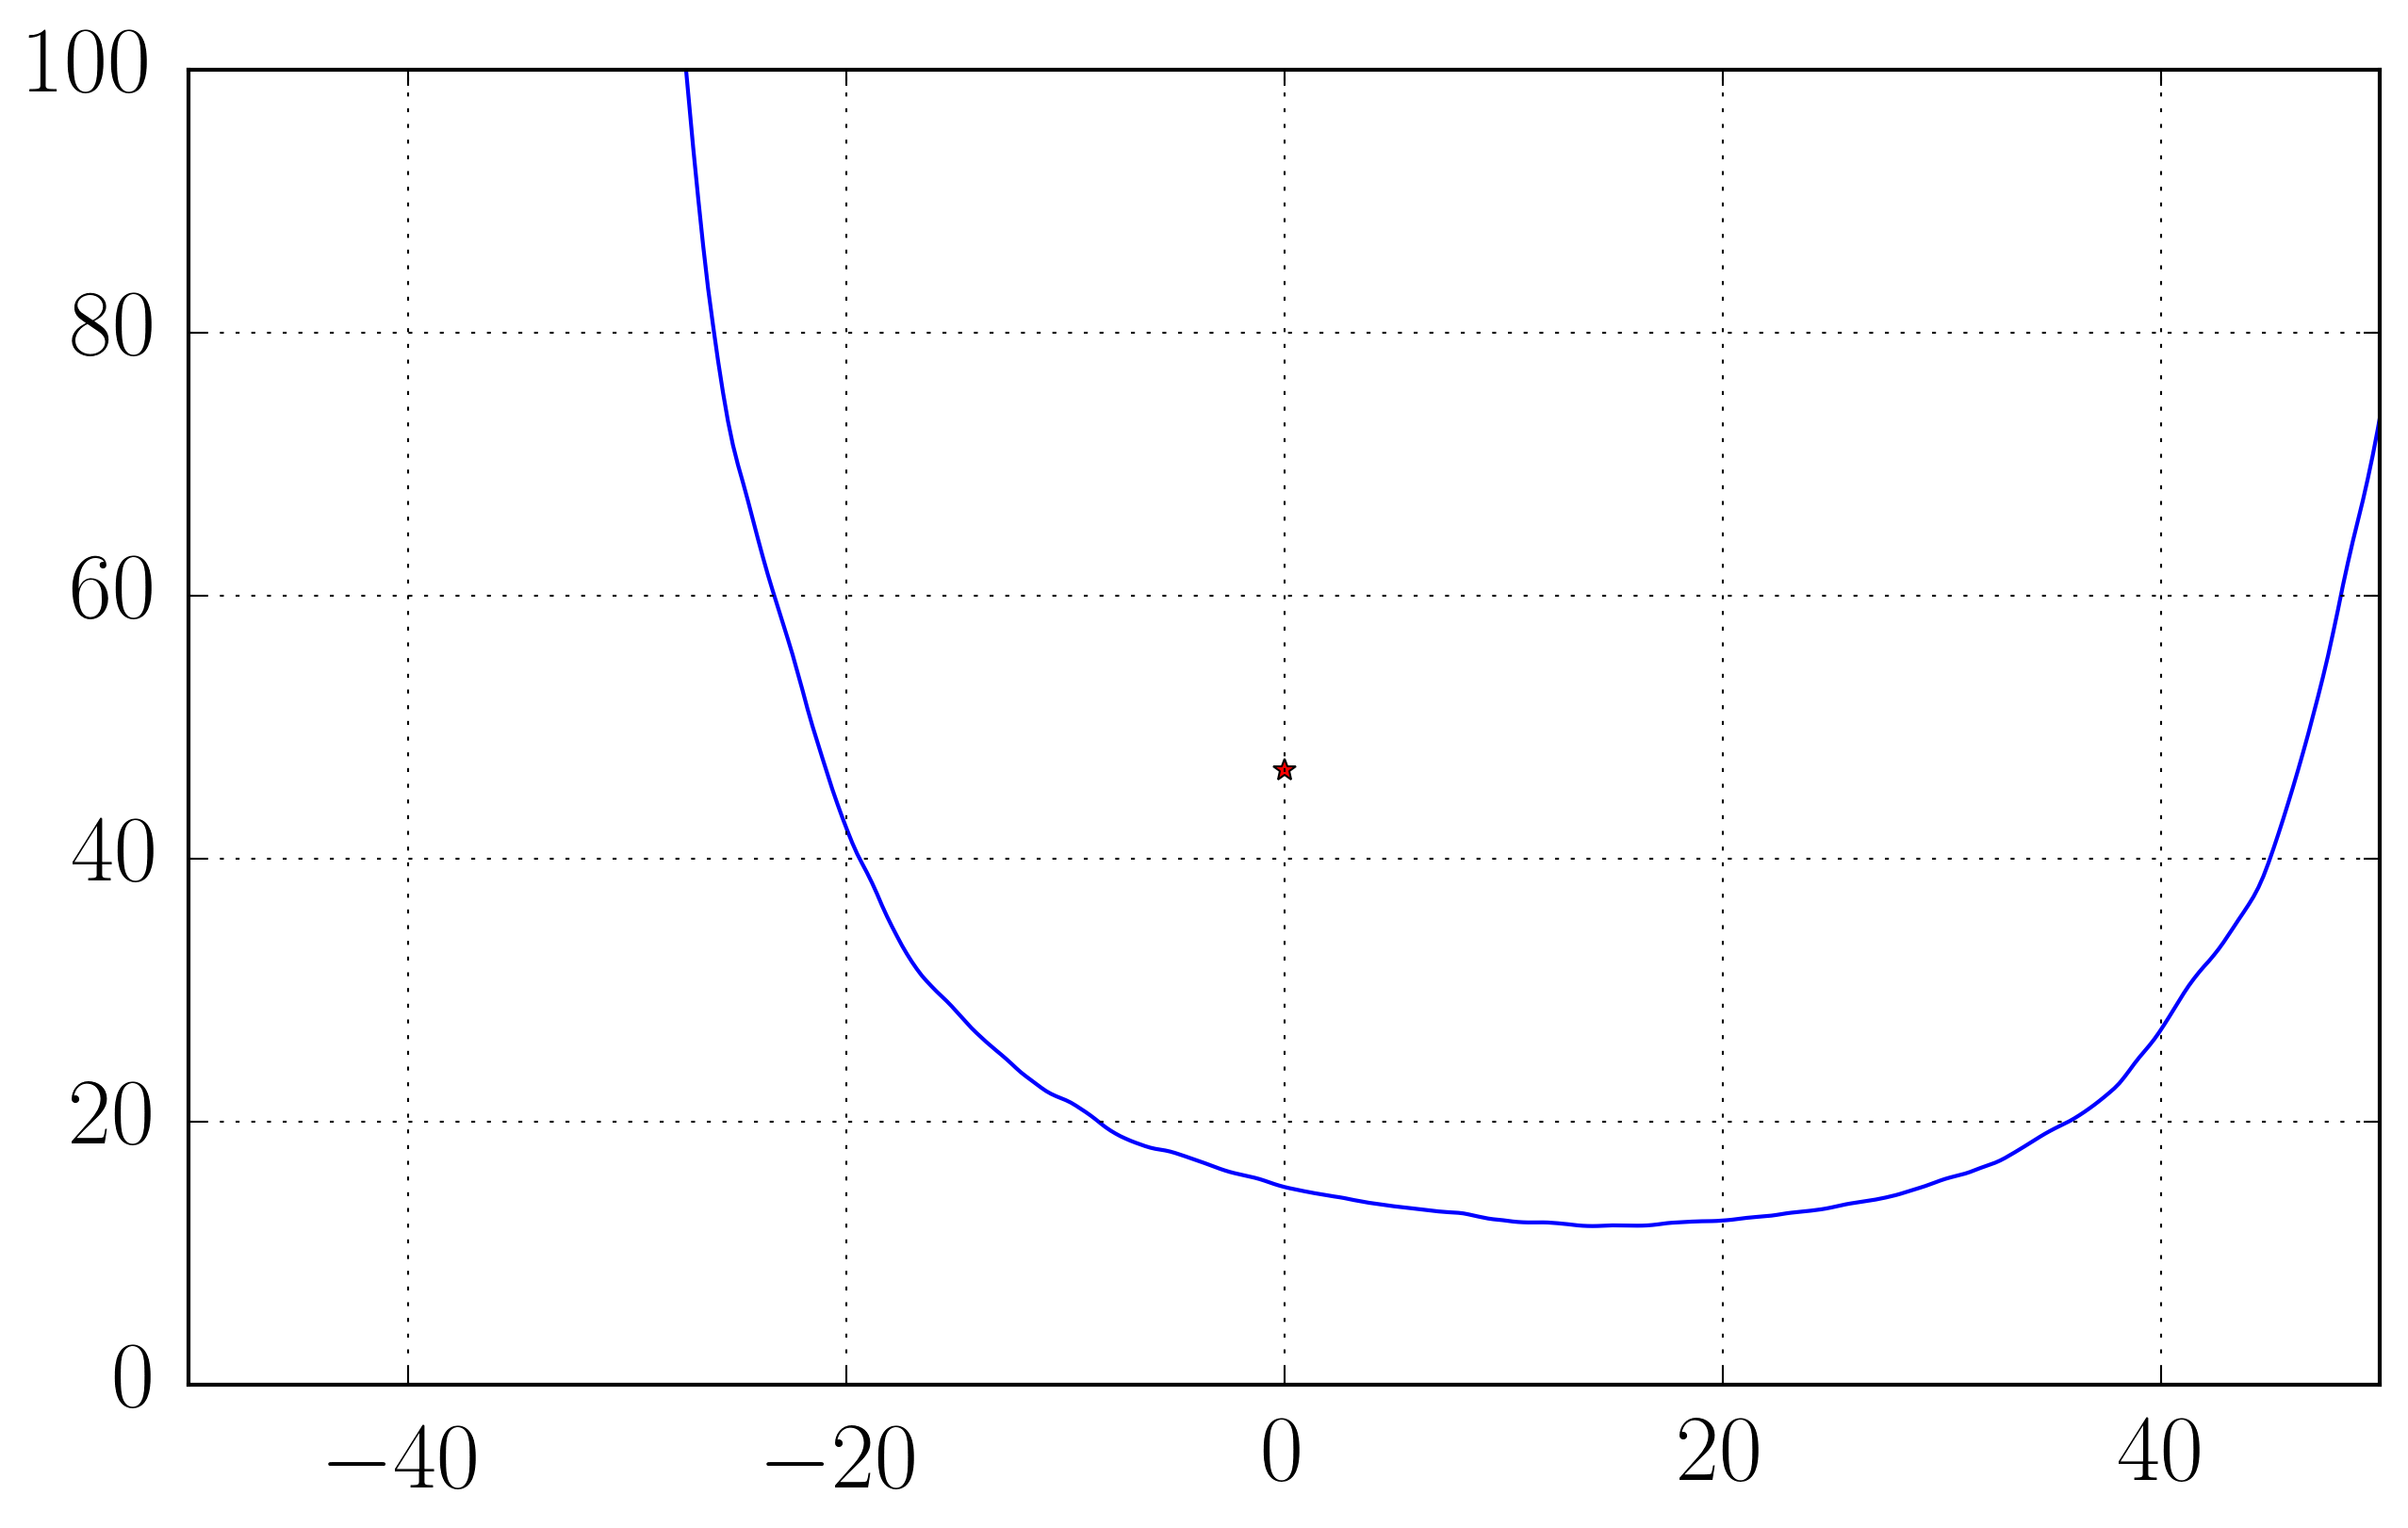

In [1907]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#ax2 = ax.twinx()
path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dmpoint= np.array(f['dmpoint'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    rhom = np.array(f['rhom'])
    vm = np.array(f['vm'])
    Relambda = np.array(f['Relambda'])
    dyeta = np.array(f['dyeta'])
    eta  = np.array(f['eta'])
    eps = np.array(f['epR'])
    nu = np.array(f['nu'])
kk = -10
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])
plt.plot(yf,(nu[:,-20]/eps[:,-20])**0.5)
plt.plot([0.0],[dw[-20]],'r*')
#plt.plot(yf,dyeta[:,kk])
plt.xlim([-50,50])
plt.ylim([0,100])
#plt.yscale('log')
plt.grid('on')
#plt.ylim([0,10])
#plt.plot(yf[1:],np.diff(yf))
#plt.ylim([0,15])

In [1228]:
def create_mesh1D(Ly,my,type,alpha,filename='mesh.txt',beta=0.8,gamma=0.05,nextra=0,zeta=0.0):
        """
        This function will create 1D mesh according to given shape and type
        y = create_mesh1D(Ly,my,type,alpha,filename)
                Ex. y = create_mesh1D(172./2,1025,'tanh',0.5,'mesh.txt')
                will create a mesh with more 1/0.5 more resolution close to
                boundaries than in the rest.
        """
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy.integrate import cumtrapz

        if type == 'tanh':
                y=np.linspace(-1,1,my)
                Dy = np.array(np.ones(my))
                Dy=(1+alpha)+alpha*np.tanh(-(y-0.7)/0.05)
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew

        elif type =='test':
                y=np.linspace(-1,1,my)
                Dy=(1+alpha)+alpha*np.tanh((y-beta)/gamma)
                #print Dy
                #nextra =(0.15/Dy[-1]+1).astype(int)
                #print nextra
                #xfunc = Dy[-1]*np.ones([nextra])
                yc = y[my-nextra];
                yextra = (y[-1]-yc)
                Dyf = Dy[my-nextra]
                yb = np.linspace(yc,y[-1],nextra);
                A=zeta; minfk = Dyf*(A-0.5)/(A+0.5)
                B=(Dyf-minfk)*yextra/Dyf*0.18;
                xfunc =Dyf*(A+np.tanh(-(yb+yextra/2-1.0)/B)/2.0)/(A+0.5)
                Dy[my-nextra:]=xfunc
                #plt.plot(y,Dy)
                #print len(Dy)
                #print my
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew

        elif type =='line':
                ynew=np.linspace(-Ly,Ly,my)
                np.savetxt(filename, ynew)
                return ynew
        else:
                print "That MESH TYPE is not ready yet MAN..."
                return np.ones(my)
        #plt.plot(ynew[:-1],np.diff(ynew),'b.') 


yt= 1.5;
yk = np.linspace(1,yt,300)
yext=yt-1.0
A=0.8;
Dyf=20;
minfk = Dyf*(A-0.5)/(A+0.5)
print "minfk=%s"%minfk; #slope is B
B=(Dyf-minfk)*yext/Dyf*0.16;
print A,B
fk =Dyf*(A+np.tanh(-(yk-yext/2-1.0)/B)/2.0)/(A+0.5)
print np.min(fk[1:]/fk[:-1])
plt.plot(yk,fk)

1.01990168754
0.980486660842


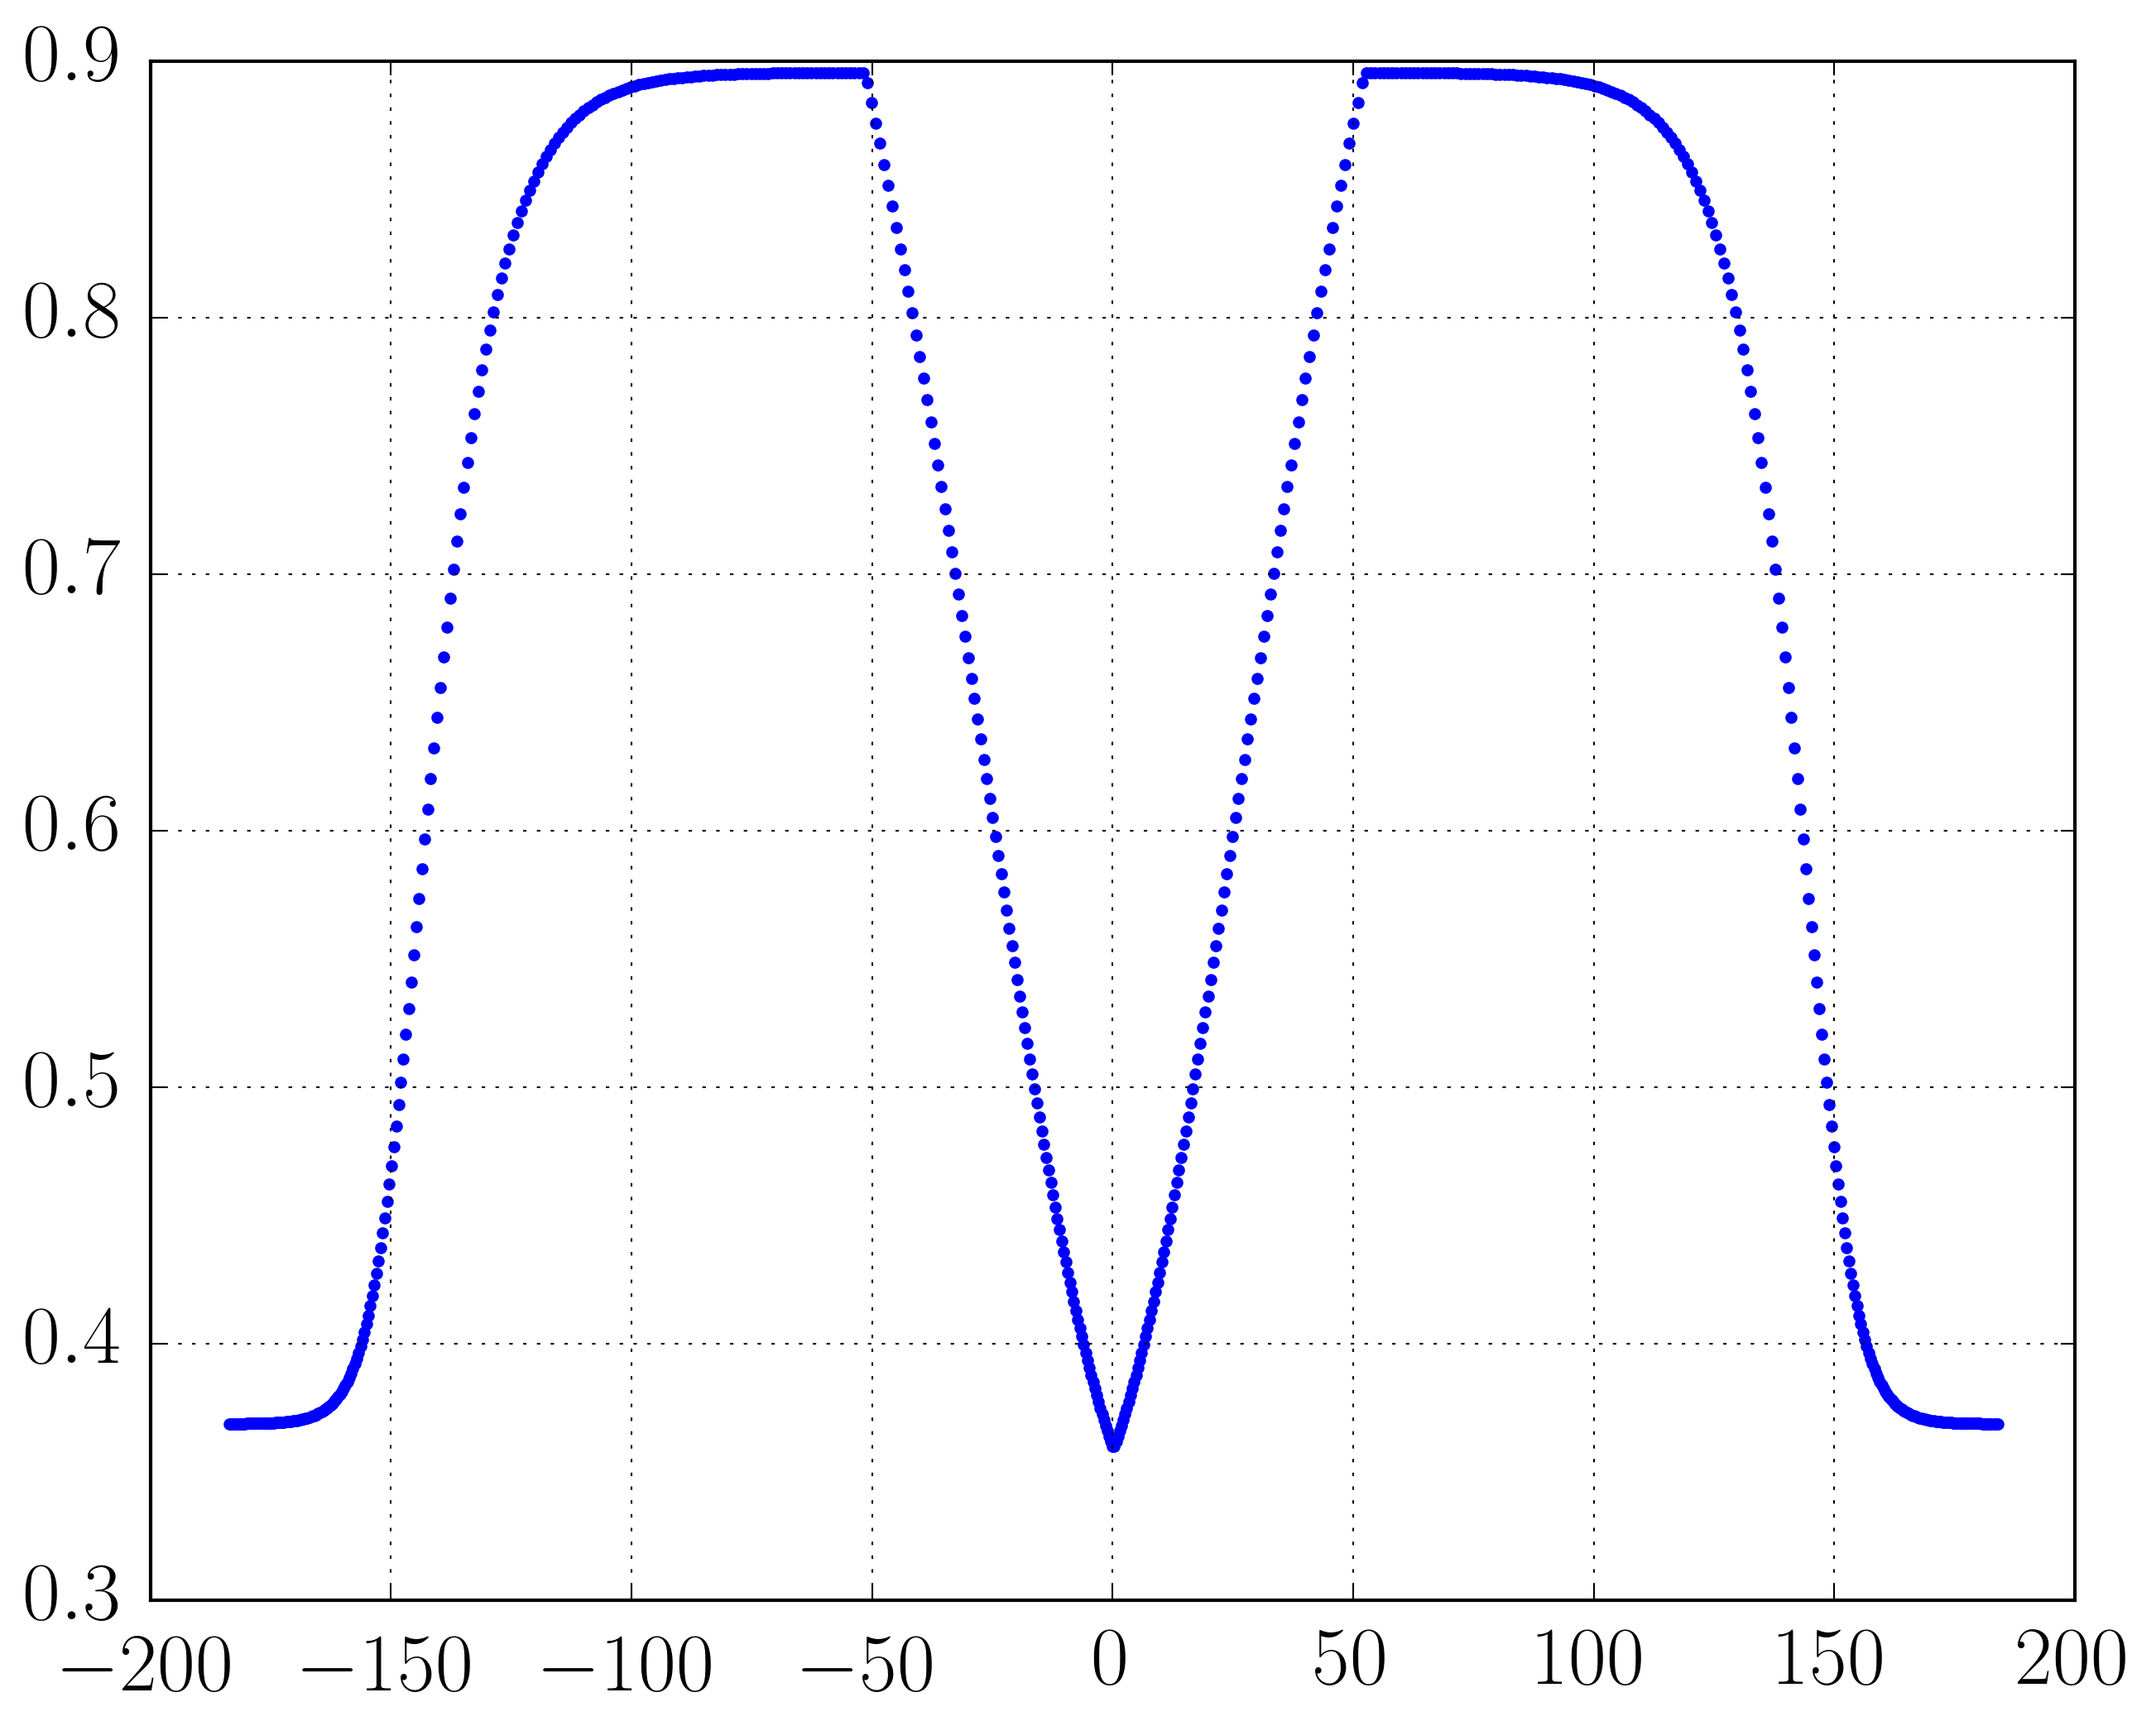

In [1262]:
my=601
Ly=368.0
y=create_mesh1D(Ly/2.0,my,'test',1.5,'/home/toni/JFM_new.txt',0.25,0.18,my/3+10,1.2)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

In [1145]:

#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk],'g')

In [1265]:
print "Resolutiom before aliasing=%s, after =%s"%(Dx,Lz/(mgalz-1)*1.5)
print "Box size: Lx=%s with %s points, Ly =%s with %s points, Lz=%s with %s points"%(Lx,mgalx,Ly,my,Lz,mgalz)
print "alp=%s, bet=%s"%(2*np.pi/Lx,2*np.pi/Lz)

Resolutiom before aliasing=0.300325732899, after =0.450488599349
Box size: Lx=461.0 with 1536 points, Ly =368.0 with 601 points, Lz=172.687296417 with 576.0 points
alp=0.013629469213, bet=0.0363847569425


# TESTING LOMA

In [1266]:
# Let's create a small box for tests

1.03845210917
0.962971706805


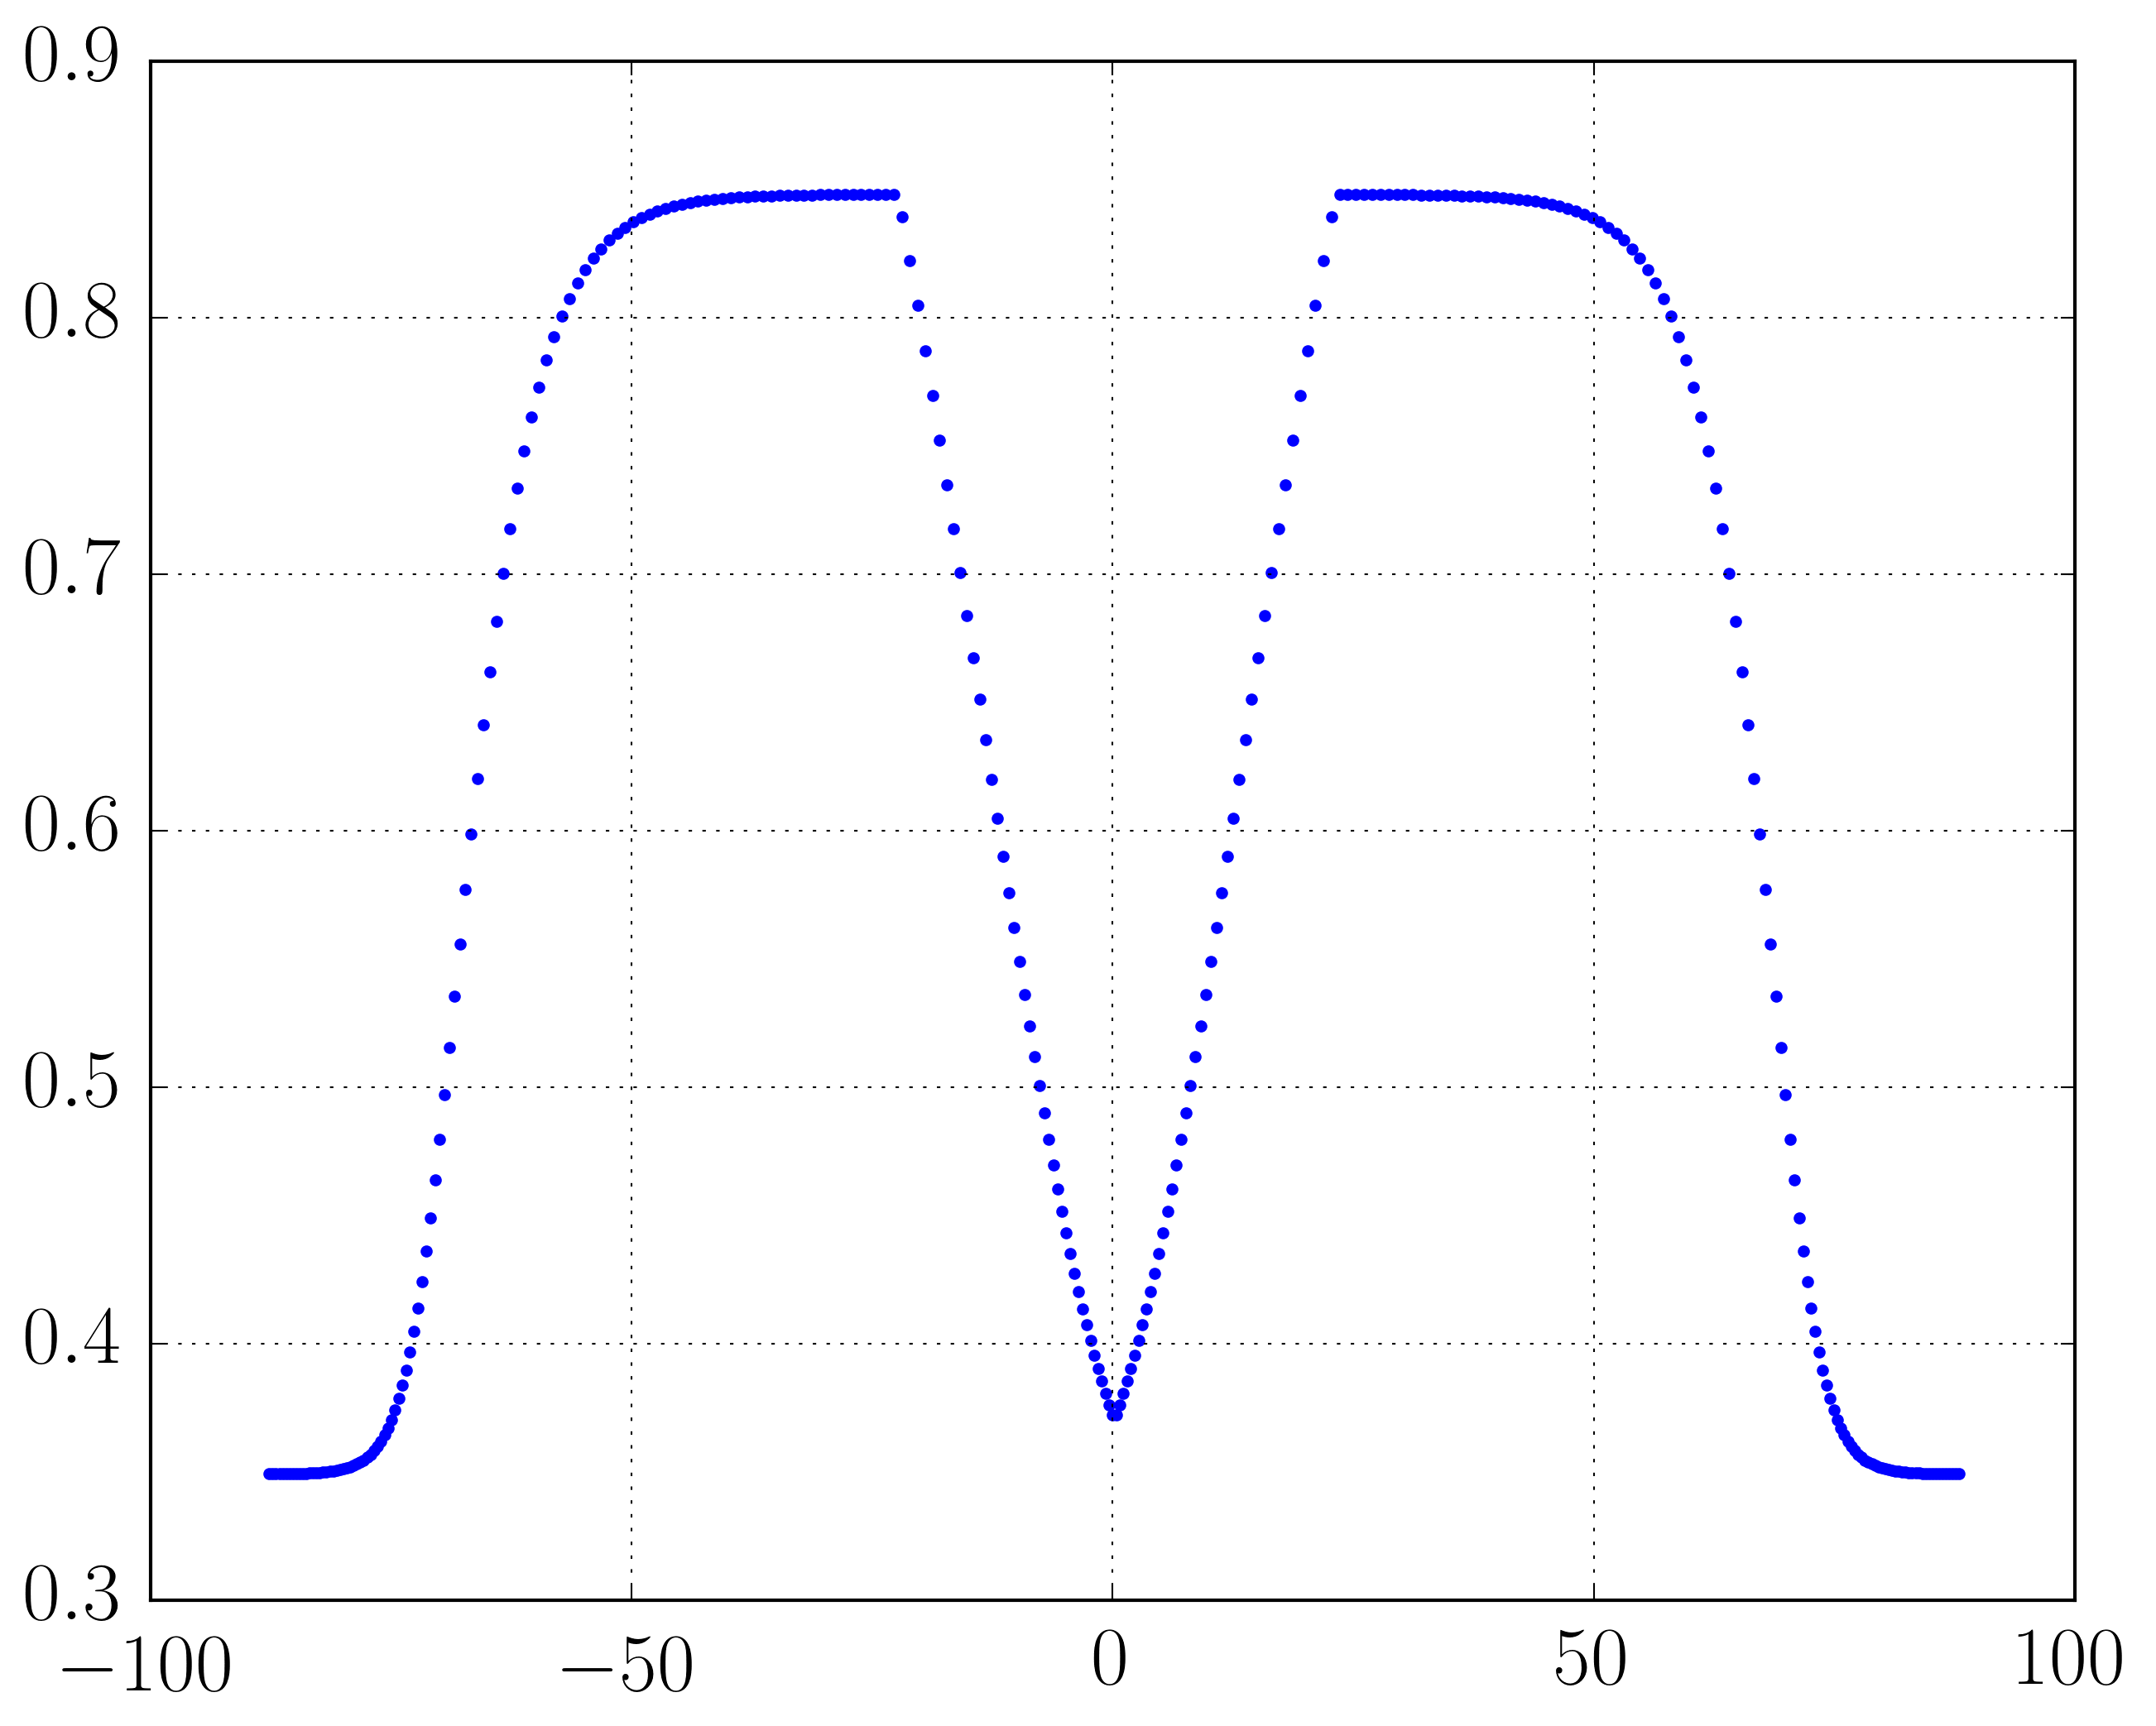

In [1267]:
my=301
Ly=176.0
y=create_mesh1D(Ly/2.0,my,'test',1.5,'/home/toni/small_box.txt',0.25,0.18,my/3+10,1.2)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

1.01990168754
0.980486660842


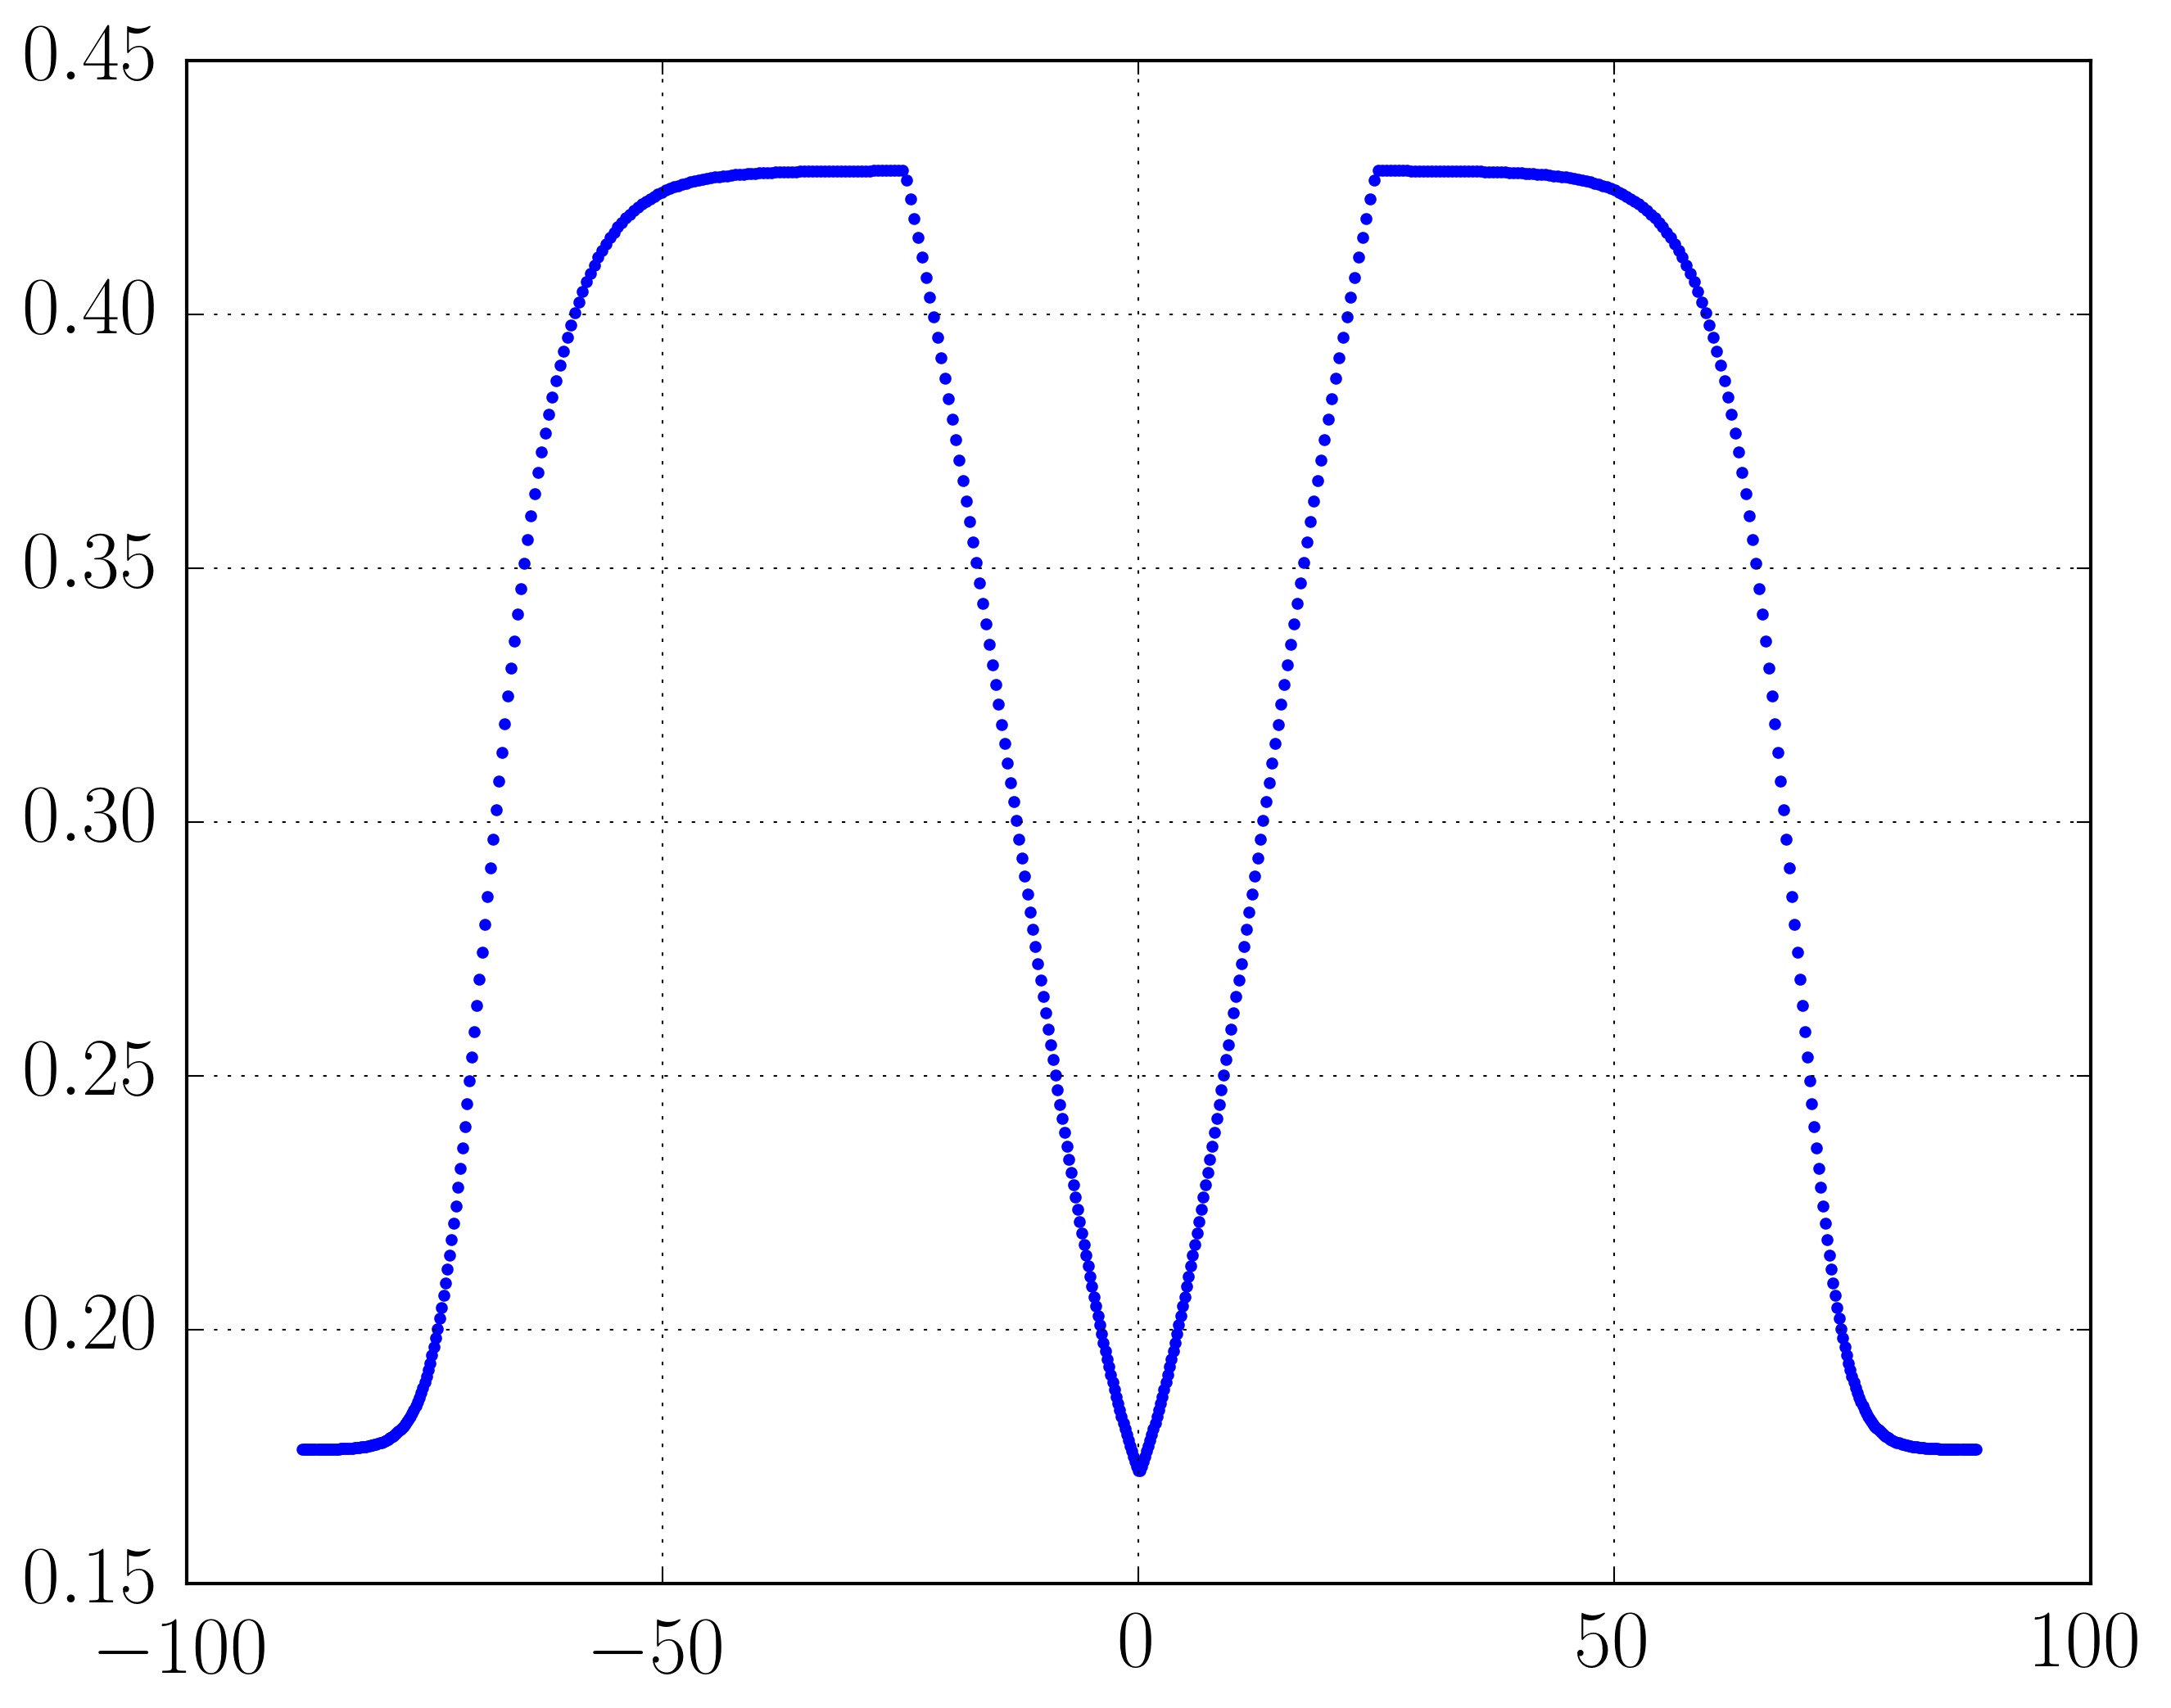

In [1332]:
my=601
Ly=176.0
y=create_mesh1D(Ly/2.0,my,'test',1.5,'/home/toni/small_boxResx2.txt',0.25,0.18,my/3+10,1.2)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

In [1269]:
Lx_small = Lx/4.0;Lz_small = Lz/4.0;
print Lx_small,Lz_small
alp_small=2*np.pi/Lx_small;print alp_small
bet_small=2*np.pi/Lz_small;print bet_small

115.25 43.1718241042
0.0545178768519
0.14553902777


In [1273]:
print 256*1.5, 256/4.0*1.5

384.0 96.0


** Running case 00 with CFL=0.25 and case 01 with CFL=0.1**

## Create hdf5

In [1751]:
#Original RES from JFM first draft
#LowRes(0.75)
#LowRes only on X and Z
#Res x2
p_folders   = [ '/share/drive/toni/VDML/s80/test/00/',\
               #'/share/drive/toni/VDML/s80/test/03/y2/',\
               '/share/drive/toni/VDML/s80/test/03/',\
                '/share/drive/toni/VDML/s80/test/04/']    


l_sta_opt = [1,1,1,1]
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1]) 
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
print nfiles
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])
for ijob in range(njobs):
    print ijob
    print l_sta_opt[ijob]
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        temp = workstaBU(fsta,l_sta_opt[ijob]) #save the stats on the right place
        #temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        stats[ijob].append(temp)
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']
l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm':
                vdm  = np.array(v_temp)
            if variable=='dw':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
            if variable=='dmpoint':
                vdmpoint  = np.array(v_temp)
            if variable=='dmpoint2':
                vdmpoint2  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz

['/share/drive/toni/VDML/s80/test/00/', '/share/drive/toni/VDML/s80/test/03/', '/share/drive/toni/VDML/s80/test/04/']
job(1): 1st file = /share/drive/toni/VDML/s80/test/00/Re160_01_001.sta, last file = /share/drive/toni/VDML/s80/test/00/Re160_01_060.sta
job(2): 1st file = /share/drive/toni/VDML/s80/test/03/lowres_01_001.sta, last file = /share/drive/toni/VDML/s80/test/03/lowres_01_060.sta
job(3): 1st file = /share/drive/toni/VDML/s80/test/04/Resx2_01_001.sta, last file = /share/drive/toni/VDML/s80/test/04/Resx2_01_060.sta
[60, 60, 60]
0
1
1
1
2
1
['dyeta', 'wrms', 'llambda', 'w1rms', 'w3m', 'w2rms', 'R33', 'w3rms', 'urms', 'rwm', 'Relambday', 'uv', 'um', 'epNH', 'XI', 'vm', 'rvm', 'Tm', 'vrms', 'R12', 'R11', 'TT', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'Trms', 'k', 'w2m', 'eta', 'R22']
['EPS', 'dmpoint2', 'Relambda', 'dm', 'dw', 'rhoEPS', 'dmpoint', 'etamin', 'time']
my=301
Writing alp = [ 0.05451788], for ijob = 0
Writing bet = [ 0.14553903], for ijob = 0
Writin

148.039276123
147.411651611
148.200408936


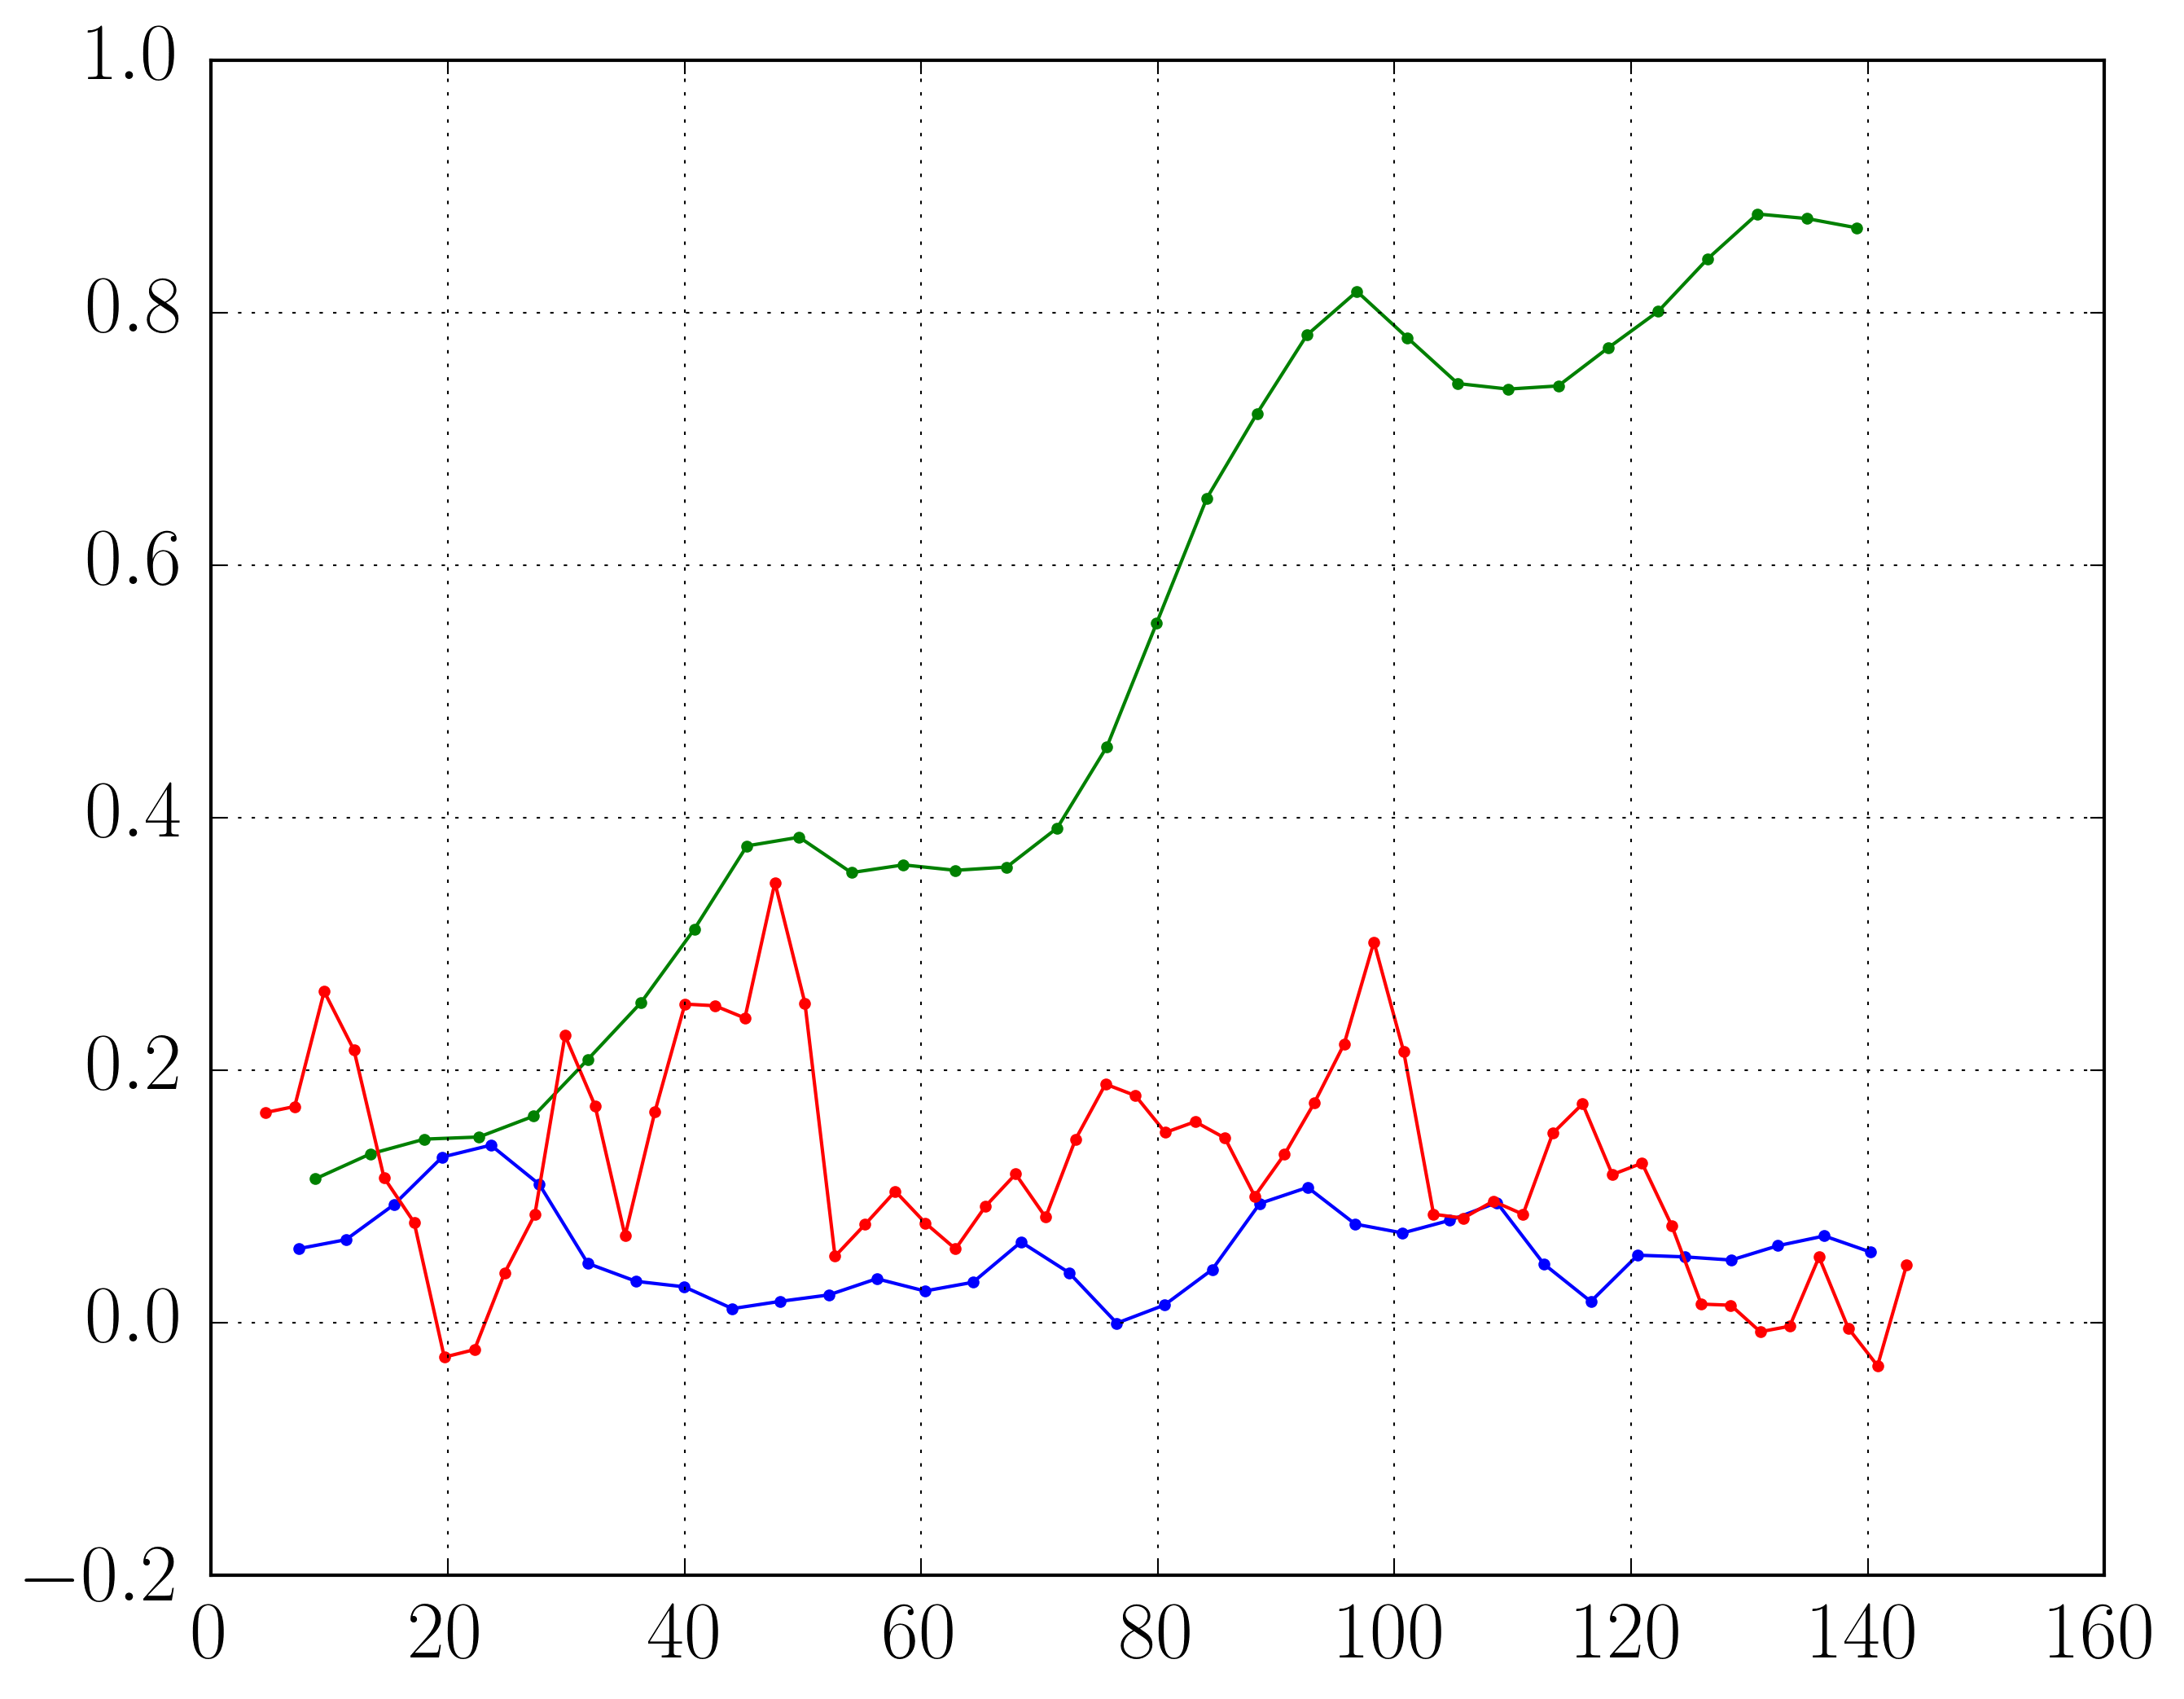

In [1752]:
for folder in p_folders:
    path = folder+'h5.stats'
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        dm= np.array(f['dm'])
        dmpoint= np.array(f['dmpoint'])
        dw= np.array(f['dw'])
        yf = np.array(f['y'])
        rvm = np.array(f['rvm'])
        rhom = np.array(f['rhom'])
        vm = np.array(f['vm'])
        urms = np.array(f['urms'])
        EPS = np.array(f['EPS'])
        Relambda = np.array(f['Relambda'])
        dyeta = np.array(f['dyeta'])
        eta  = np.array(f['eta'])
        vcont = np.zeros(len(time))
        itmax = np.where(time<150.0)[0][-1]
        for ii in range(1,itmax-1):
            vcont[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii-1],yf))/(time[ii+1]-time[ii-1])+rvm[-1,ii]-rvm[0,ii])/np.max(rvm[:,ii+1])*100
        print time[itmax]    
    #plt.plot(time,dw/dm,'.-')+
    #plt.plot(time,EPS,'.-')
    plt.plot(time[1:itmax-1],vcont[1:itmax-1],'.-')
    #plt.plot(yf,vm[:,itmax])
    plt.grid('on')

In [1418]:
6000*1.2

7200.0

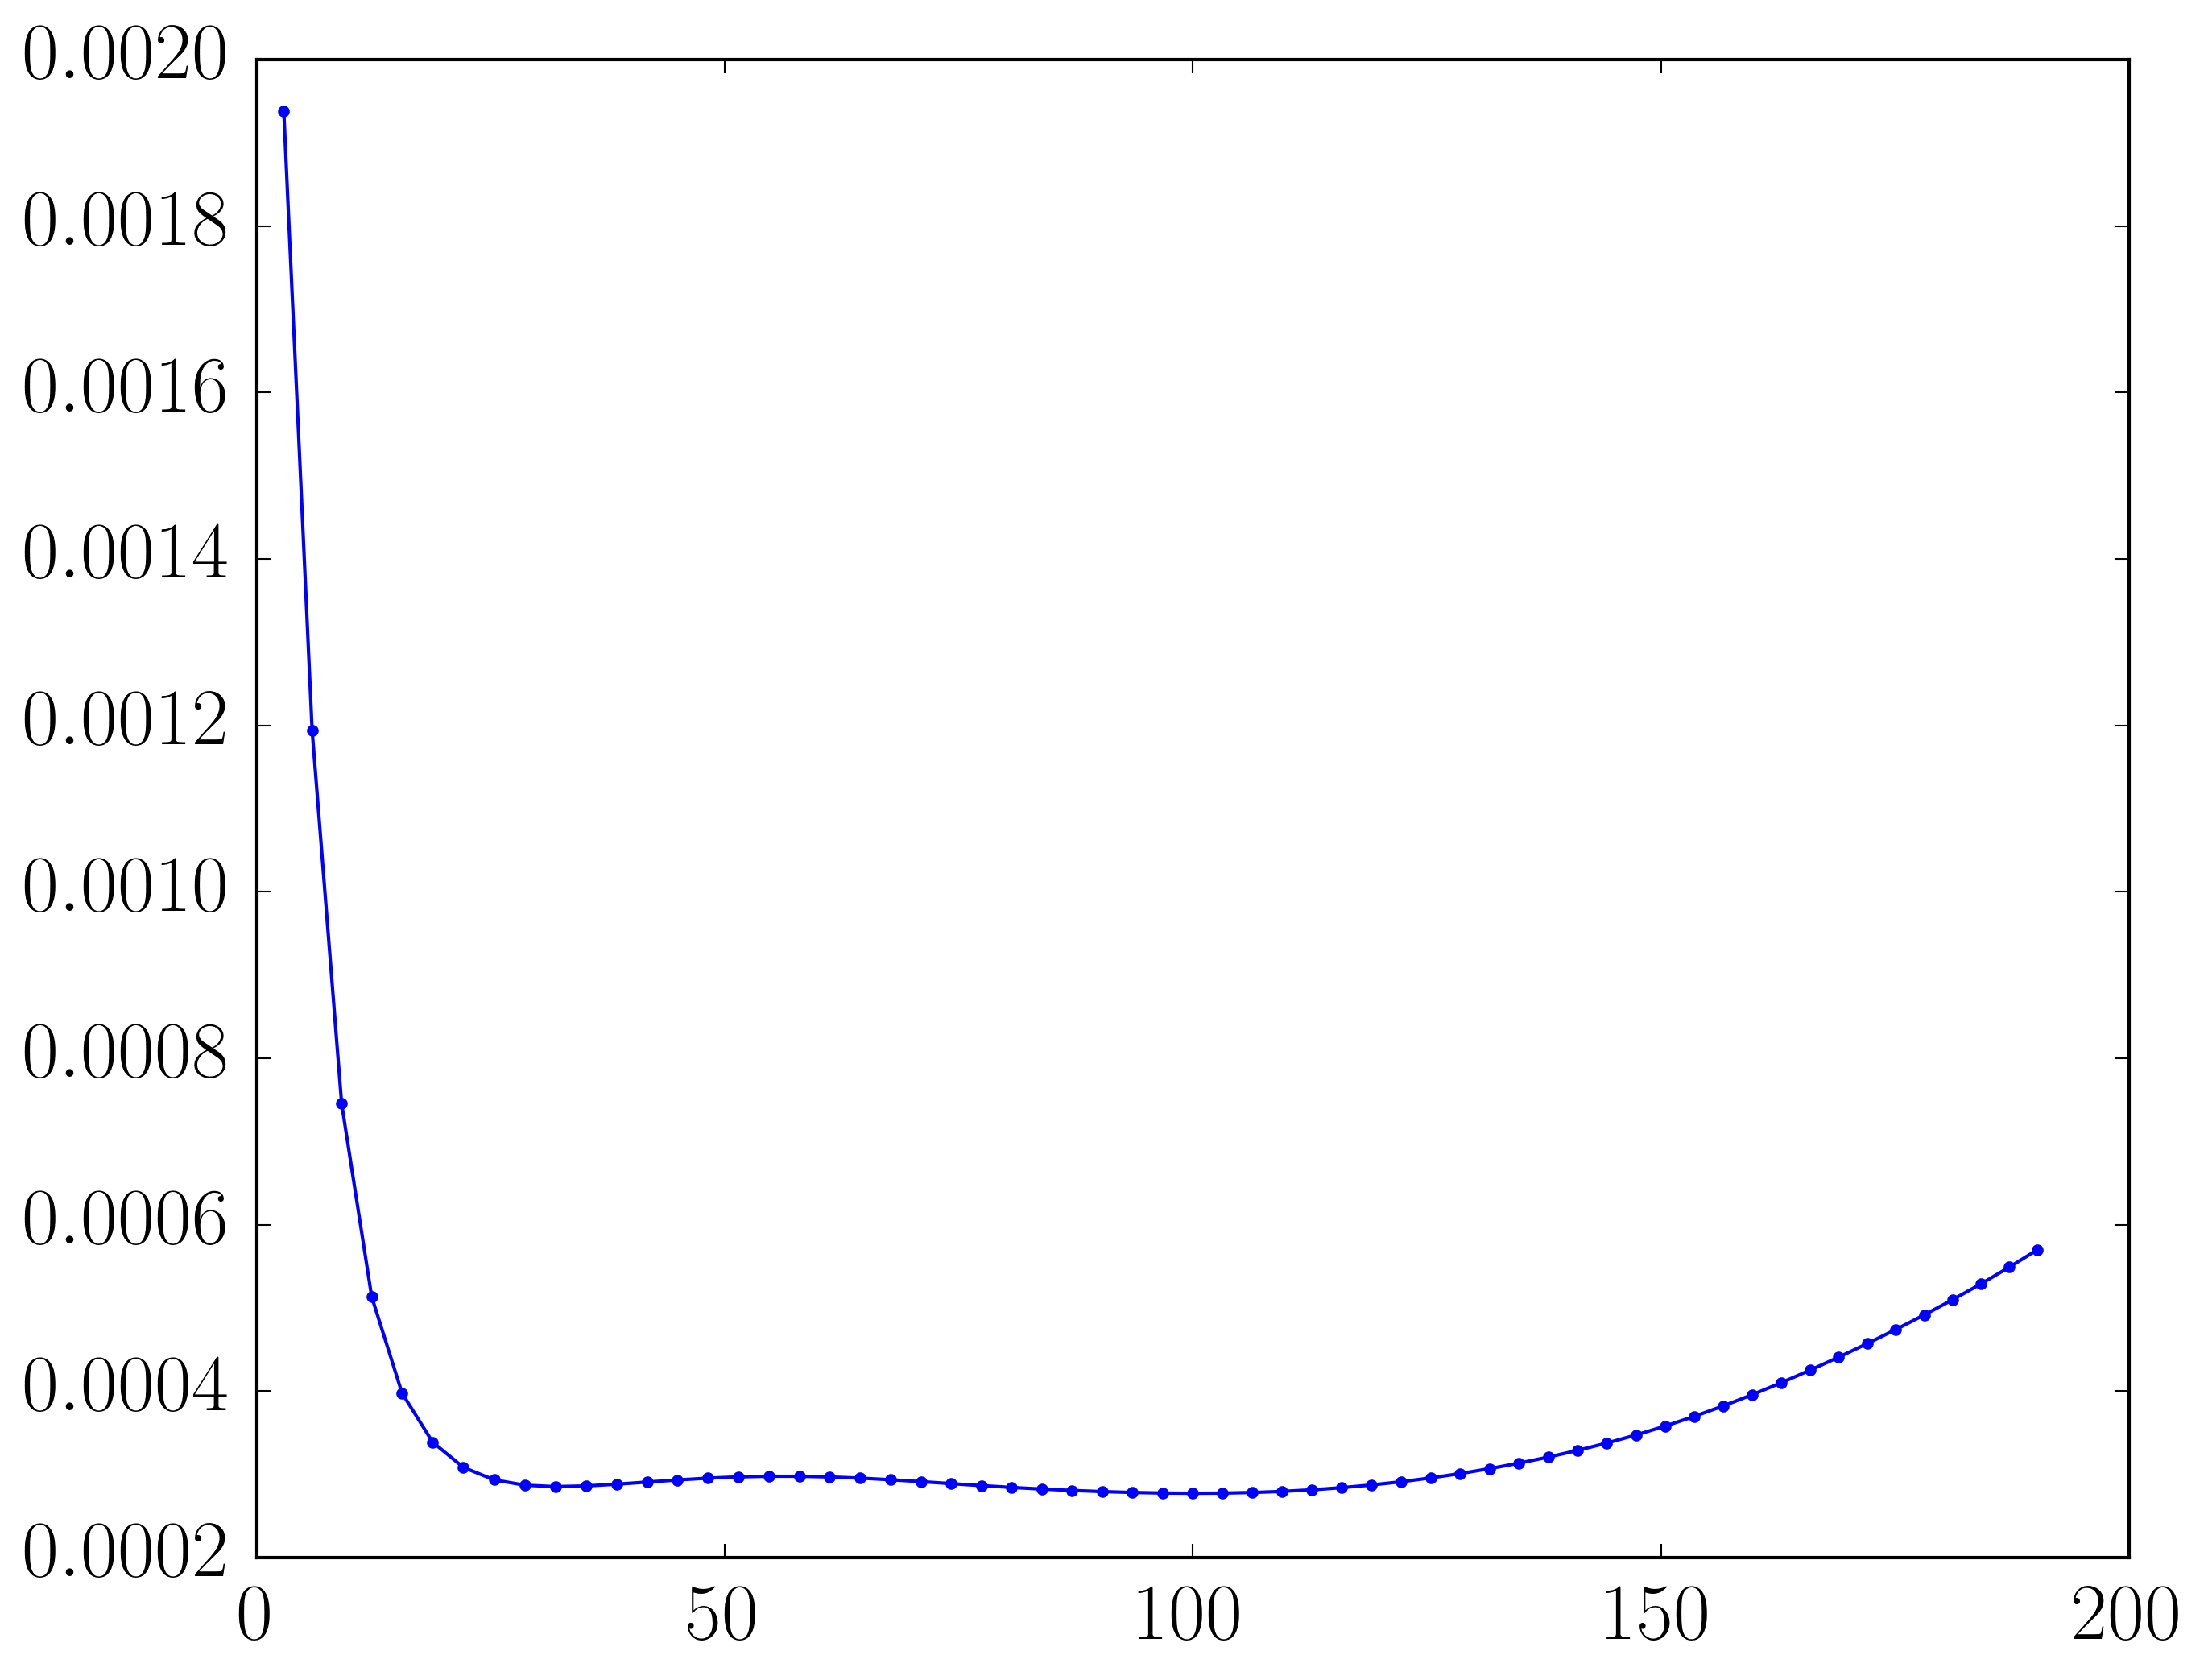

In [1326]:
plt.plot(time,EPS,'.-')

In [1857]:
vcfl = [0.1,0.25,0.5];
errorC = [0.,0.,0.]
vDt = [0.0,0.0,0.0]

# CFL =0.25

In [1858]:
p_file = '/share/drive/toni/VDML/s80/test/00/Re160_012.Tfxz'
p_filep = '/share/drive/toni/VDML/s80/test/00/Re160_011.Tfxz'
p_filev = '/share/drive/toni/VDML/s80/test/00/Re160_012.vpxz'
p_filevp = '/share/drive/toni/VDML/s80/test/00/Re160_011.vpxz'

In [1859]:
(Tf,y,x,z) = readfieldij(p_file)
(vp,y,x,z) = readfieldij(p_filev)
(Tfp,y,x,z) = readfieldij(p_filep)
(vpp,y,x,z) = readfieldij(p_filevp)

Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 232.83027649]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 232.83027649]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 215.32147217]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 215.32147217]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)


In [1860]:
rv = vp/Tf;
rvp=vpp/Tfp;
mgalx=384;mgalz=96;my=301;
print np.shape(rvp)
#rvm  = np.mean(np.mean(rvm,axis=0),axis=1)
rvmpb  = np.sum(rvp[:,0,:])/(mgalz*mgalx)
rvmpt  = np.sum(rvp[:,-1,:])/(mgalz*mgalx)
rvmmax = np.max(np.sum(np.sum(rvp,axis=0),axis=1))/(mgalx*mgalz)
print rvmmax
print rvmpb-rvmpt
#rvmp = np.mean(np.mean(rvmp,axis=0),axis=1)
Dt = 232.83027649-215.32147217;
#C = (np.sum(1.0/Tf[:]-1.0/Tfp[:])/(mgalx*mgalz*my)/Dt+rvmpt-rvmpb)/np.max(rvp[:])*100
rvmmax = np.max(np.sum(np.sum(rvp,axis=0),axis=1))/(mgalx*mgalz)
C = (np.sum(1.0/Tf[:]-1.0/Tfp[:])/(mgalx*mgalz*my)/Dt+rvmpt-rvmpb)/rvmmax*100
errorC[1] = C
vDt[1] = Dt/100;
#C = (np.trapz(np.mean(np.mean(1.0/Tf-1.0/Tfp,axis=0),axis=1),y)/Dt+rvmp[-1]-rvmp[0])/np.max(rvmp)*100
print C

(384, 301, 96)
0.0150260600855
-5.395710144e-05
0.356799419885


In [1861]:
print C

0.356799419885


# CFL =0.1

In [1891]:
p_file = '/home/toni/fields/CFL01_014.Tfxz'
p_filep = '/home/toni/fields/CFL01_013.Tfxz'
p_filev = '/home/toni/fields/CFL01_014.vpxz'
p_filevp = '/home/toni/fields/CFL01_013.vpxz'

In [1892]:
(Tf,y,x,z) = readfieldij(p_file)
(vp,y,x,z) = readfieldij(p_filev)
(Tfp,y,x,z) = readfieldij(p_filep)
(vpp,y,x,z) = readfieldij(p_filevp)

Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 204.77641296]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 204.77641296]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 197.55307007]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 197.55307007]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)


In [1893]:
rv = vp/Tf;
rvp=vpp/Tfp;
mgalx=384;mgalz=96;my=301;
print np.shape(rvp)
#rvm  = np.mean(np.mean(rvm,axis=0),axis=1)
rvmpb  = np.sum(rvp[:,0,:])/(mgalz*mgalx)
rvmpt  = np.sum(rvp[:,-1,:])/(mgalz*mgalx)
print rvmpb-rvmpt
#rvmp = np.mean(np.mean(rvmp,axis=0),axis=1)
Dt = 204.77641296-197.55307007;
rvmmax = np.max(np.sum(np.sum(rvp,axis=0),axis=1))/(mgalx*mgalz)
C = (np.sum(1.0/Tf[:]-1.0/Tfp[:])/(mgalx*mgalz*my)/Dt+rvmpt-rvmpb)/rvmmax*100
#C = (np.sum(1.0/Tf[:]-1.0/Tfp[:])/(mgalx*mgalz*my)/Dt+rvmpt-rvmpb)/np.max(rvp[:])*100
print np.max(rvp[:]), np.max(np.mean(np.mean(rvp,axis=0),axis=1))
errorC[0] = C
vDt[0] = Dt/200.0;
#C = (np.trapz(np.mean(np.mean(1.0/Tf-1.0/Tfp,axis=0),axis=1),y)/Dt+rvmp[-1]-rvmp[0])/np.max(rvmp)*100
print C

(384, 301, 96)
-1.53183926741e-05
0.206991048549 0.0132124944844
0.119319890466


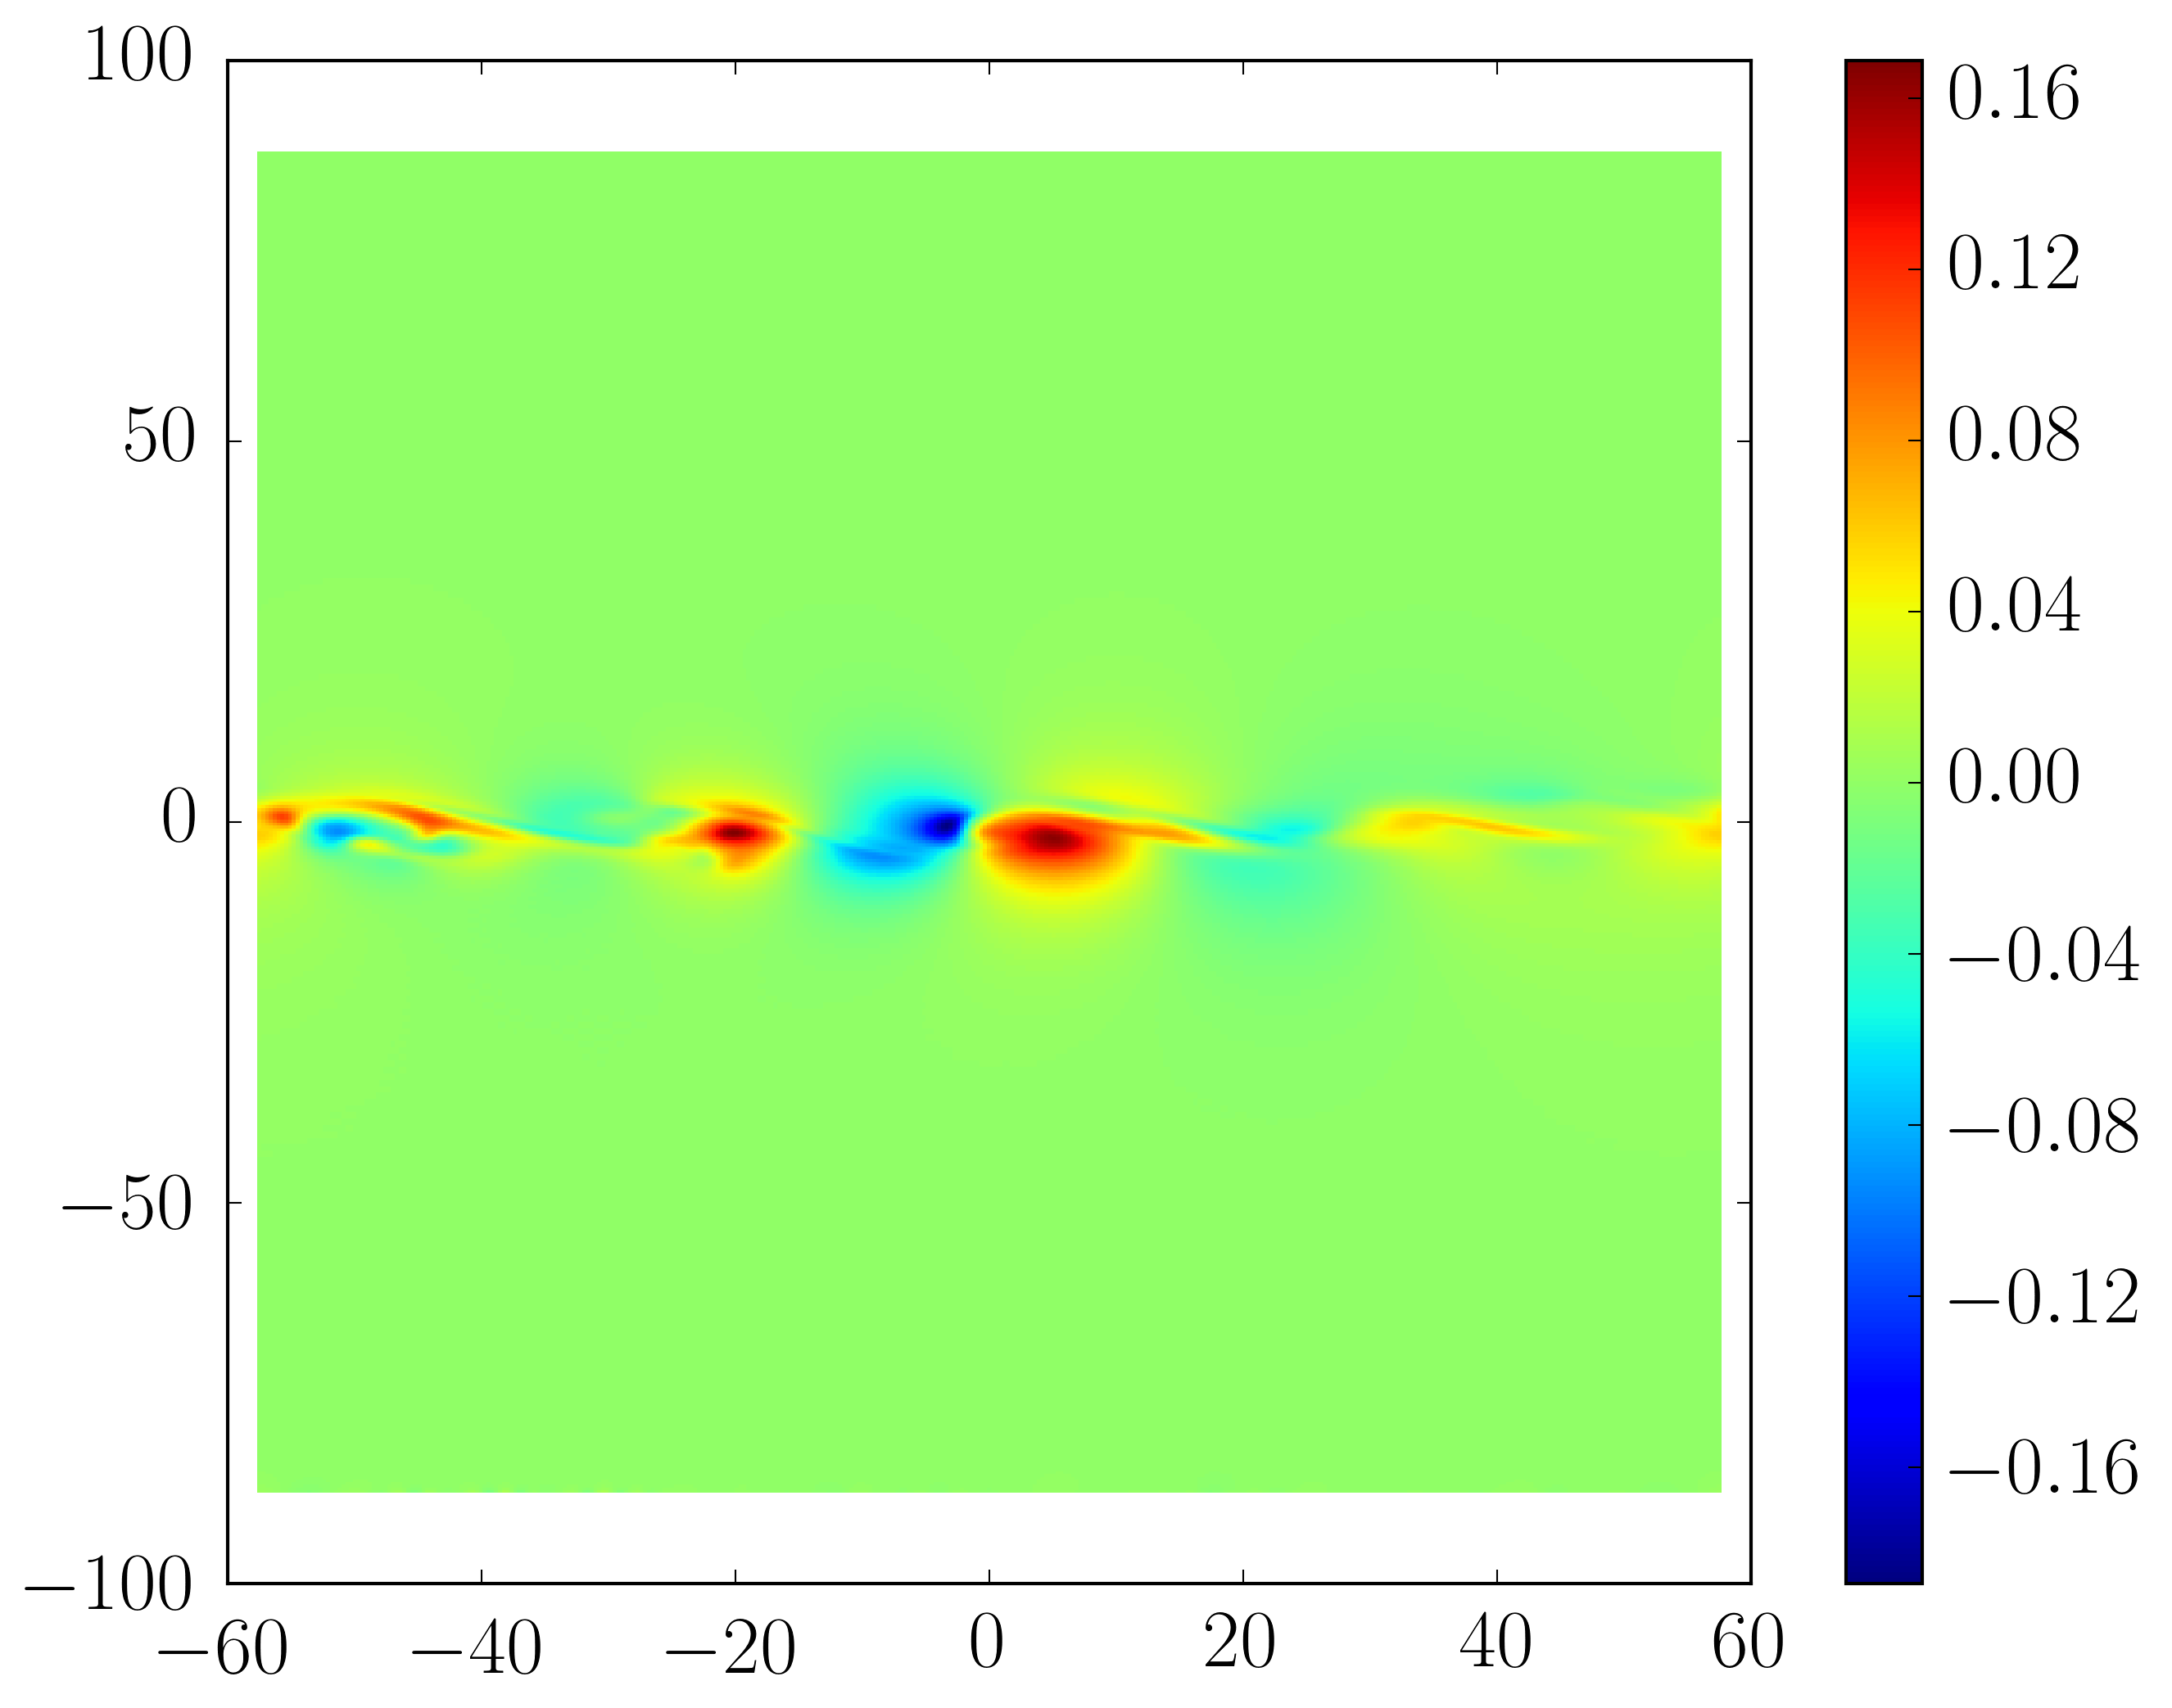

In [1880]:
plt.pcolor(x,y,np.transpose(rvp[:,:,0]))
plt.colorbar()

# CFL =0.5

In [1881]:
p_file = '/share/drive/toni/VDML/s80/test/02/CFL05_006.Tfxz'
p_filep = '/share/drive/toni/VDML/s80/test/02/CFL05_005.Tfxz'
p_filev = '/share/drive/toni/VDML/s80/test/02/CFL05_006.vpxz'
p_filevp = '/share/drive/toni/VDML/s80/test/02/CFL05_005.vpxz'

In [1882]:
(Tf,y,x,z) = readfieldij(p_file)
(vp,y,x,z) = readfieldij(p_filev)
(Tfp,y,x,z) = readfieldij(p_filep)
(vpp,y,x,z) = readfieldij(p_filevp)

Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 232.72453308]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 232.72453308]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 197.39614868]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 197.39614868]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)


In [1889]:
rv = vp/Tf;
rvp=vpp/Tfp;
mgalx=384;mgalz=96;my=301;
print np.shape(rvp)
#rvm  = np.mean(np.mean(rvm,axis=0),axis=1)
rvmpb  = np.sum(rvp[:,0,:])/(mgalz*mgalx)
rvmpt  = np.sum(rvp[:,-1,:])/(mgalz*mgalx)
print rvmpb-rvmpt
#rvmp = np.mean(np.mean(rvmp,axis=0),axis=1)
Dt = 232.72453308-197.39614868;
#C = (np.sum(1.0/Tf[:]-1.0/Tfp[:])/(mgalx*mgalz*my)/Dt+rvmpt-rvmpb)/np.max(rvp[:])*100
rvmmax = np.max(np.sum(np.sum(rvp,axis=0),axis=1))/(mgalx*mgalz)
C = (np.sum(1.0/Tf[:]-1.0/Tfp[:])/(mgalx*mgalz*my)/Dt+rvmpt-rvmpb)/rvmmax*100
print np.max(rvp[:]), np.max(np.mean(np.mean(rvp,axis=0),axis=1))
errorC[2] = C
vDt[2] = Dt/50.0;
#C = (np.trapz(np.mean(np.mean(1.0/Tf-1.0/Tfp,axis=0),axis=1),y)/Dt+rvmp[-1]-rvmp[0])/np.max(rvmp)*100
print C

(384, 301, 96)
-7.42301358791e-05
0.20753837488 0.0132653146497
0.556424233054


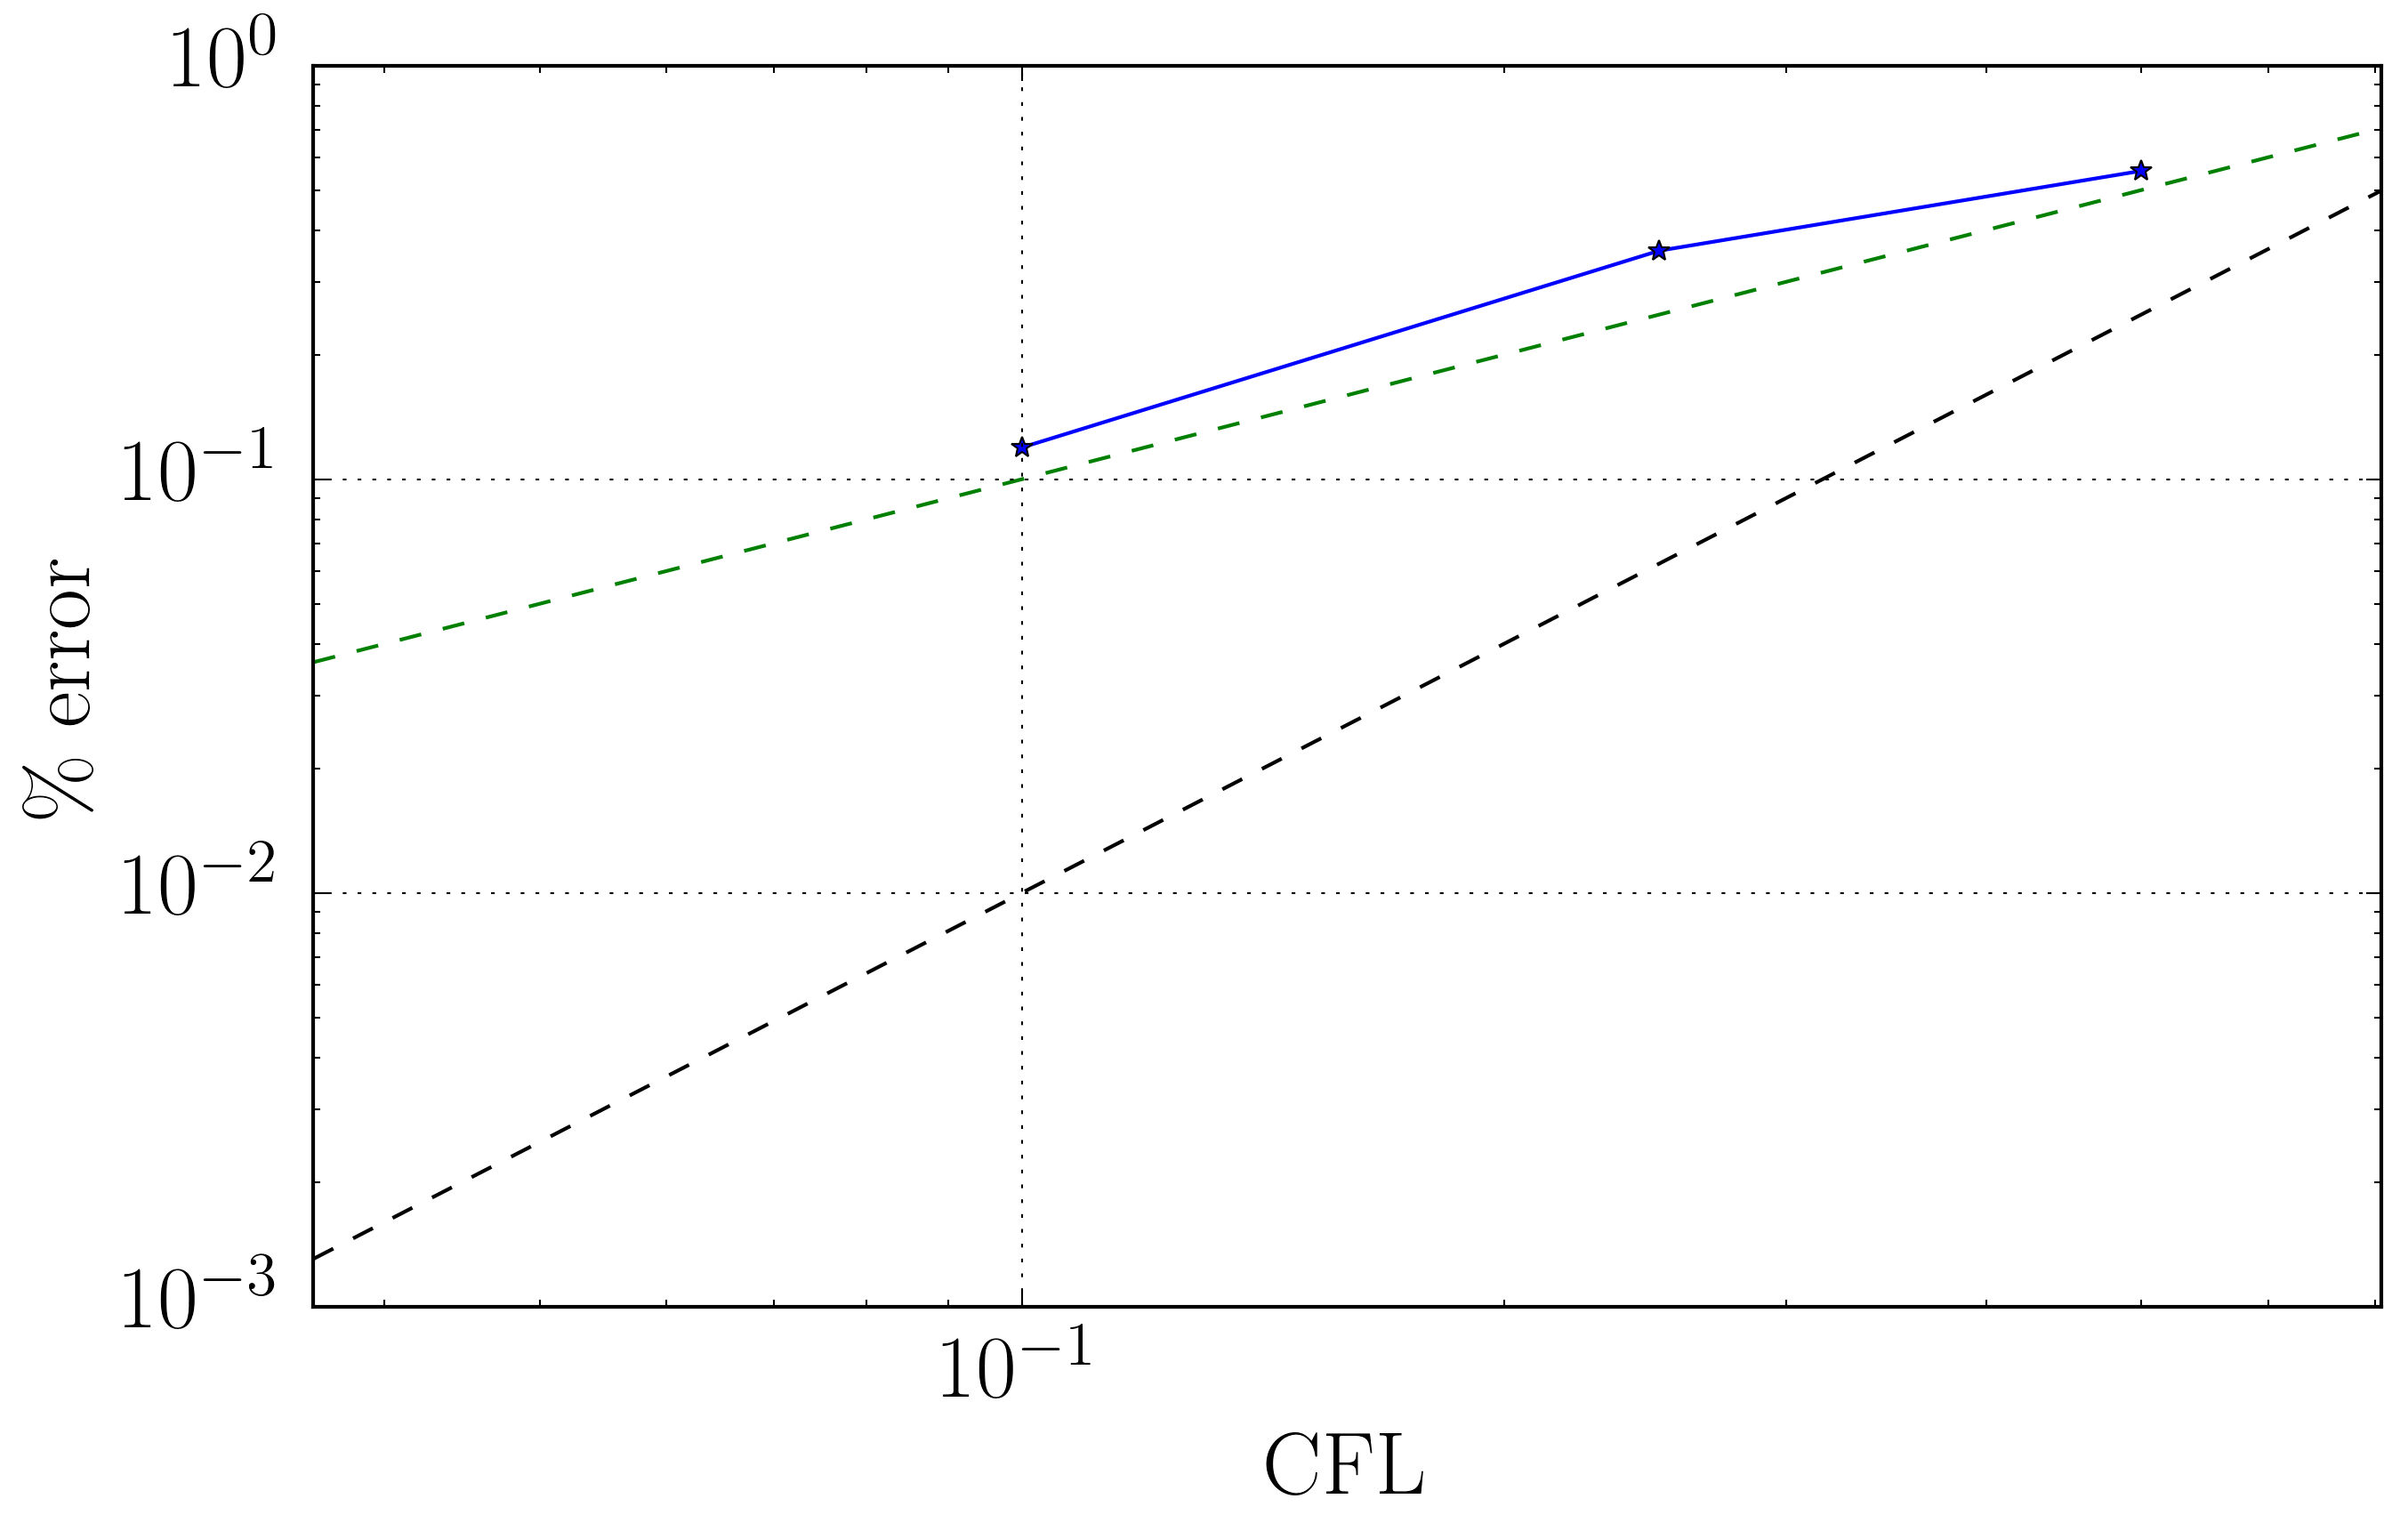

In [1895]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
vDt = np.array(vDt)
plt.plot(vcfl,errorC,'*-')
#plt.plot(vDt,errorC,'*-')
plt.plot(vDt,vDt,'g--')
plt.plot(vDt,vDt**2,'k--')
#plt.plot(np.linspace(0.1,1.0,5),np.linspace(0.1,1.0,5),'k--')
#plt.plot(vcfl,np.array(vcfl)**2,'g--')
plt.grid('on')
plt.xlim([vDt[0],vDt[-1]])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('CFL')
plt.ylabel('\% error')

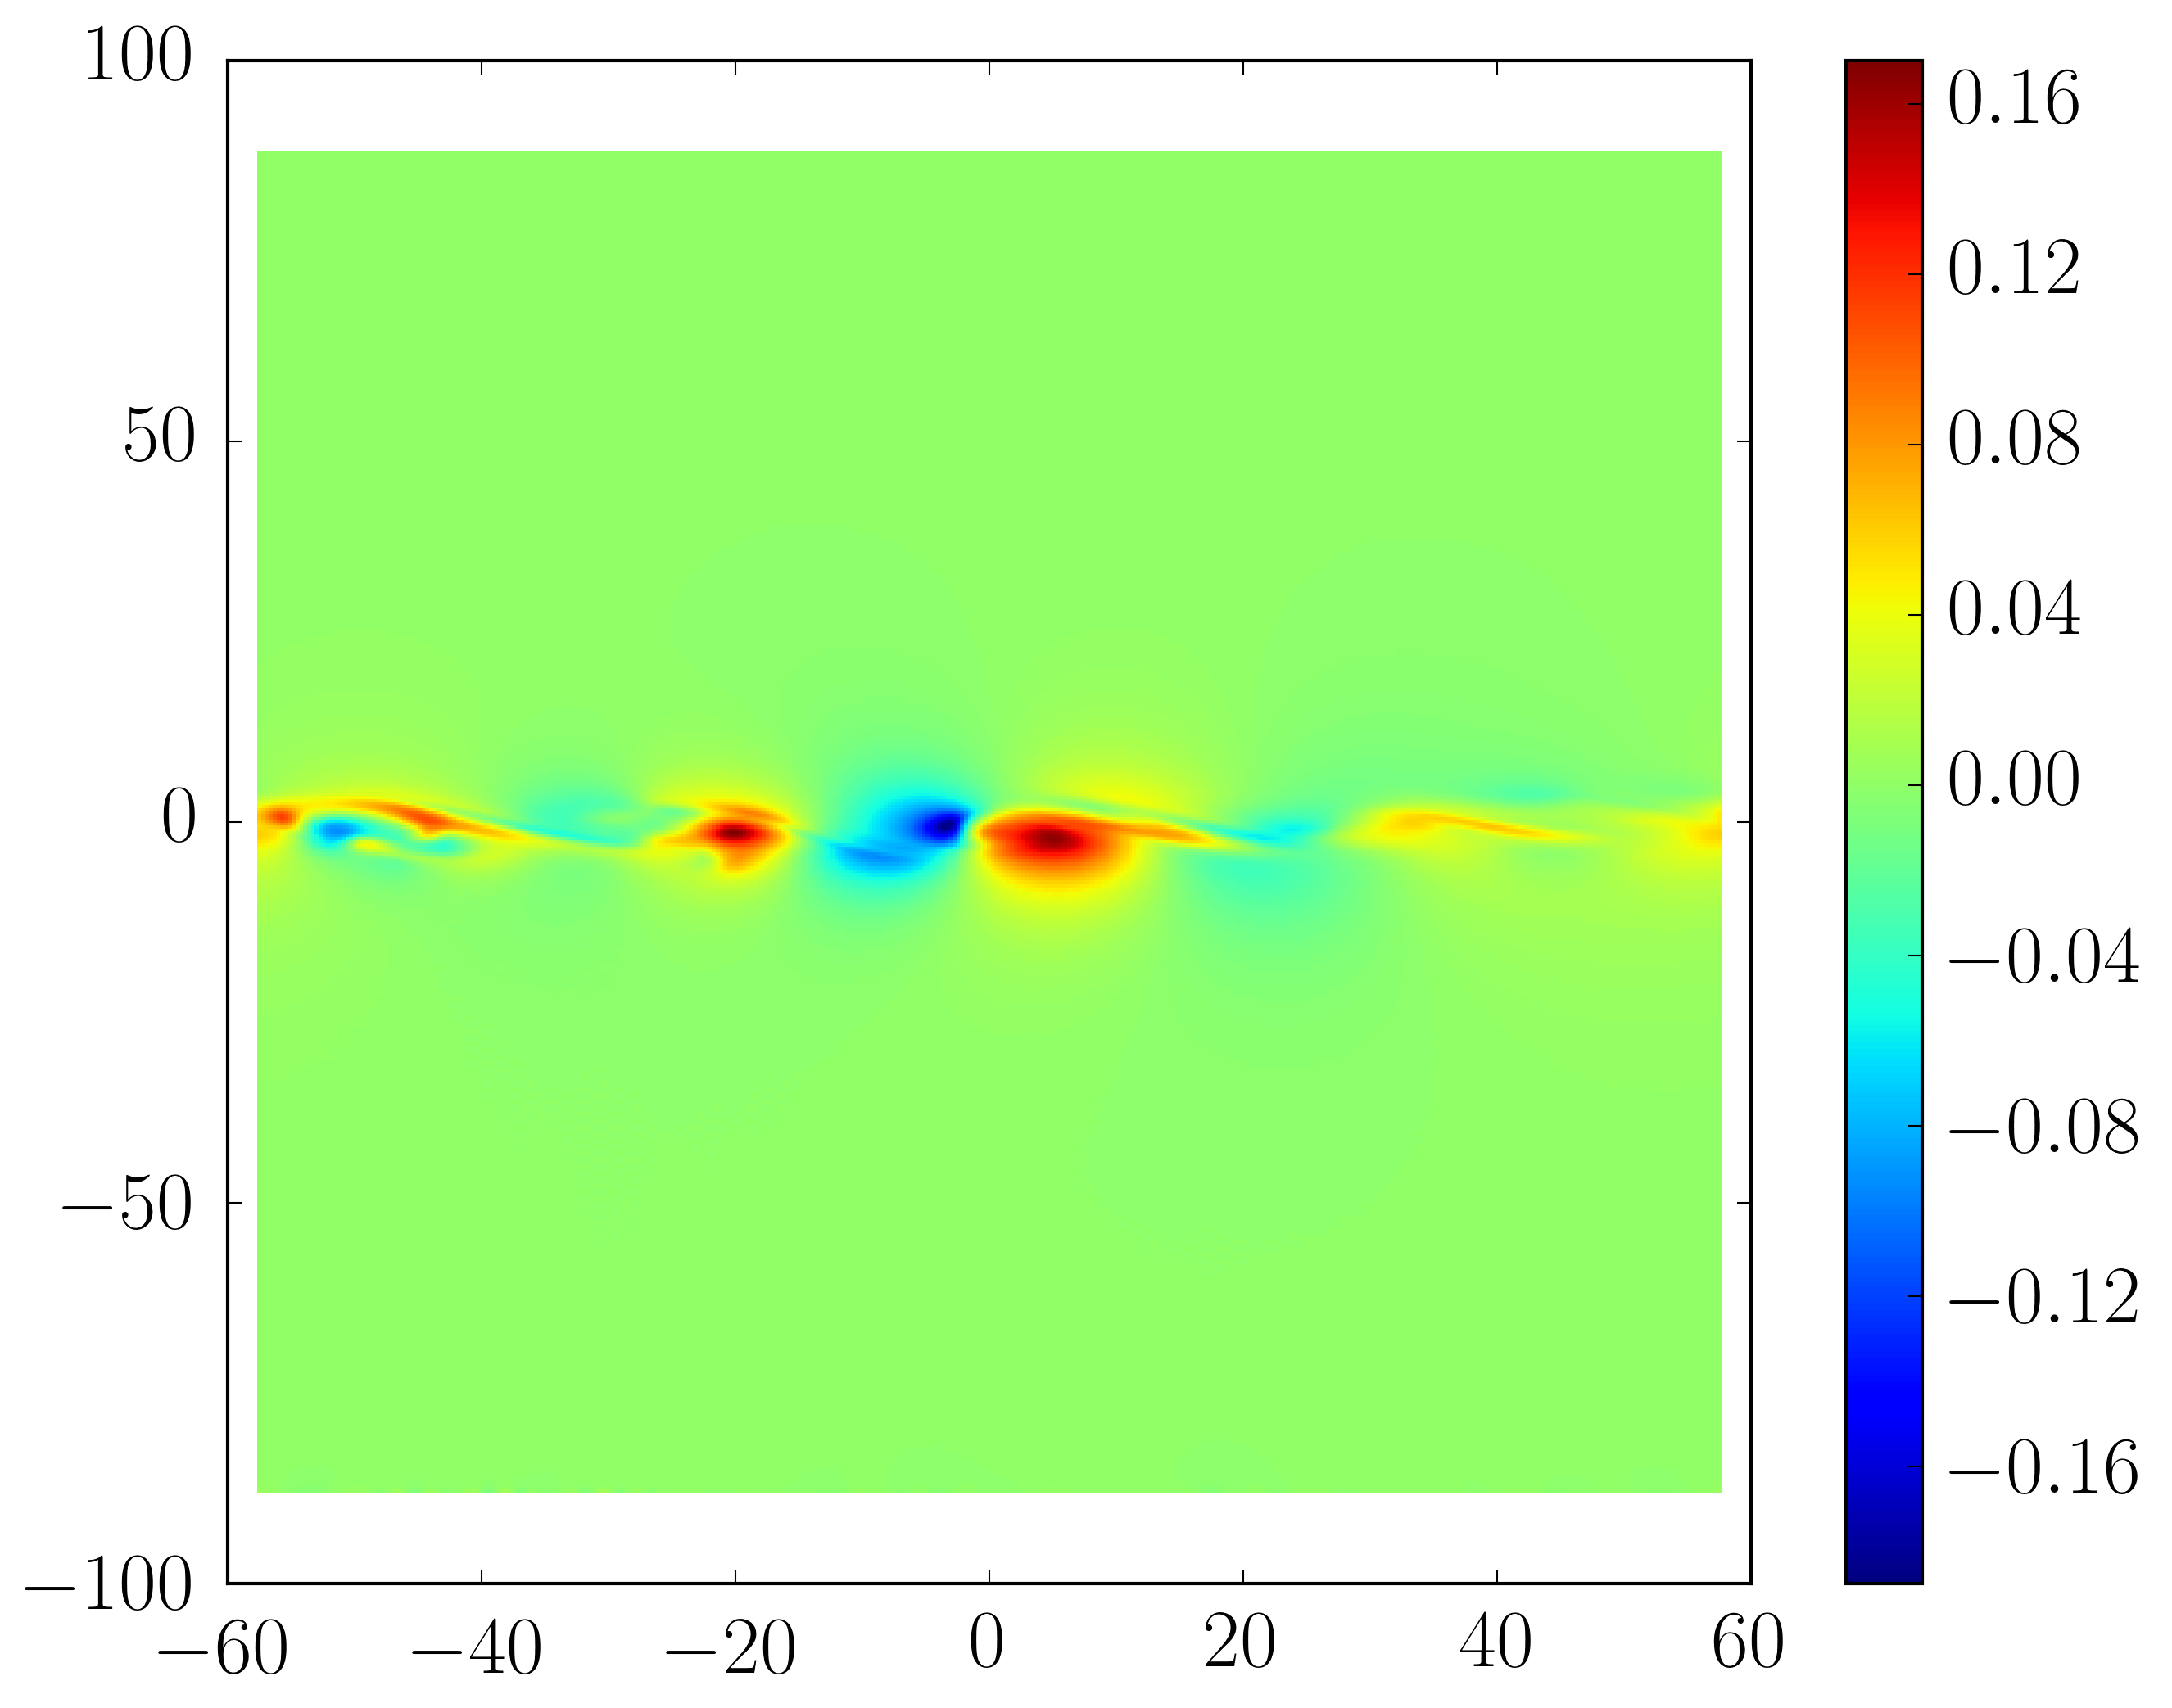

In [1408]:
plt.pcolor(x,y,np.transpose(rvp[:,:,0]))
plt.colorbar()

# Res x2 (CFL=0.25)

In [1397]:
p_file = '/share/drive/toni/VDML/s80/test/04/Resx2_012.Tfxz'
p_filep = '/share/drive/toni/VDML/s80/test/04/Resx2_011.Tfxz'
p_filev = '/share/drive/toni/VDML/s80/test/04/Resx2_012.vpxz'
p_filevp = '/share/drive/toni/VDML/s80/test/04/Resx2_011.vpxz'

In [1398]:
(Tf,y,x,z) = readfieldij(p_file)
(vp,y,x,z) = readfieldij(p_filev)
(Tfp,y,x,z) = readfieldij(p_filep)
(vpp,y,x,z) = readfieldij(p_filevp)

Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 232.72453308]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 232.72453308]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 197.39614868]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)
Fiel read correctly :)
nspec= 301
Fiel read correctly :)
Reading VOLUME XZ...

Data from time = [ 197.39614868]
mgalx = [384], my = [301], mgalz = [96]
(384, 301, 96)


In [1406]:
rv = vp/Tf;
rvp=vpp/Tfp;
mgalx=384;mgalz=96;my=301;
print np.shape(rvp)
#rvm  = np.mean(np.mean(rvm,axis=0),axis=1)
rvmpb  = np.sum(rvp[:,0,:])/(mgalz*mgalx)
rvmpt  = np.sum(rvp[:,-1,:])/(mgalz*mgalx)
print rvmpb-rvmpt
#rvmp = np.mean(np.mean(rvmp,axis=0),axis=1)
Dt = 232.72453308-197.39614868;
C = (np.sum(1.0/Tf[:]-1.0/Tfp[:])/(mgalx*mgalz*my)/Dt+rvmpt-rvmpb)/np.max(rvp[:])*100
print np.max(rvp[:]), np.max(np.mean(np.mean(rvp,axis=0),axis=1))
errorC[2] = C
#C = (np.trapz(np.mean(np.mean(1.0/Tf-1.0/Tfp,axis=0),axis=1),y)/Dt+rvmp[-1]-rvmp[0])/np.max(rvmp)*100
print C

(384, 301, 96)
-7.42301358791e-05
0.20753837488 0.0132653146497
0.0355651938321


# Res*0.75

In [1451]:
461/345.0*512

684.1507246376812

In [1456]:
1024*0.75*1.5

1152.0

In [1463]:
Dxnew = 461.0/1151;print Dxnew

0.400521285838


In [1465]:
alpnew = 0.0545178769*0.75 ; betnew=0.1455390277*0.75;
Dxnew = 2*np.pi/alpnew/384;print Dxnew

0.400173610758


In [1466]:
print alpnew,betnew

0.040888407675 0.109154270775


WE are running with the same mesh on y, only changing resolution in X and Z.


In [1467]:
301*0.75

225.75

In [6]:
def create_mesh1D(Ly,my,type,alpha,filename='mesh.txt',beta=0.8,gamma=0.05,nextra=0,zeta=0.0,teta=0.0):
        """
        This function will create 1D mesh according to given shape and type
        y = create_mesh1D(Ly,my,type,alpha,filename)
                Ex. y = create_mesh1D(172./2,1025,'tanh',0.5,'mesh.txt')
                will create a mesh with more 1/0.5 more resolution close to
                boundaries than in the rest.
        """
        import matplotlib.pyplot as plt
        import numpy as np
        from scipy.integrate import cumtrapz

        if type == 'tanh':
                y=np.linspace(-1,1,my)
                Dy = np.array(np.ones(my))
                Dy=(1+alpha)+alpha*np.tanh((y-beta)/gamma)
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew

        elif type =='test':
                y=np.linspace(-1,1,my)
                Dy=(1+alpha)+alpha*np.tanh((y-beta)/gamma)
                #print Dy
                #nextra =(0.15/Dy[-1]+1).astype(int)
                #print nextra
                #xfunc = Dy[-1]*np.ones([nextra])
                yc = y[my-nextra+1];
                yextra = (y[-1]-yc)
                Dyf = Dy[my-nextra]
                yb = np.linspace(yc,y[-1],nextra);
                A=zeta; minfk = Dyf*(A-0.5)/(A+0.5)
                B=(Dyf-minfk)*yextra/Dyf*teta;
                xfunc =Dyf*(A+np.tanh(-(yb+yextra/2-1)/B)/2.0)/(A+0.5)
                Dy[my-nextra:]=xfunc
                #plt.plot(y,Dy)
                #print len(Dy)
                #print my
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew

        elif type =='line':
                ynew=np.linspace(-Ly,Ly,my)
                np.savetxt(filename, ynew)
                return ynew
        elif type =='sin':
                y=np.linspace(-1,1,my)
                Dy = np.array(np.ones(my))
                Dy=alpha+beta*sin(2*np.pi*(y-gamma)/2)
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew
        elif type =='cos':
                y=np.linspace(-1,1,my)
                Dy = np.array(np.ones(my))
                Dy=beta+cos(2*np.pi*y/2)
                for j in range(0,my/2):
                        Dy[j] =Dy[-1-j]
                y2 = cumtrapz(Dy,y,initial=0)
                ynew = 2*y2*Ly/y2[-1] - Ly
                np.savetxt(filename, ynew)
                return ynew
        else:
                print "That MESH TYPE is not ready yet MAN..."
                return np.ones(my)
        #plt.plot(ynew[:-1],np.diff(ynew),'b.') 

1.02022166609
0.980179144624
0.543127416031


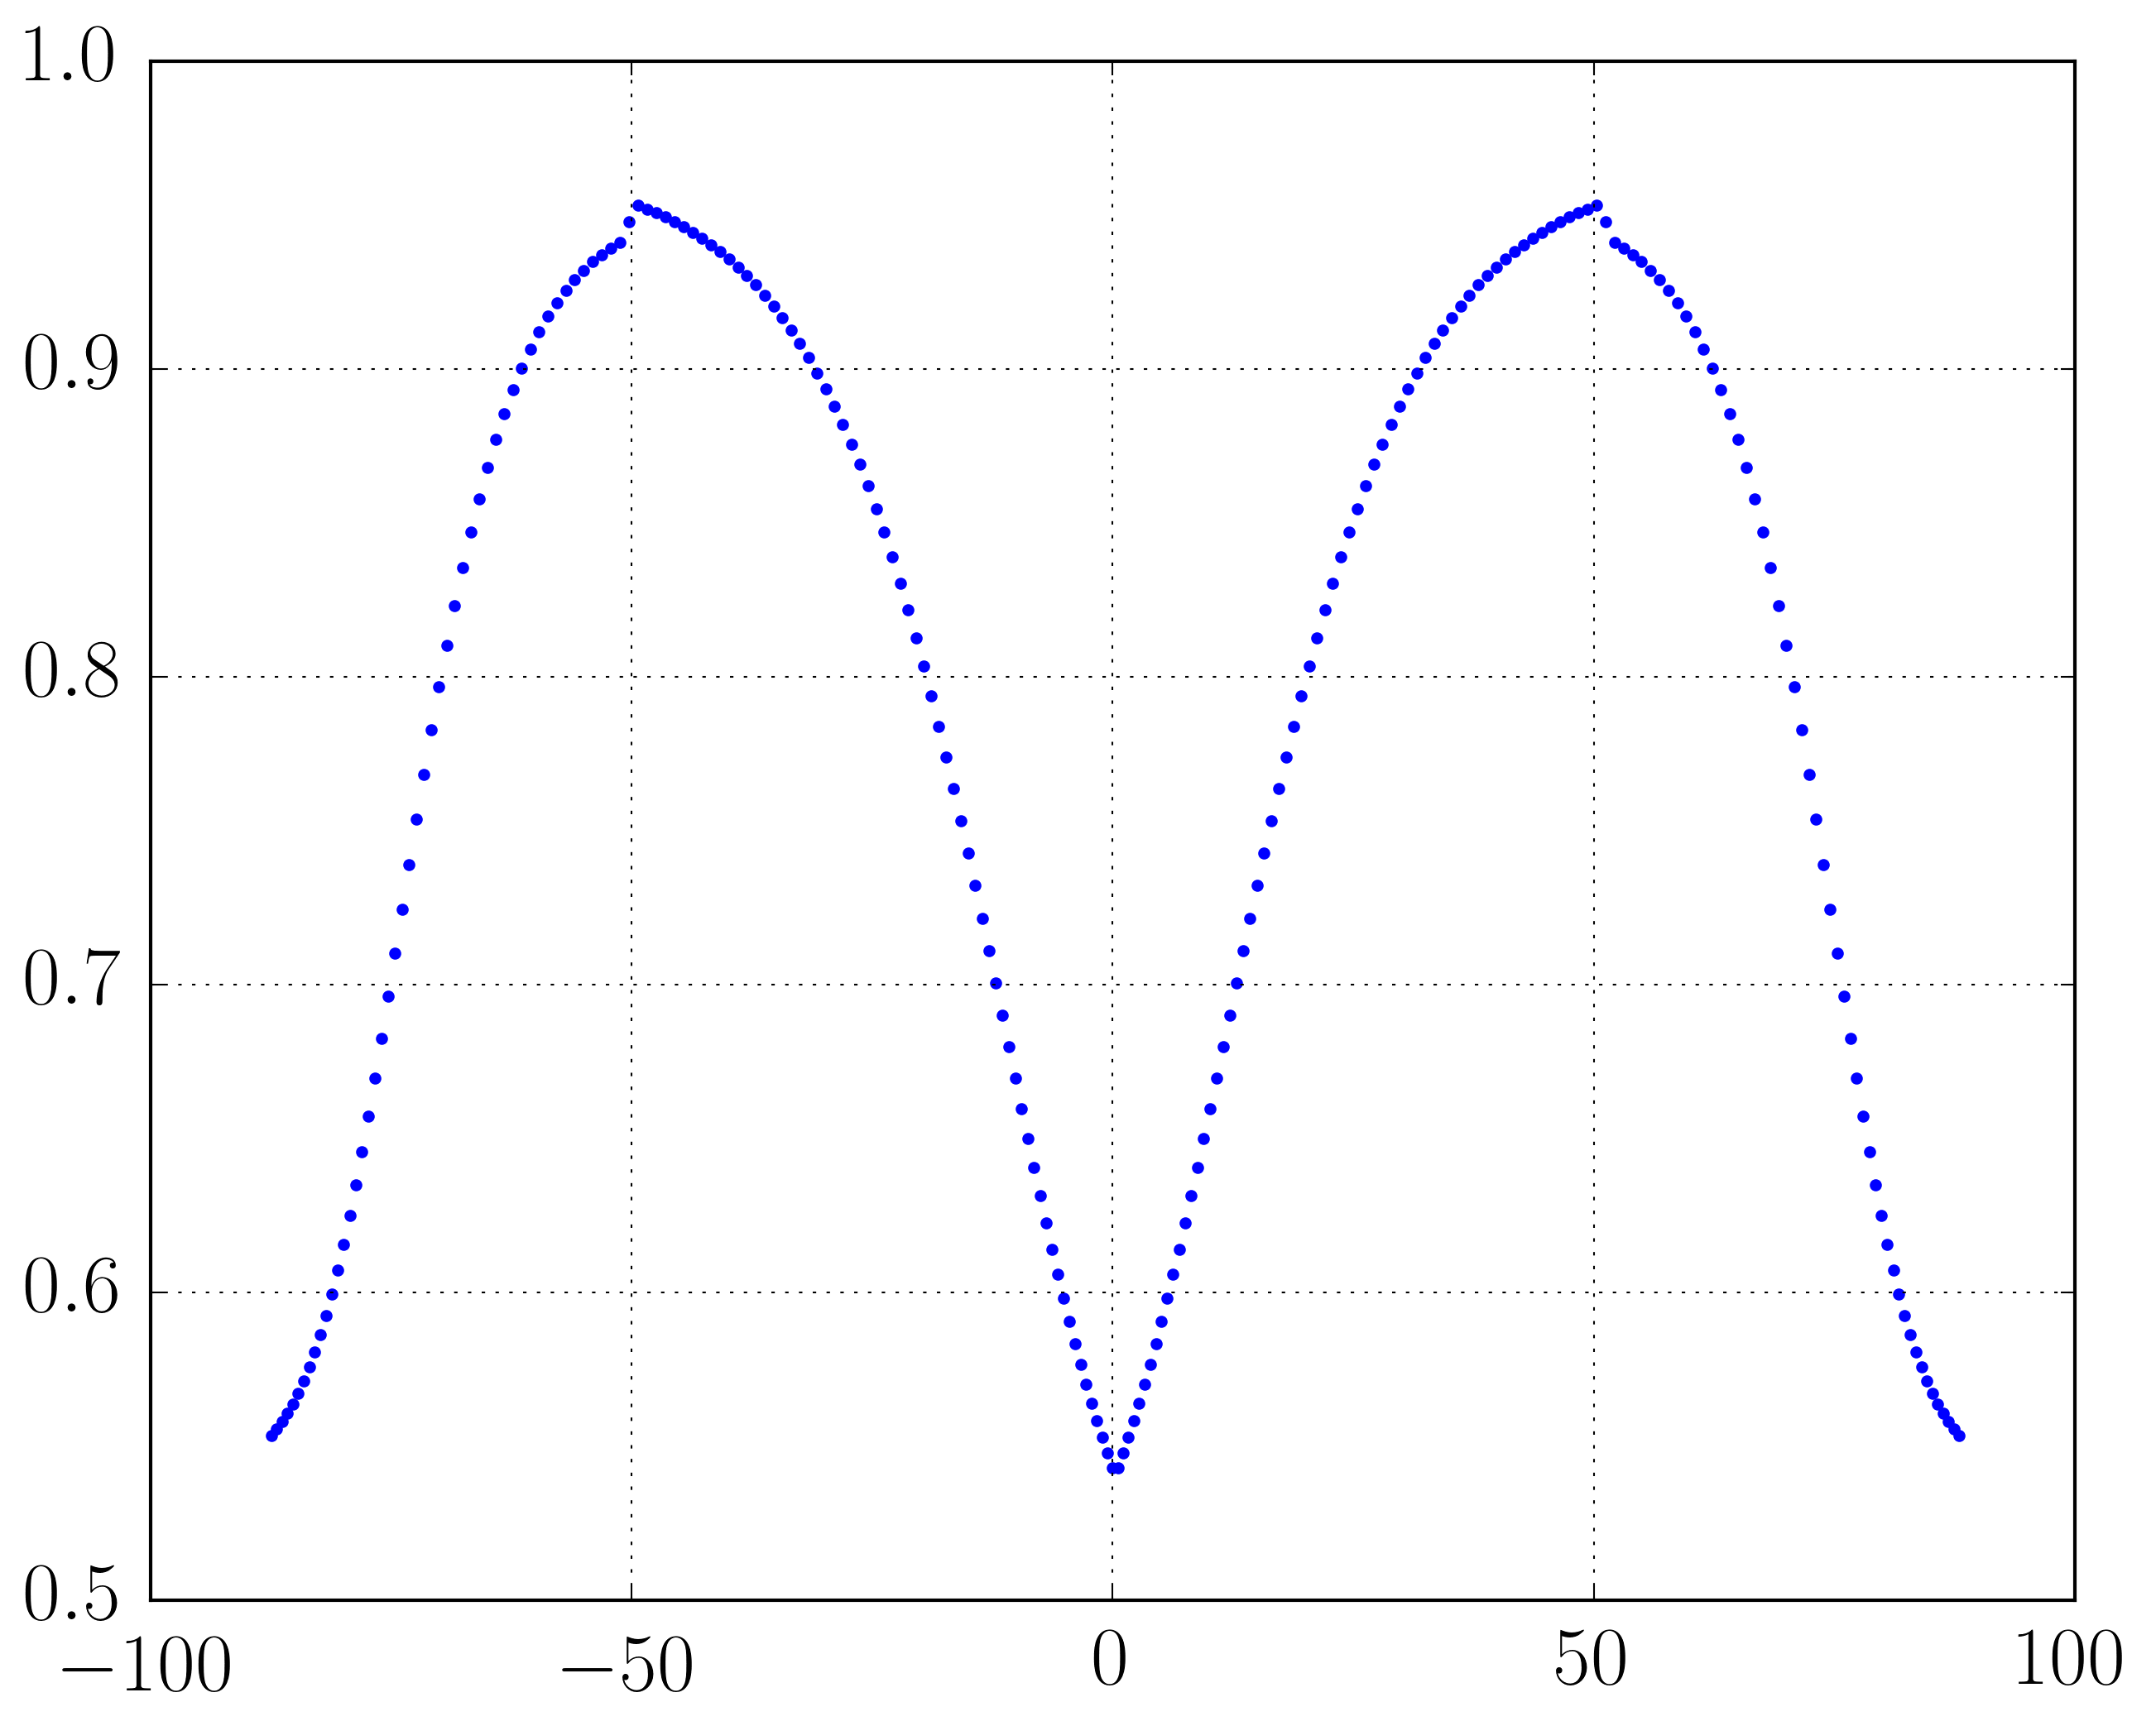

In [1977]:
my=229
Ly=176.0
y=create_mesh1D(Ly/2.0,my,'test',0.5,'/home/toni/small_lowres.txt',0.2,0.20,51,1.8,0.65)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
print np.min(Dy)
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

1.01999237953
0.980399481479
0.305961347226
0.305961347226 0.848110420539 0.305961347226


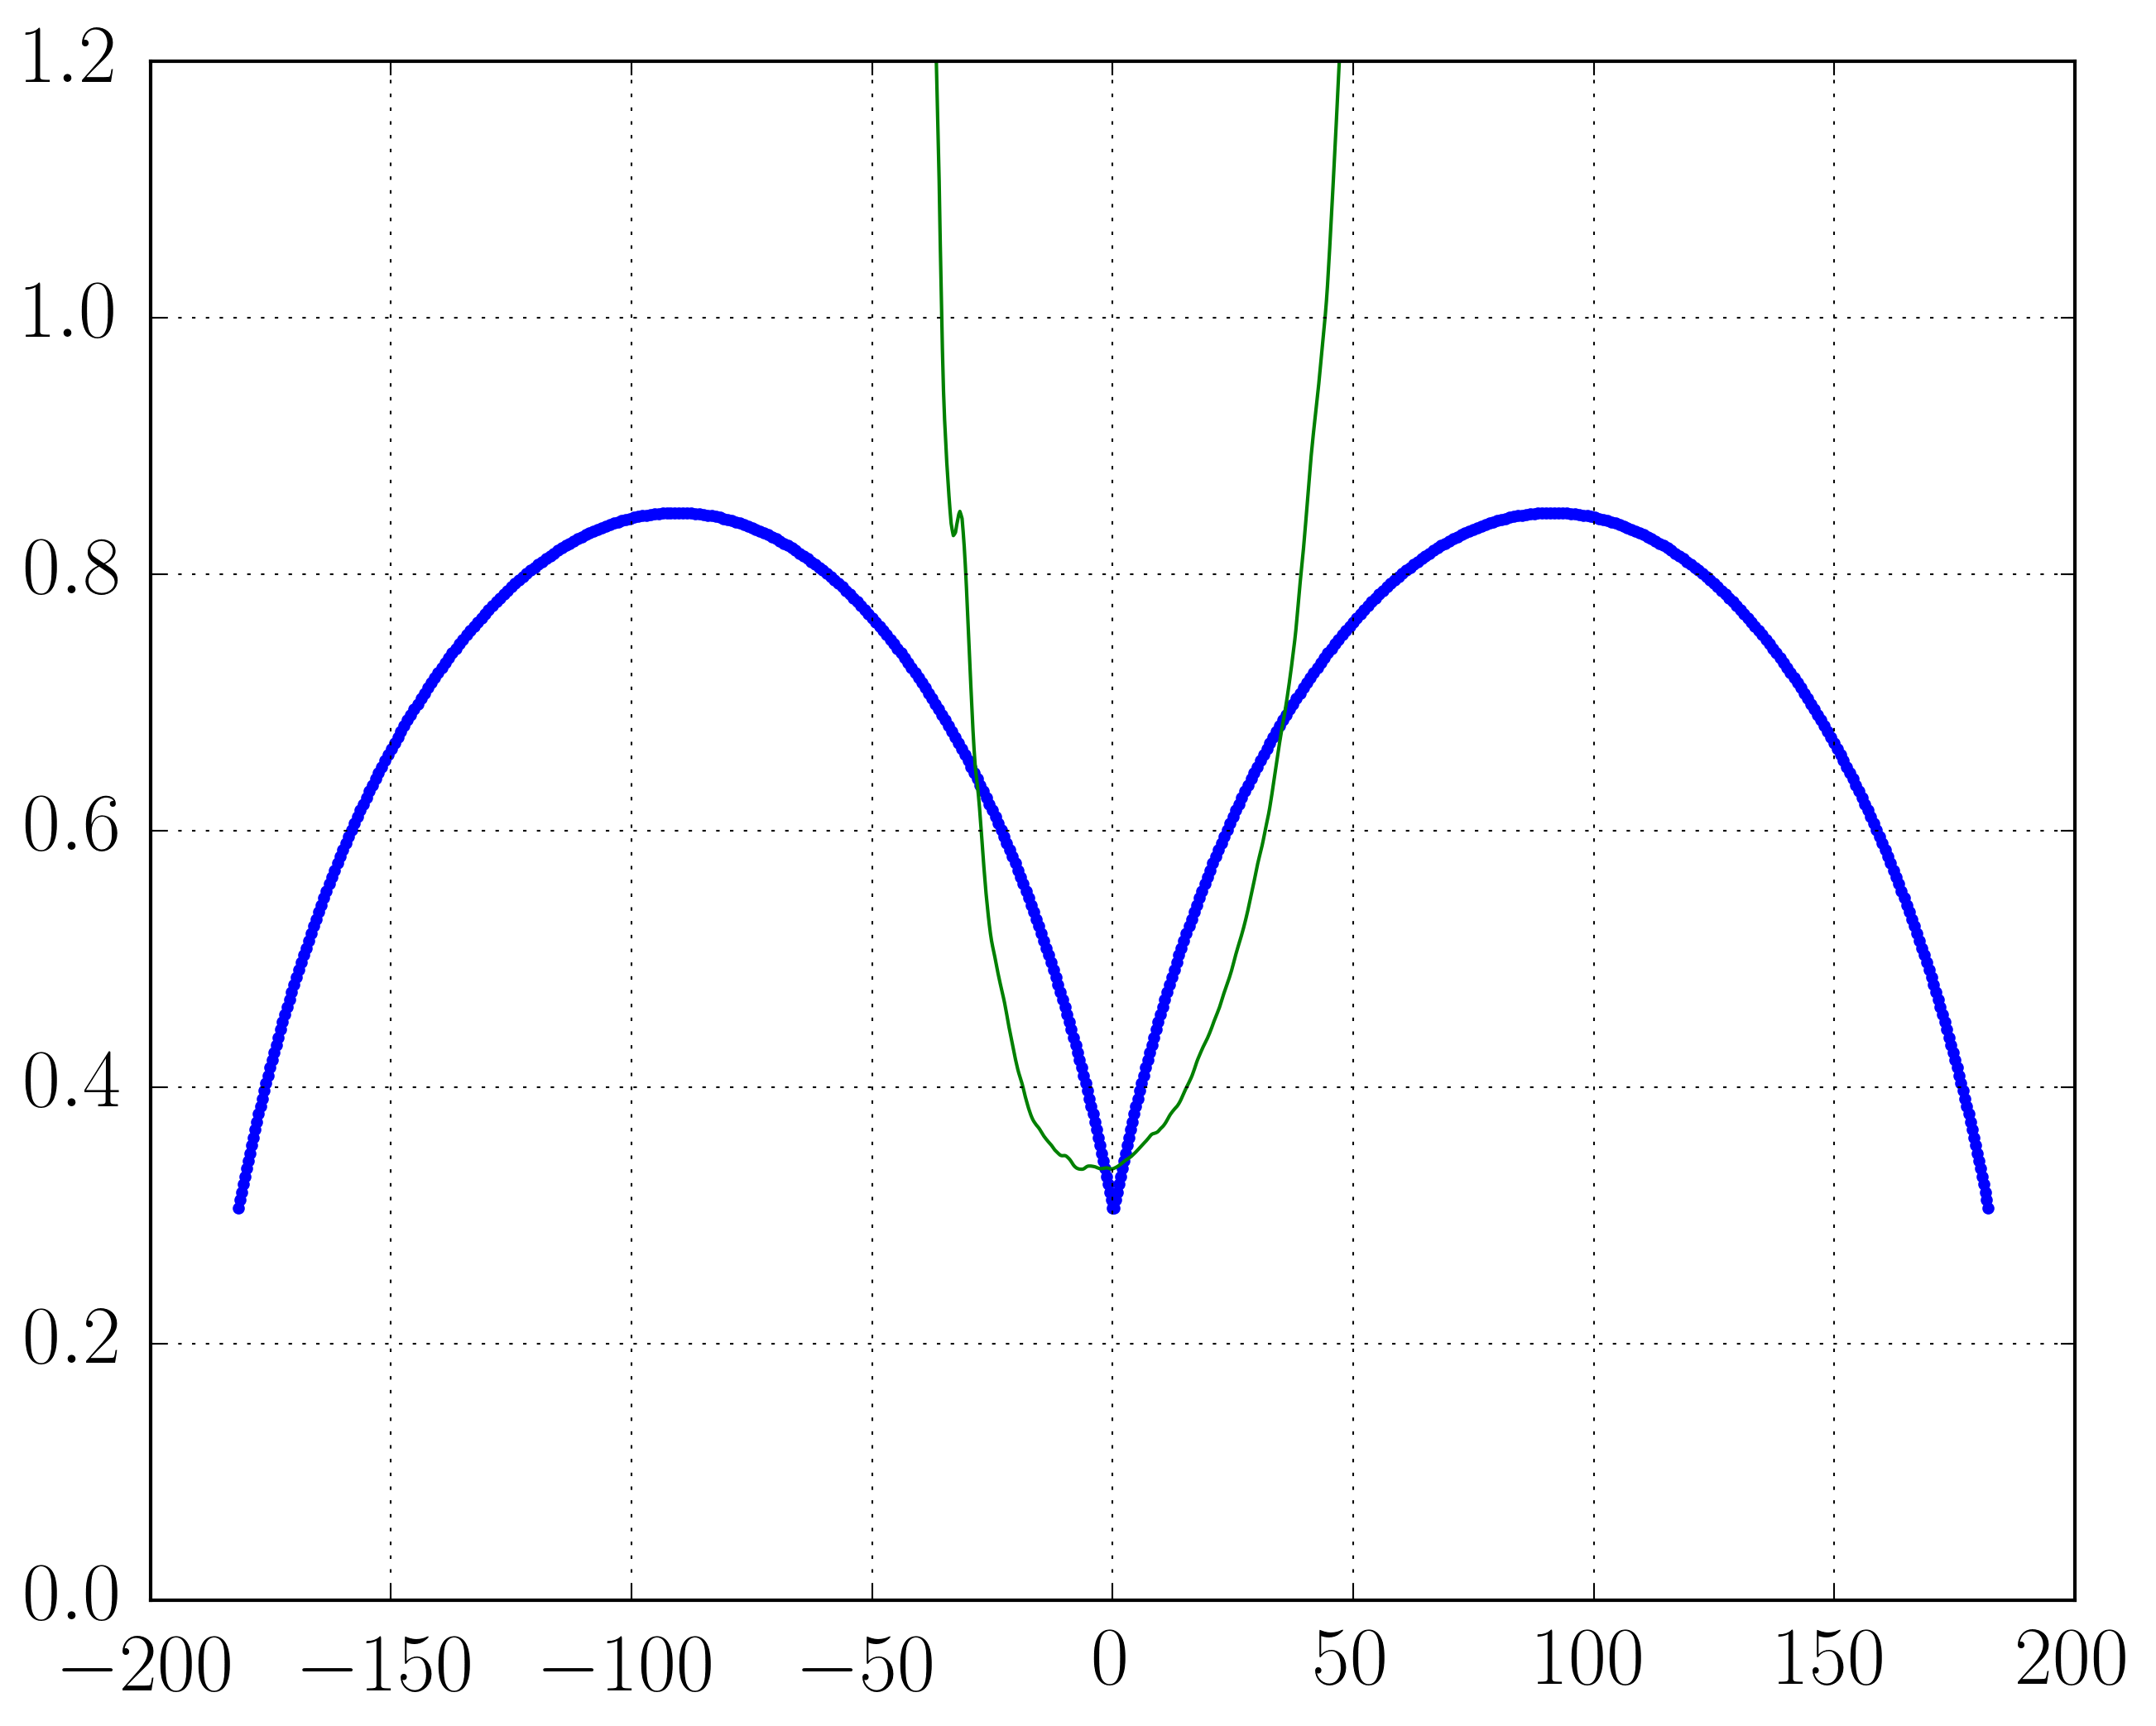

In [1939]:
my=561
Ly=364.0
y=create_mesh1D(Ly/2.0,my,'sin',0.2,'/home/toni/test.txt',0.36,0.0)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
print np.min(Dy)
#ax2 = ax.twinx()
path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dmpoint= np.array(f['dmpoint'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    rhom = np.array(f['rhom'])
    vm = np.array(f['vm'])
    Relambda = np.array(f['Relambday'])
    dyeta = np.array(f['dyeta'])
    eta  = np.array(f['eta'])
kk = -10
plt.plot(yf ,eta[:,-20])
plt.ylim([0,1.2])
print np.min(Dy),np.max(Dy),Dy[-1]
#plt.yscale('log')
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

# Previous mesh for comparition

1.03845210917
0.962971706805


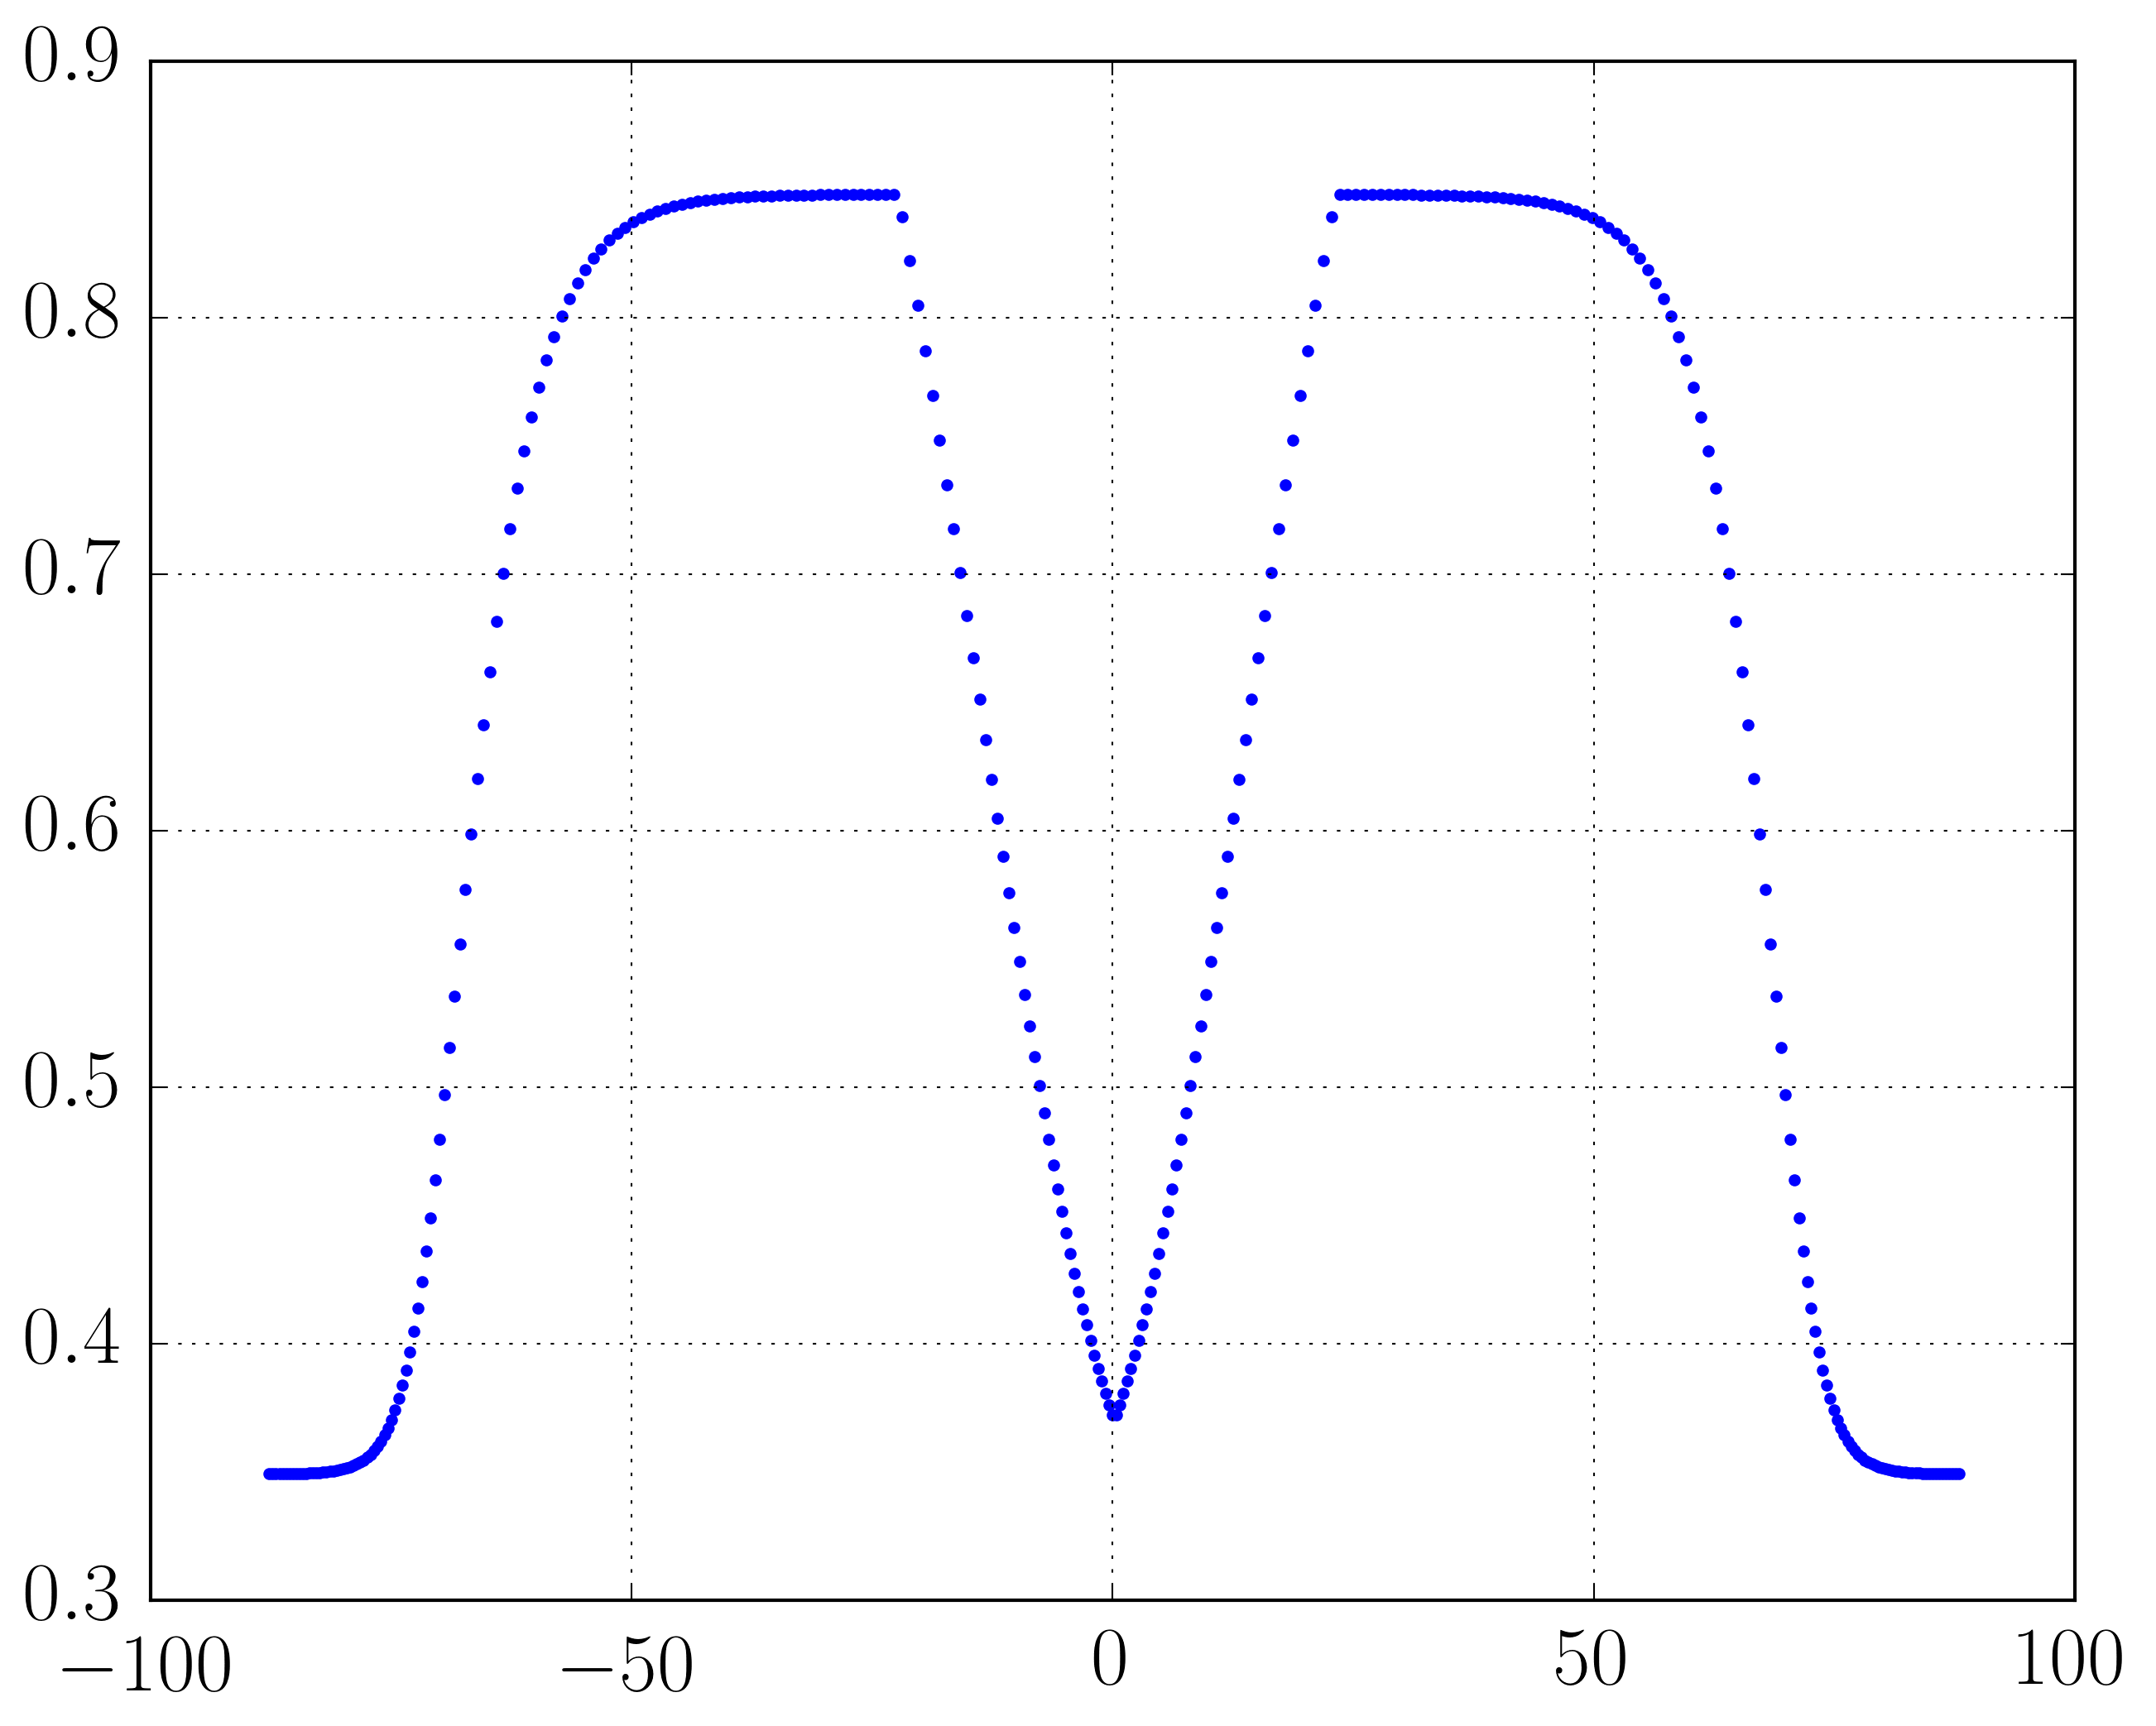

In [1609]:
0.38/0.75

0.5066666666666667

In [1610]:
0.4*1.5

0.6000000000000001

# New mesh LOWRES

In [1637]:
601*0.75

450.75

1.01379050151
0.98639708945
651
0.301272877908 0.439858399409 0.439858399409


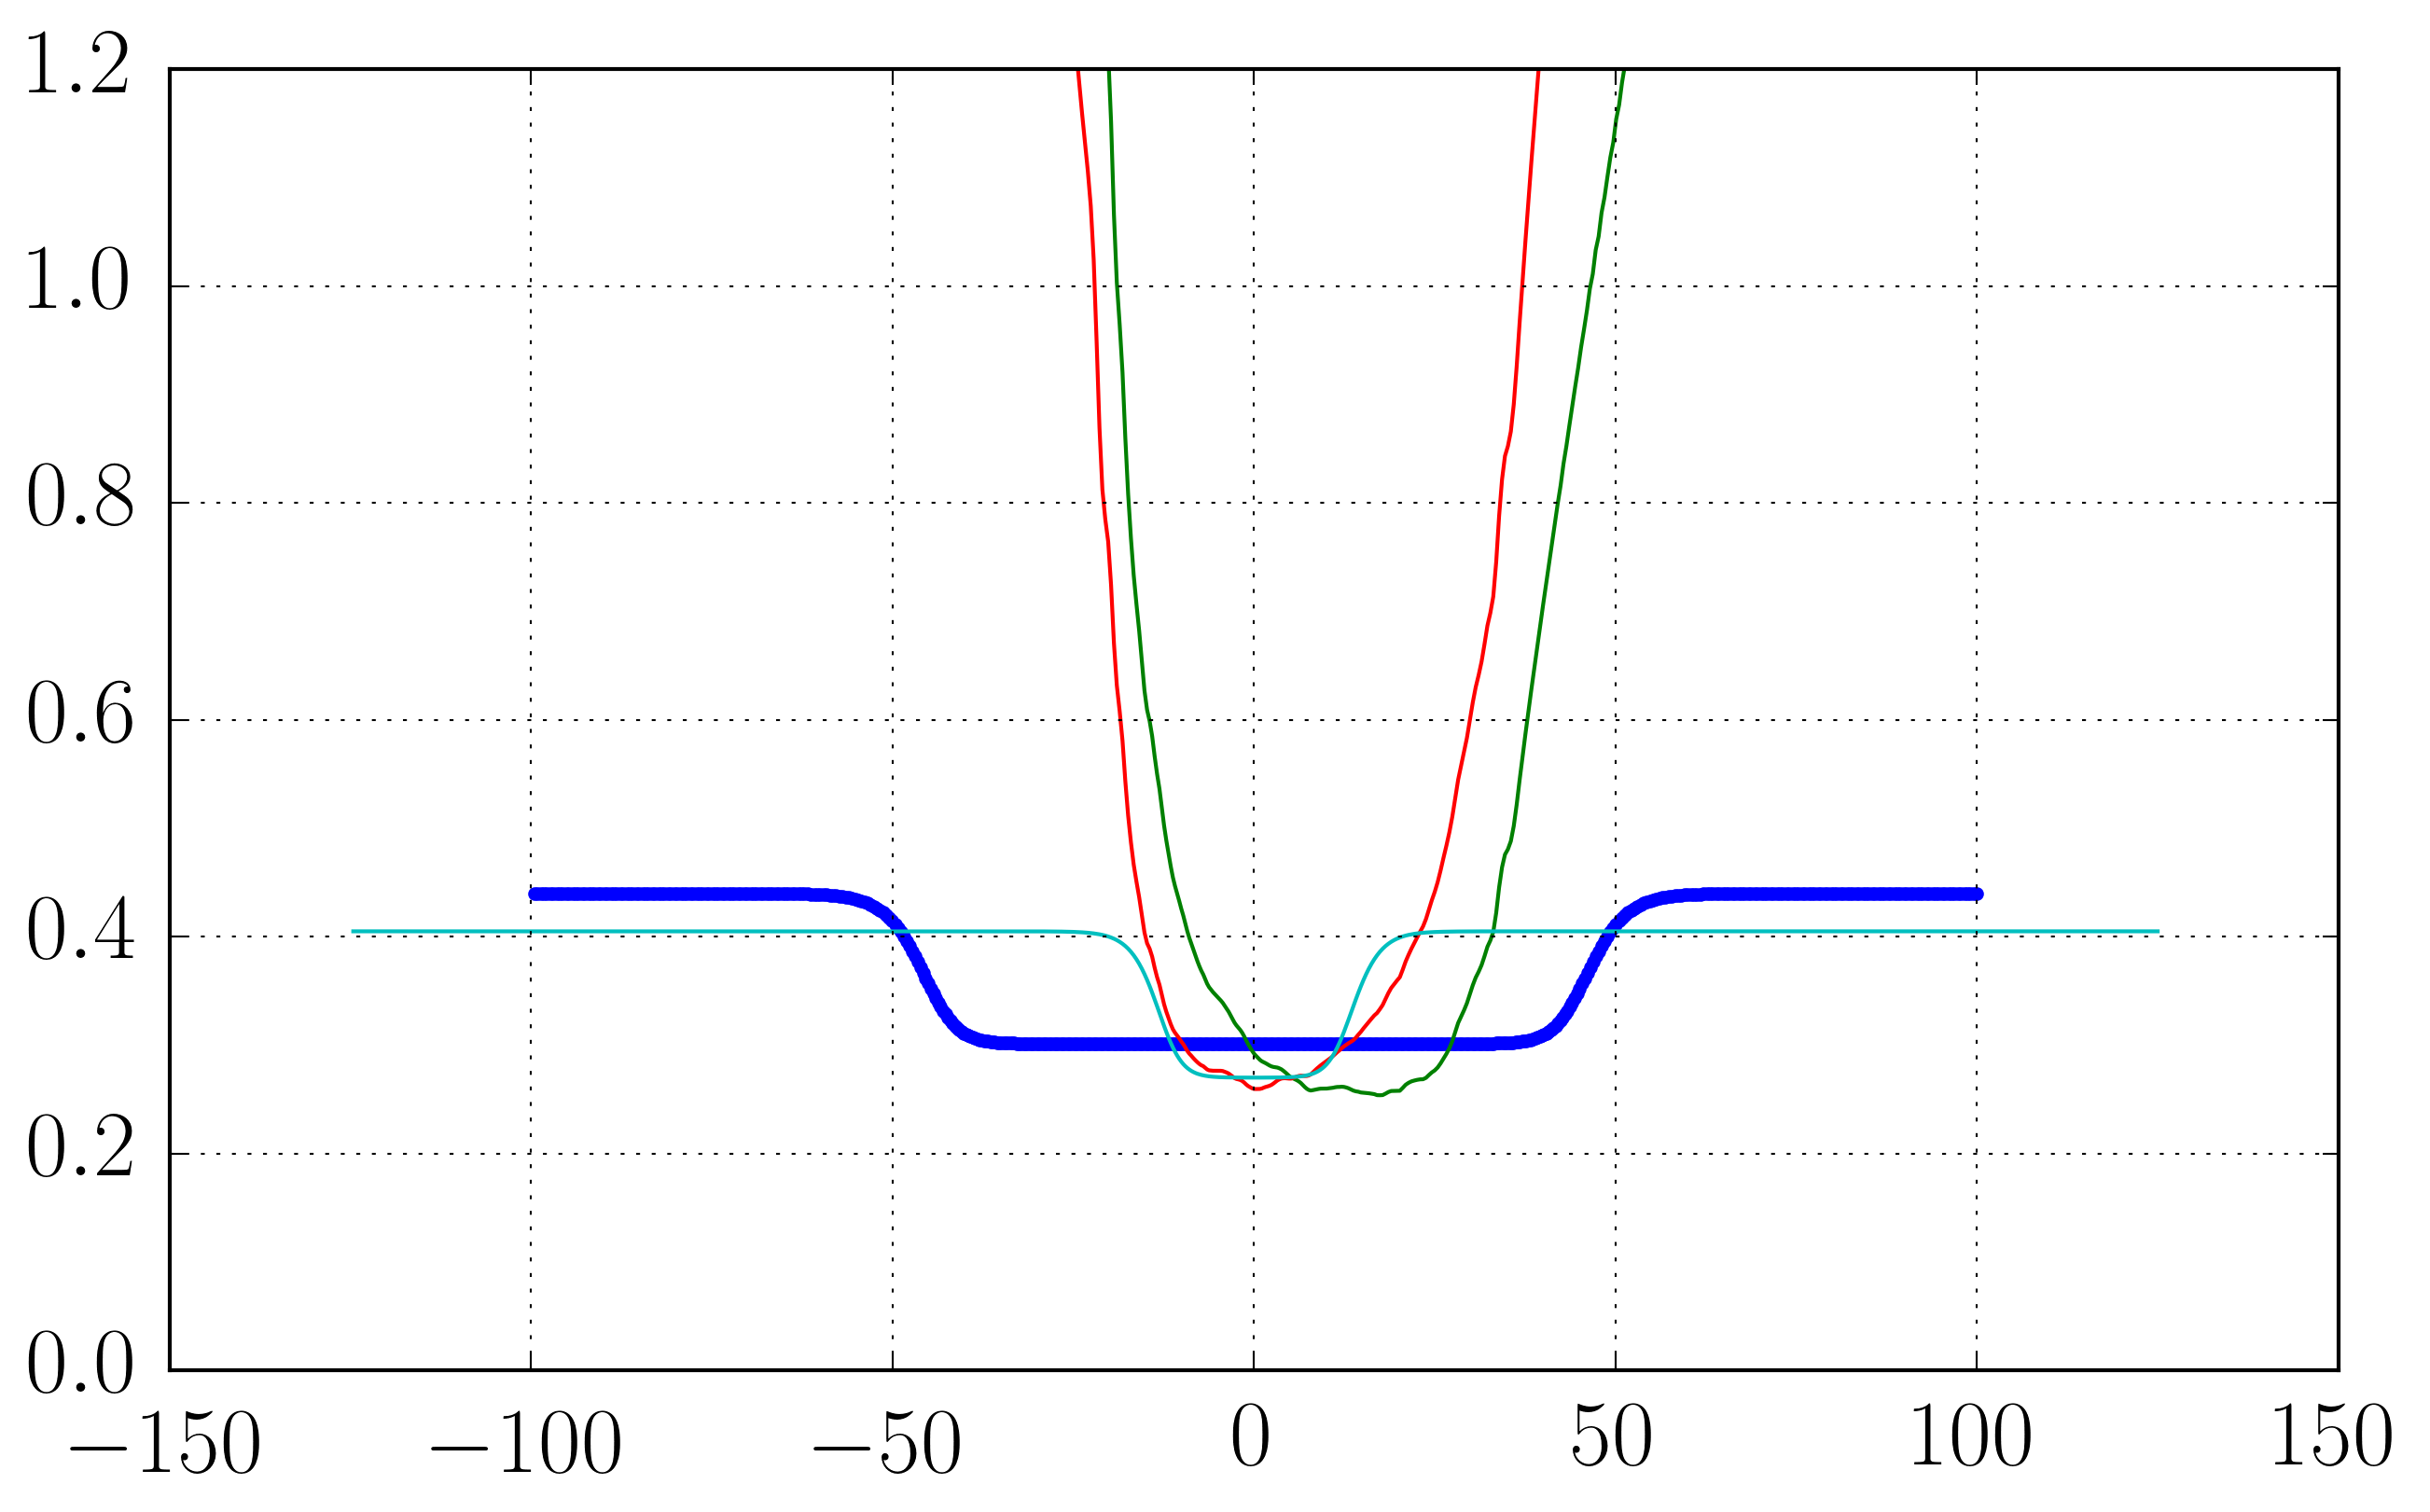

In [73]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
my=551
Ly=200.0
#y=create_mesh1D(Ly/2.0,my,'test',1.2,'/home/toni/JFM_new.txt',0.3,0.12,100,1.5,0.35)
y=create_mesh1D(Ly/2.0,my,'tanh',0.23,'/home/toni/test06.txt',0.55,0.05,70,3.1,0.42)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
#ax2 = ax.twinx()
#path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
#path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
path = '/share/drive/toni/VDML/s80/test/05/tanhLy250/h5.stats'
#path = '/share/drive/toni/VDML/s80/test/05/01/h5.stats'
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dmpoint= np.array(f['dmpoint'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    rhom = np.array(f['rhom'])
    vm = np.array(f['vm'])
    Relambda = np.array(f['Relambday'])
    dyeta = np.array(f['dyeta'])
    eta  = np.array(f['eta'])
kk = -10
plt.plot(yf ,eta[:,-1]/(0.7/rhom[:,-1])**0.5)
plt.plot(yf ,eta[:,-1])
print len(yf)
plt.ylim([0,1.2])
plt.plot(yf[1:],np.diff(yf))
print np.min(Dy),np.max(Dy),Dy[-1]
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

In [61]:
0.3*1.5

0.44999999999999996

In [81]:
print 0.01363538*2,   0.0364005*2

0.02727076 0.072801


1.0189156462
0.981435513071
0.338358727237 0.87003057041 0.87003057041


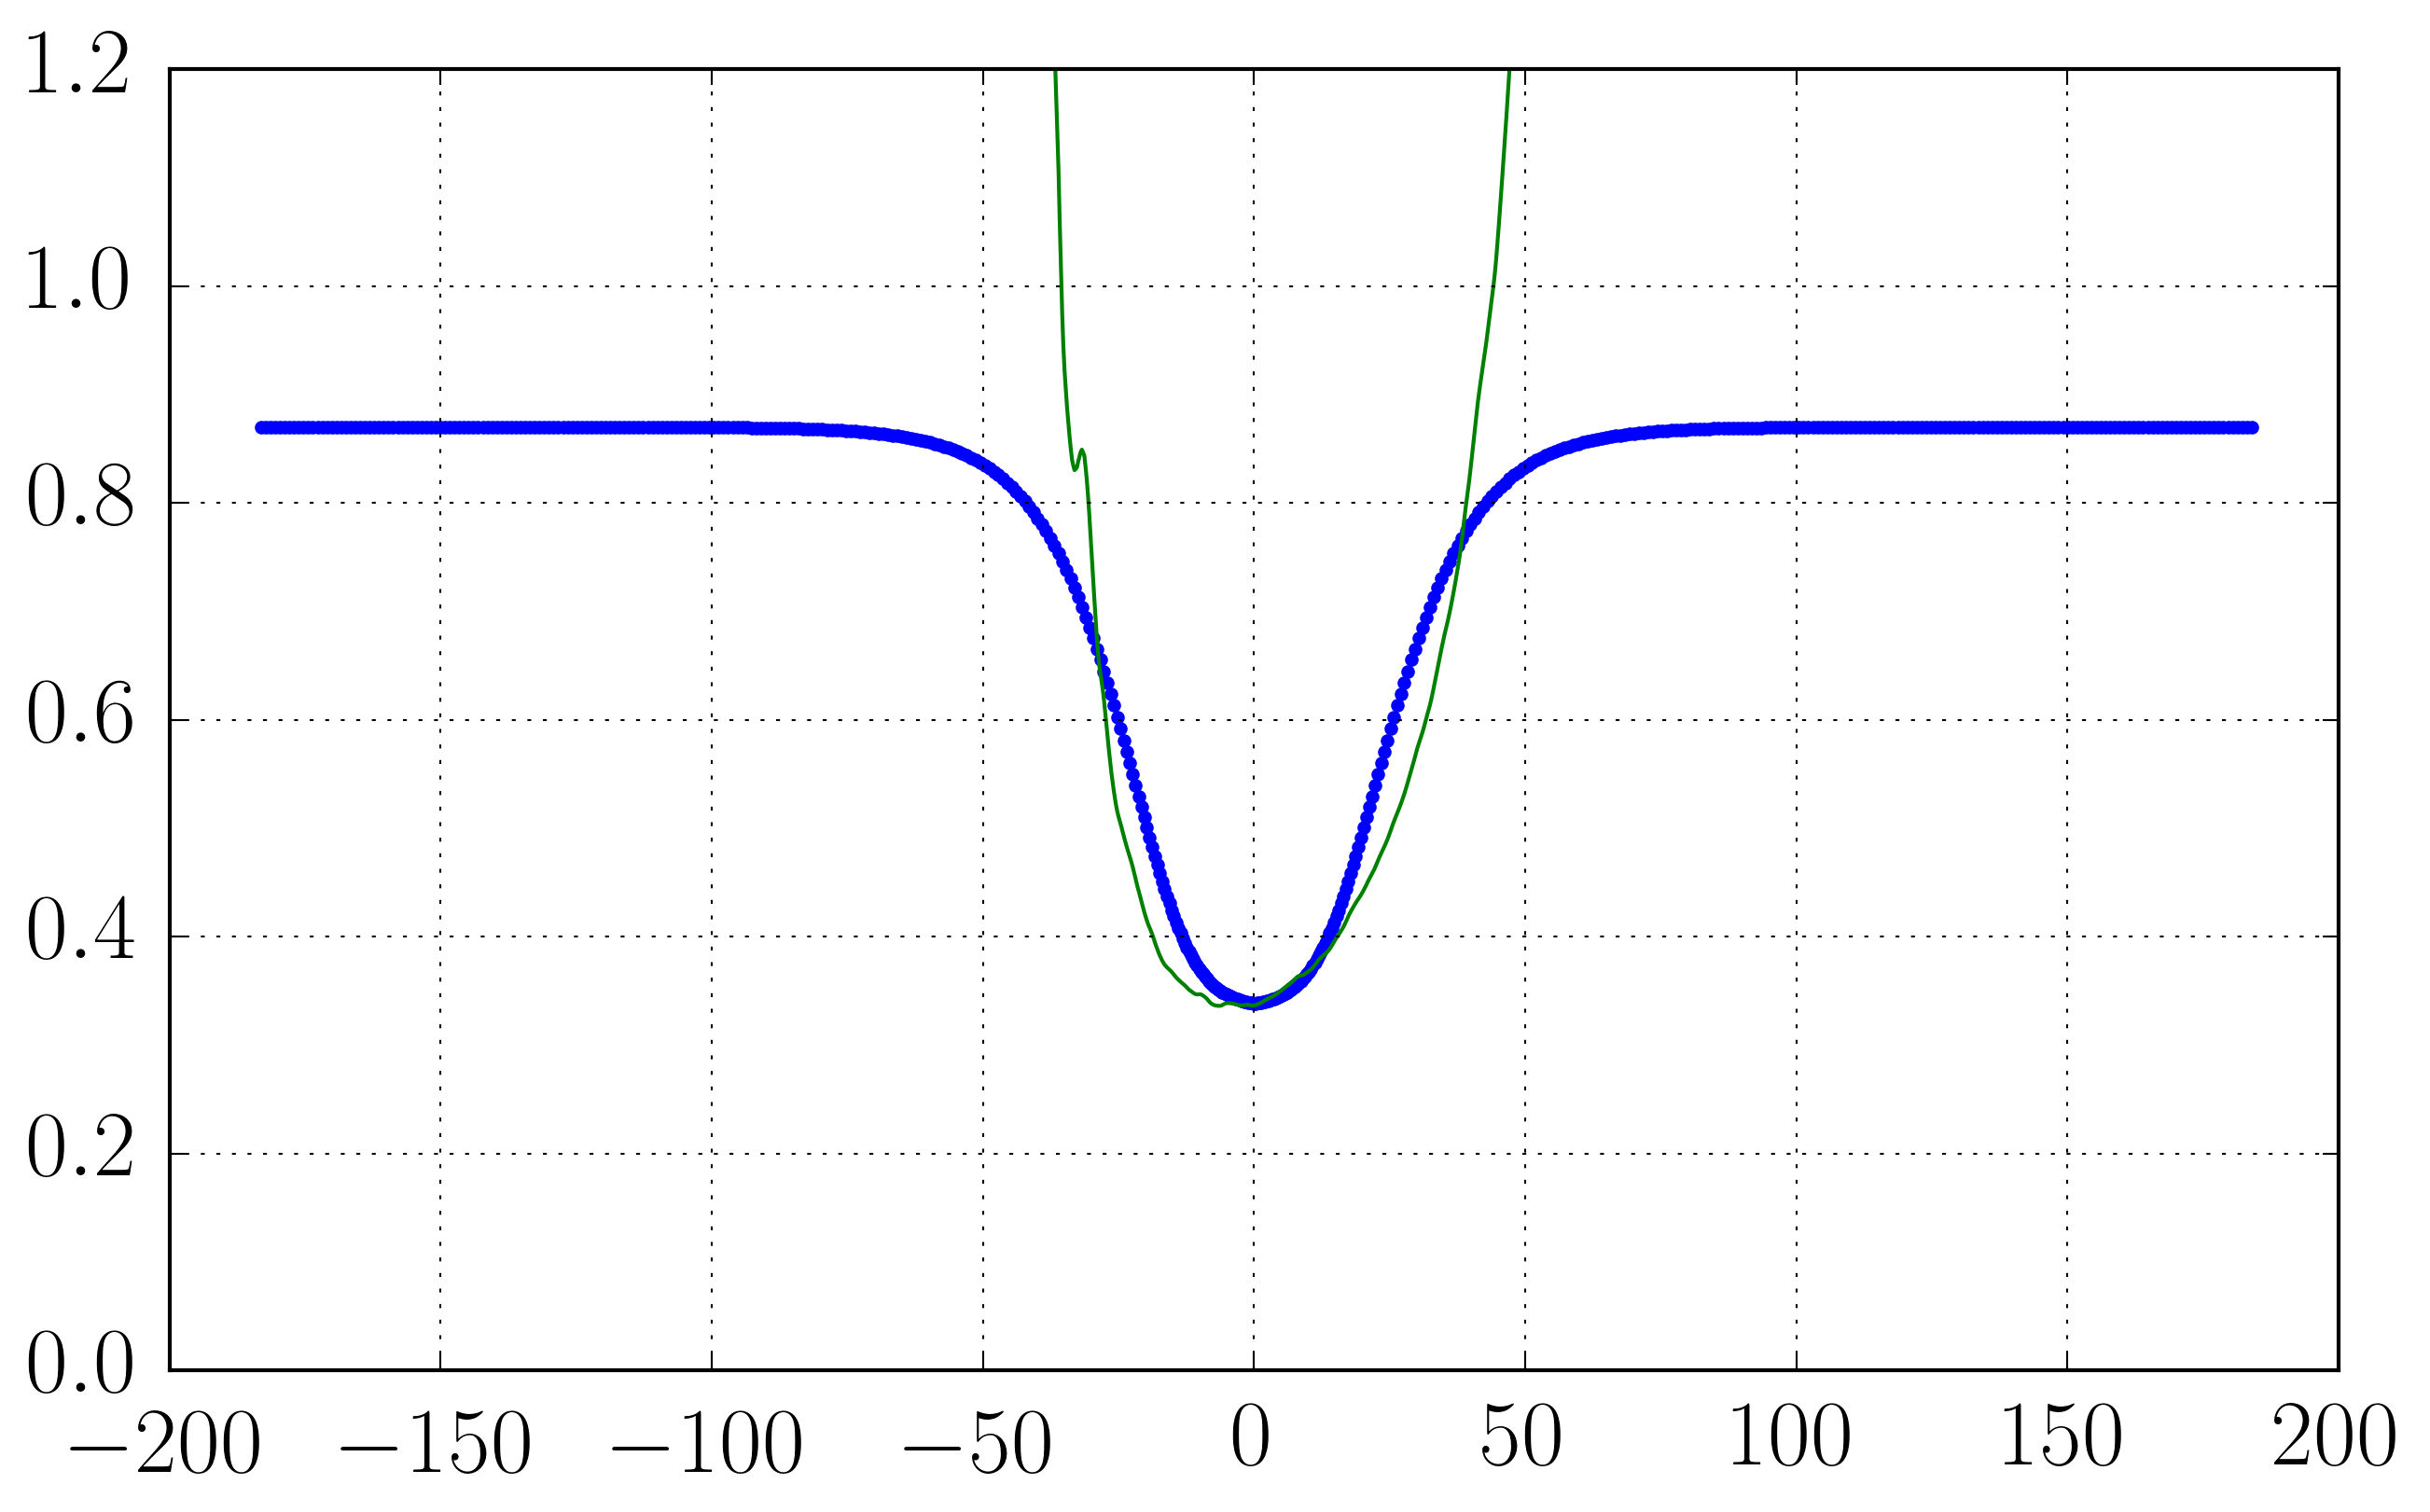

In [2027]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
my=501
Ly=368.0
y=create_mesh1D(Ly/2.0,my,'tanh',0.8,'/home/toni/JFM_newB.txt',0.25,0.1)
Dy=np.diff(y)
#print np.max(Dy[1:]/Dy[:-1])
#print np.min(Dy[1:]/Dy[:-1])
plt.plot(y[1:],np.diff(y),'.')
print np.max(np.diff(y[1:])/np.diff(y[:-1]))
print np.min(np.diff(y[1:])/np.diff(y[:-1]))
plt.grid('on')
#ax2 = ax.twinx()
path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dmpoint= np.array(f['dmpoint'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    rhom = np.array(f['rhom'])
    vm = np.array(f['vm'])
    Relambda = np.array(f['Relambday'])
    dyeta = np.array(f['dyeta'])
    eta  = np.array(f['eta'])
kk = -10
plt.plot(yf ,eta[:,-20])
plt.ylim([0,1.2])
print np.min(Dy),np.max(Dy),Dy[-1]
#plt.plot(yf[1:]/dm[kk],np.diff(yf)*1.0/dyeta[:-1,kk])

# Time estimation of each run

In [1848]:
npoints = 768*192*601; nsteps = 12000; nprocs = 64.0; totaltime=42401.03;
theta = totaltime/npoints*nprocs/nsteps;
print theta

2.55175053056e-06


**30 steps for 1 tau**

For s=8 cases we wwant to run up to 800 tau; and for s=2 and s=1 cases we want to run up to 400 tau. 600 tau for s=4.


In [1849]:
nsteps_s12= 400*20;
nsteps_s4 = 600*20;
nsteps_s8 = 800*20;
print nsteps_s12,nsteps_s4,nsteps_s8

8000 12000 16000


In [1850]:
total_steps = nsteps_s12*6+nsteps_s4*3+nsteps_s8*3

In [1851]:
npoints2= 1536*561*576;
# RUNNING in ICARO with 64 procs
run_s12=nsteps_s12*theta*npoints2/nprocs/3600.0;print run_s12
run_s4=nsteps_s4*theta*npoints2/nprocs/3600.0;print run_s4
run_s8=nsteps_s8*theta*npoints2/nprocs/3600.0;print run_s8

43.9766645036
65.9649967554
87.9533290072


In [1852]:
# RUNNING in XSEDE with 128 procs
nprocs2=128
run_s12=nsteps_s12*theta*npoints2/nprocs2/3600.0;print run_s12
run_s4=nsteps_s4*theta*npoints2/nprocs2/3600.0;print run_s4
run_s8=nsteps_s8*theta*npoints2/nprocs2/3600.0;print run_s8

21.9883322518
32.9824983777
43.9766645036


Running cases s=1,2 at Icaro will take onew week. In that time I could run The three runs case of s=8 at XSEDE. And in other two days I would have finished with s=4.

** Time predicted for the Big Re-Run: 10 days.**

In [1856]:
100*22.0/8000*60

16.5

# Info about rerun:

## s=8 case small box


In [156]:
p_folders   = [ '/share/drive/toni/VDML/s80/test/05/tanhLy250/'] 
p_folders   = [ '/share/drive/toni/VDML/s80/test/06/'] 
l_sta_opt = [3,3]
print p_folders                                    #print path folders
njobs = len(p_folders)                             #save number of jobs in njobs
l_sta_files = list(range(njobs))                   #initialize l_sta_files
l_spe_files = list(range(njobs))  
#Save all sta files list on l_sta_files for every job
for ijob in range(njobs):
    l_sta_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.sta'))
    #l_spe_files[ijob] = sorted(glob.glob(p_folders[ijob]+'/*.spe'))
    #Checking:
    print "job(%s): 1st file = %s, last file = %s" %(ijob+1,l_sta_files[ijob][0],l_sta_files[ijob][-1]) 
nfiles=list(range(njobs))
#nfiles2=list(range(njobs))
for ijob in range(njobs):
    nfiles[ijob] = len(l_sta_files[ijob])
print nfiles
stats = []
for i in range(njobs):
    for j in range(len(l_sta_files[ijob])):
        stats.append([])
for ijob in range(njobs):
    print ijob
    print l_sta_opt[ijob]
    #for every stafiles in l_sta_files list:
    for fsta,ista in zip(l_sta_files[ijob],range(len(l_sta_files[ijob]))):
        temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        #temp = worksta(fsta,l_sta_opt[ijob]) #save the stats on the right place
        stats[ijob].append(temp)
#Special variables is'y'
l_var_unique = ['alp','bet','Re','nacum']
l_var_profiles=[]
l_var_point=[]
y = stats[0][0]['y']
my = len(y)
time = stats[0][0]
for key in stats[0][0].keys():
    if size(stats[0][0][key])==my and key!='y':
        l_var_profiles.append(key)
    elif key!='y' and key not in l_var_unique:
        l_var_point.append(key)
        #print key,shape(stats[0][0][key]),size(stats[0][0][key])
print l_var_profiles
print l_var_point
# add a big axes, hide frame
# hide tick and tick label of the big axes
for ijob in range(njobs):
    nsta = len(l_sta_files[ijob])
    v_temp=np.zeros(nsta)
    y = stats[ijob][0]['y']
    my = len(y)
    matriz = np.zeros([my,nsta])
    path = p_folders[ijob]+'h5.stats'
    with h5py.File(path,"w") as f:
        f['y']=y
        print "my=%s"%(len(y))
        for variable in l_var_unique:
            f[variable]=stats[ijob][0][variable]
            print "Writing %s = %s, for ijob = %s" %(variable,stats[ijob][0][variable],ijob)
        for variable in l_var_point:
            print "Writing %s" % variable
            ista = 0
            for ista in range(nsta):
                v_temp[ista] = stats[ijob][ista][variable]
            #nsta = len(l_sta_files[ijob])
            f[variable]=v_temp
            if variable=='time':
                vtime = np.array(v_temp)
            if variable=='dm':
                vdm  = np.array(v_temp)
            if variable=='dw':
                vdw  = np.array(v_temp)
            if variable=='EPS':
                vEPS  = np.array(v_temp)
            if variable=='Relambda':
                vLambda  = np.array(v_temp)
            if variable=='dmpoint':
                vdmpoint  = np.array(v_temp)
            if variable=='dmpoint2':
                vdmpoint2  = np.array(v_temp)
        for variable in l_var_profiles:
            for ista in range(nsta):
                matriz[:,ista]=stats[ijob][ista][variable]
            f[variable]=matriz

['/share/drive/toni/VDML/s80/test/06/']
job(1): 1st file = /share/drive/toni/VDML/s80/test/06/batchelor_01_001.sta, last file = /share/drive/toni/VDML/s80/test/06/batchelor_01_119.sta
[119]
0
3
['dyeta', 'wrms', 'llambda', 'w1rms', 'w3m', 'w2rms', 'R33', 'w3rms', 'them', 'urms', 'rwm', 'thep', 'Relambday', 'uv', 'um', 'epNH', 'XI', 'vm', 'rvm', 'Tm', 'vrms', 'R12', 'R11', 'TT', 'mum', 'nu', 'rum', 'wm', 'epR', 'epS', 'w1m', 'rhom', 'epD', 'Trms', 'k', 'w2m', 'eta', 'R22']
['EPS', 'Relambda', 'dm', 'dw', 'rhoEPS', 'dmpoint', 'etamin', 'time']
my=551
Writing alp = [ 0.02727076], for ijob = 0
Writing bet = [ 0.072801], for ijob = 0
Writing Re = [ 160.], for ijob = 0
Writing nacum = [1], for ijob = 0
Writing EPS
Writing Relambda
Writing dm
Writing dw
Writing rhoEPS
Writing dmpoint
Writing etamin
Writing time


3.18098092079 362.951721191
min Dy=0.337599661828
3.29293704033 382.707702637
min Dy=0.301272877908
385.241333008


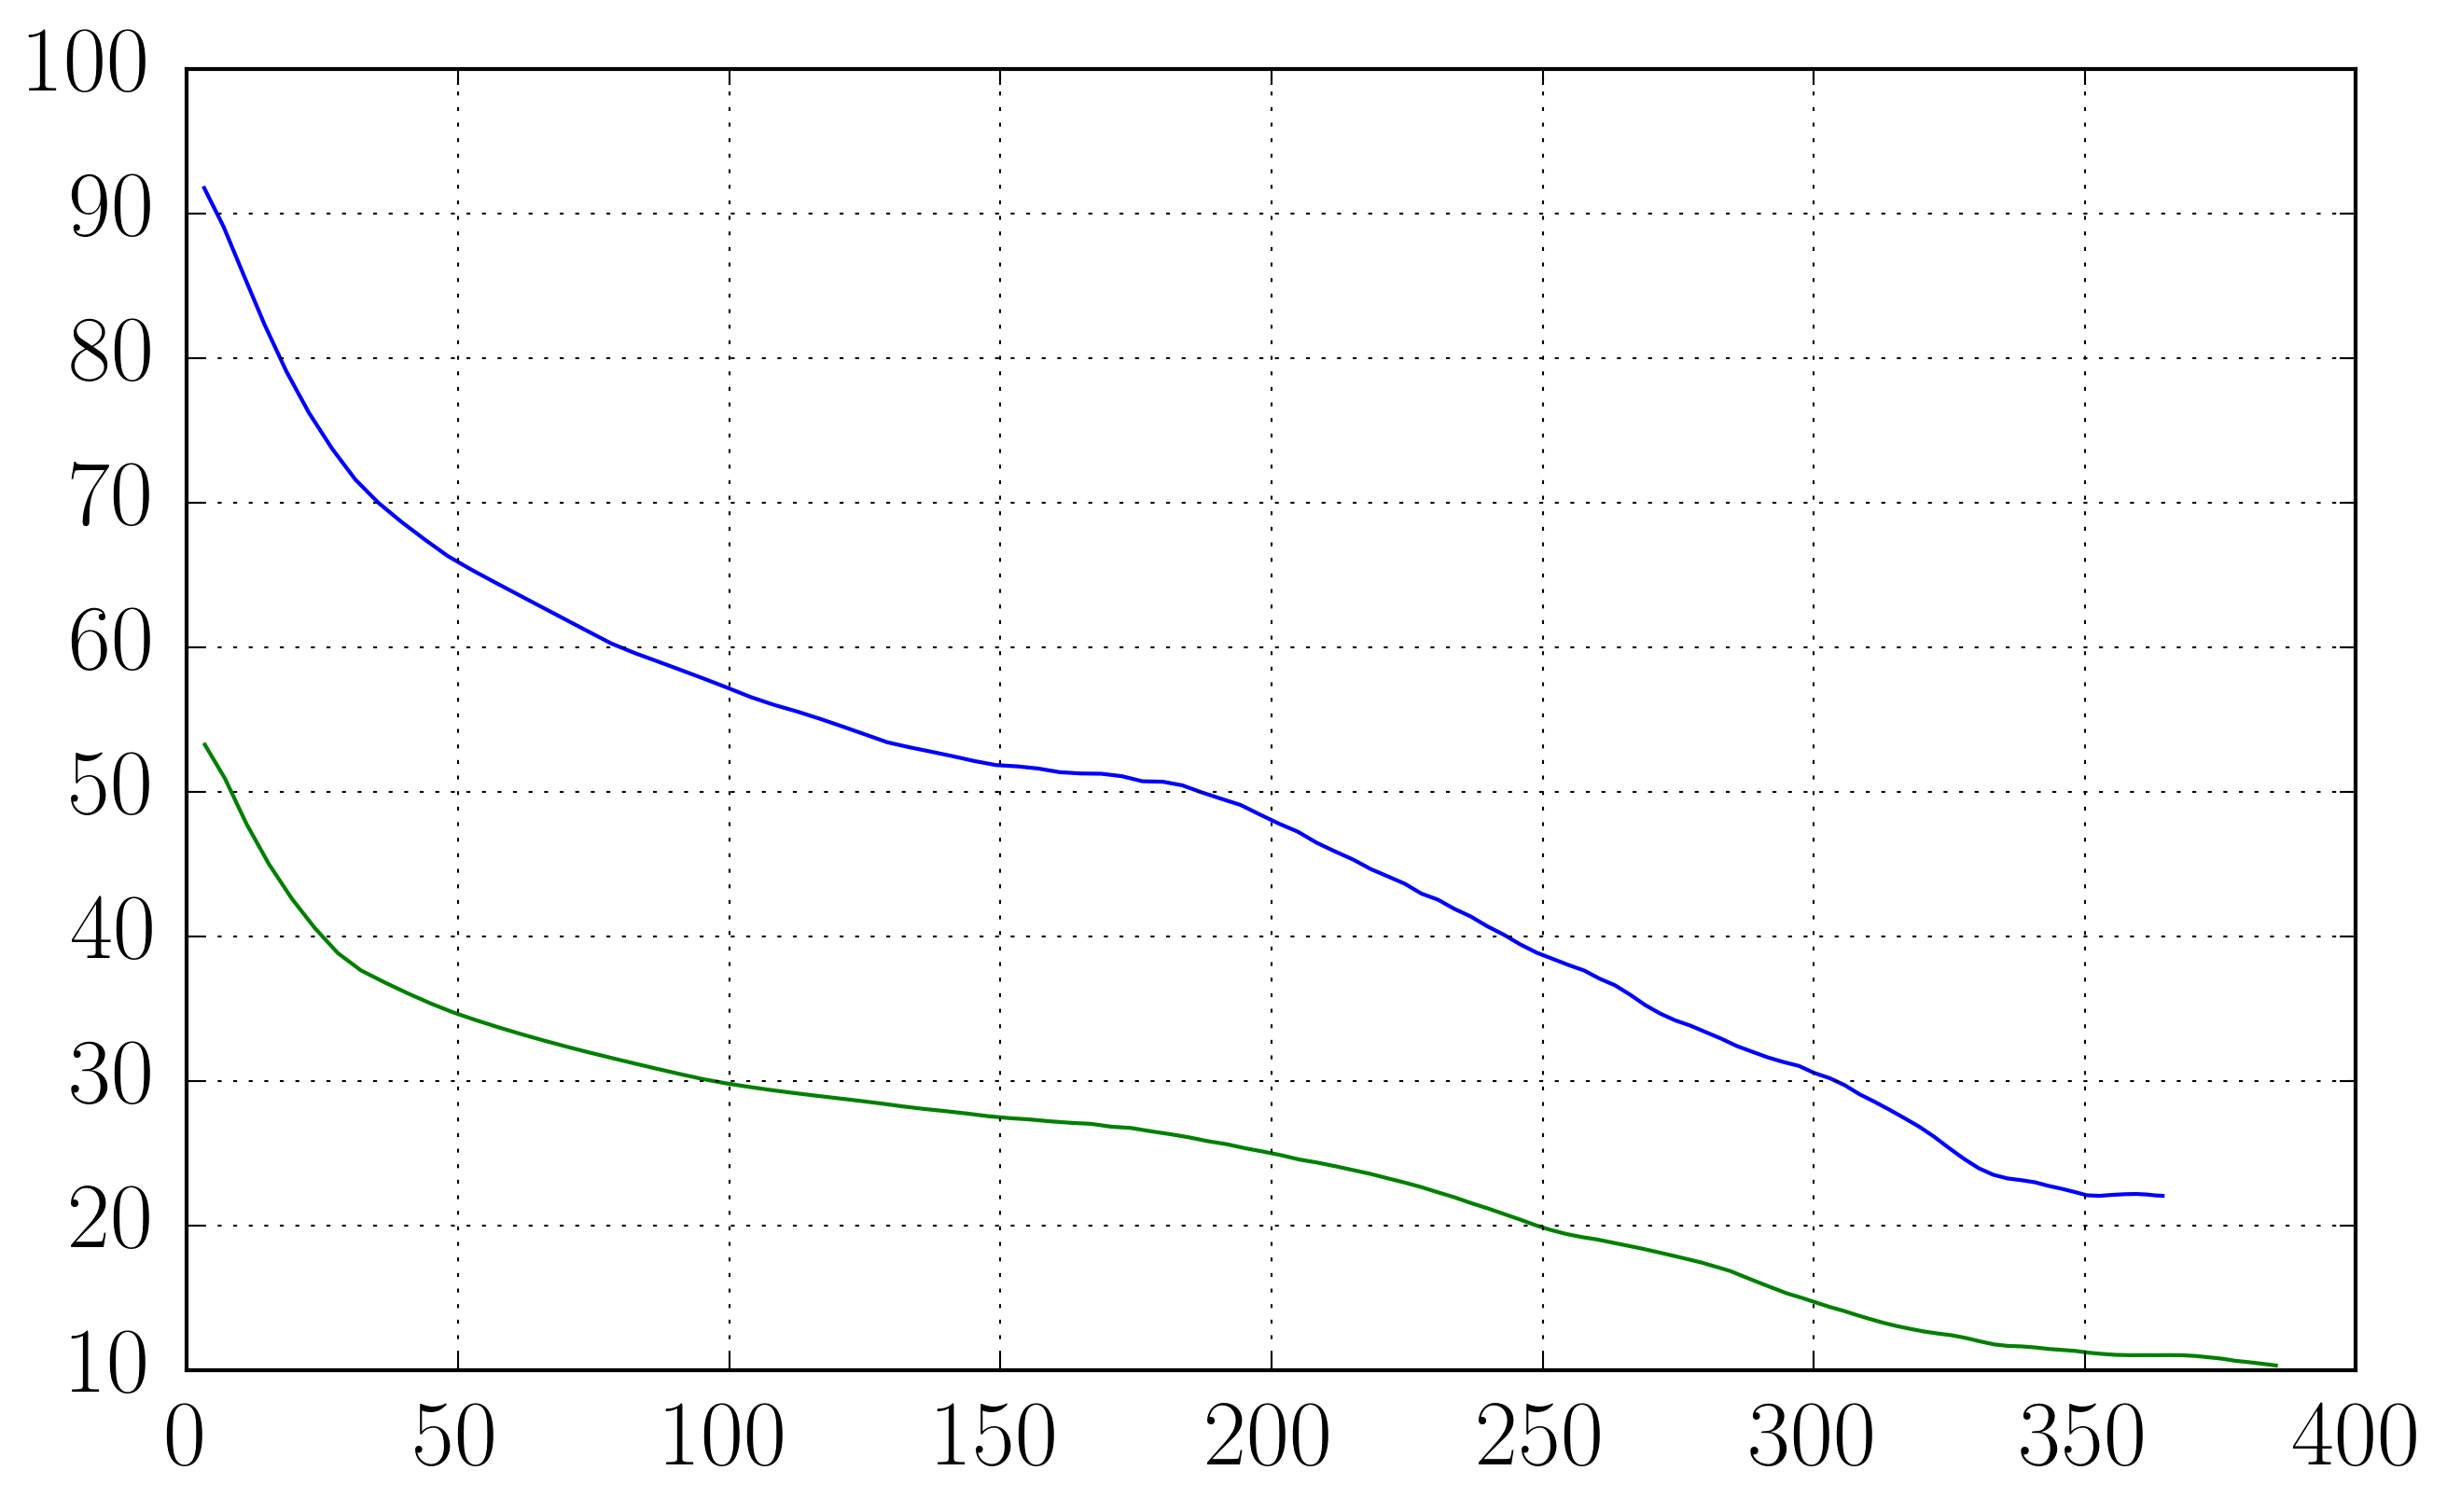

In [166]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
#p_folders = ['/share/drive/toni/VDML/s80/test/05/h5.stats','/share/drive/toni/VDML/s80/test/05/tanhLy250/h5.stats', \
p_folders = ['/share/drive/toni/VDML/s80/test/05/01/h5.stats','/share/drive/toni/VDML/s80/test/06/h5.stats']
#p_folders = ['/share/drive/toni/VDML/s80/test/05/h5.stats']
jj=0
l_job_style=['b-','r*']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        dm= np.array(f['dm'])
        dmpoint= np.array(f['dmpoint'])
        dw= np.array(f['dw'])
        yf = np.array(f['y'])
        rvm = np.array(f['rvm'])
        rum = np.array(f['rum'])
        rhom = np.array(f['rhom'])
        vm = np.array(f['vm'])
        Trms = np.array(f['Trms'])
        epR = np.array(f['epR'])
        EPS = np.array(f['EPS'])
        R11 = np.array(f['R11'])
        R22 = np.array(f['R22'])
        R33 = np.array(f['R33'])
        R12 = np.array(f['R12'])
        w3m = np.array(f['w3m'])
        k = np.array(f['k'])
        Tm = np.array(f['Tm'])
        Relambda = np.array(f['Relambday'])
        dyeta = np.array(f['dyeta'])
        eta  = np.array(f['eta'])
        vcont = np.zeros(len(time))
        tmax = 600.0
        tmin = 470
        #tobs = 47
        #itmax = np.where(time<tmax)[0][-1]
        #itmin = np.where(time<tmin)[0][-1]
        itmax=len(time)-2
        itmin=0
        #itmin5
        for ii in range(itmin,itmax):
            vcont[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii-1],yf))/(time[ii+1]-time[ii-1])+rvm[-1,ii]-rvm[0,ii])/np.max(rvm[:,ii+1])*100
            #plt.plot(yf/dm[ii],k[:,ii],l_job_style[jj])
        print time[itmin],time[itmax] 
        jj = jj +1
        #plt.plot(time,der1(time,dm))
        #plt.plot(time,dmpoint,'--')
        #plt.plot(time,vcont)
        #plt.plot(time,dw/dm)
        plt.plot(time,2*yf[-1]/dw)
        #plt.plot(yf[1:],np.diff(yf))
        #plt.plot(yf,eta[:,-1]/(0.7/rhom[:,-1])**0.5)
        #plt.plot(yf,eta[:,-1])
        #plt.plot(yf,R11[:,-1]*10)
        print "min Dy=%s"%(np.min(np.diff(yf)))
#plt.xlim([-20,50])
#plt.plot(time,dw)
#plt.plot(yf,R12[:,-3:],'.-')
#epRB=epR[:,-1]
#yb = yf
#plt.plot(yf[1:]/dm[-1],np.diff(yf)/dw[-1],'--')
#plt.xlim([-20,50])
print time[-1]
#plt.ylim([0,5])
#plt.xlim([-10,20])
#print np.min(eta[:,-20])
#plt.ylim([0,2])
plt.grid('on')

438.337249756 492.922088623
492.922088623


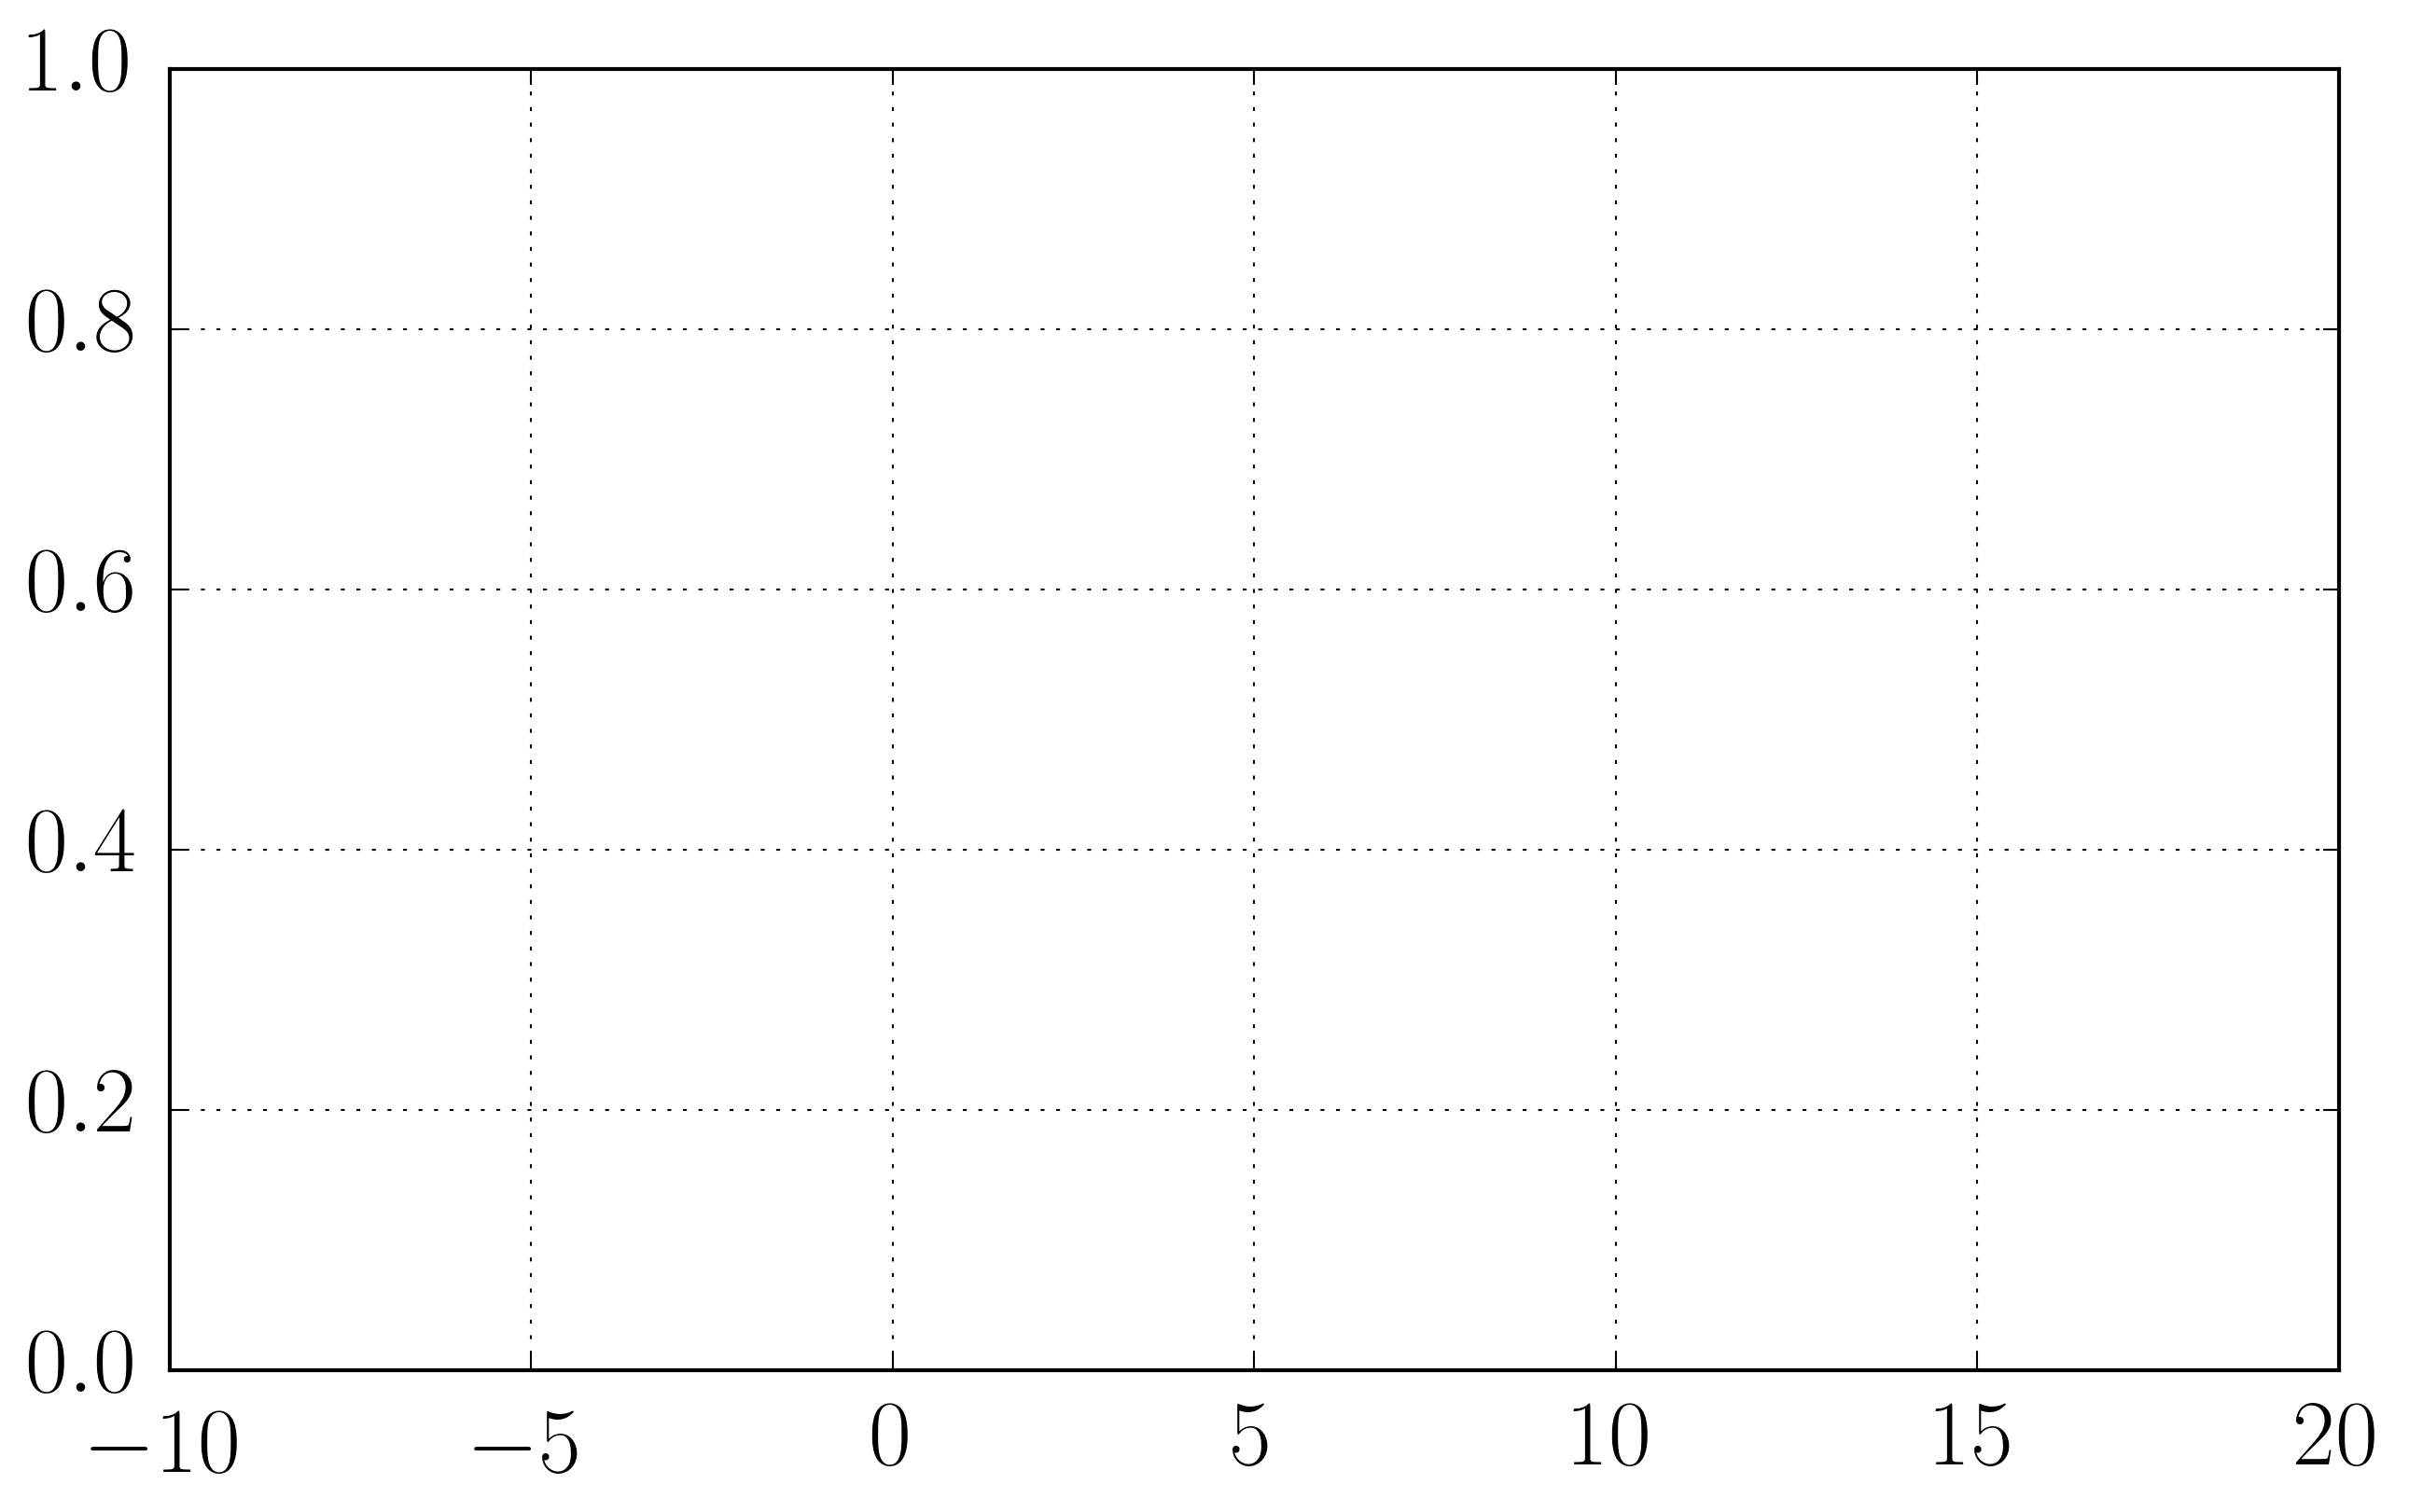

In [98]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
p_folders = ['/share/drive/toni/VDML/s80/test/05/h5.stats','/share/drive/toni/VDML/s80/test/05/tanhLy250/h5.stats']
p_folders = ['/share/drive/toni/VDML/s80/test/05//tanhLy250/h5.stats']
jj=0
l_job_style=['b-','r*']
for path in p_folders:
    with h5py.File(path,"r") as f:
        time=np.array(f['time'])
        dm= np.array(f['dm'])
        dmpoint= np.array(f['dmpoint'])
        dw= np.array(f['dw'])
        yf = np.array(f['y'])
        rvm = np.array(f['rvm'])
        rum = np.array(f['rum'])
        rhom = np.array(f['rhom'])
        vm = np.array(f['vm'])
        Trms = np.array(f['Trms'])
        epR = np.array(f['epR'])
        EPS = np.array(f['EPS'])
        R11 = np.array(f['R11'])
        R22 = np.array(f['R22'])
        R33 = np.array(f['R33'])
        R12 = np.array(f['R12'])
        w3m = np.array(f['w3m'])
        k = np.array(f['k'])
        Tm = np.array(f['Tm'])
        Relambda = np.array(f['Relambday'])
        dyeta = np.array(f['dyeta'])
        eta  = np.array(f['eta'])
        vcont = np.zeros(len(time))
        tmax = 33
        tmin = 4
        #tobs = 47
        #itmax = np.where(time<tmax)[0][-1]
        #itmin = np.where(time<tmin)[0][-1]
        itmax=-1
        itmin=0
        #itmin5
        for ii in range(itmin,itmax):
            vcont[ii] = ((np.trapz(rhom[:,ii+1],yf)-np.trapz(rhom[:,ii-1],yf))/(time[ii+1]-time[ii-1])+rvm[-1,ii]-rvm[0,ii])/np.max(rvm[:,ii+1])*100
            plt.plot(yf/dm[ii],dm[ii]*epR[:,ii],l_job_style[jj])
        print time[itmin],time[itmax] 
        jj = jj +1
#plt.plot(time,dw)
#plt.plot(yf,R12[:,-3:],'.-')
#epRB=epR[:,-1]
#yb = yf
#plt.plot(yf[1:]/dm[-1],np.diff(yf)/dw[-1],'--')
#plt.xlim([-20,50])
print time[-1]
plt.xlim([-10,20])
#print np.min(eta[:,-20])
#plt.ylim([0,2])
plt.grid('on')

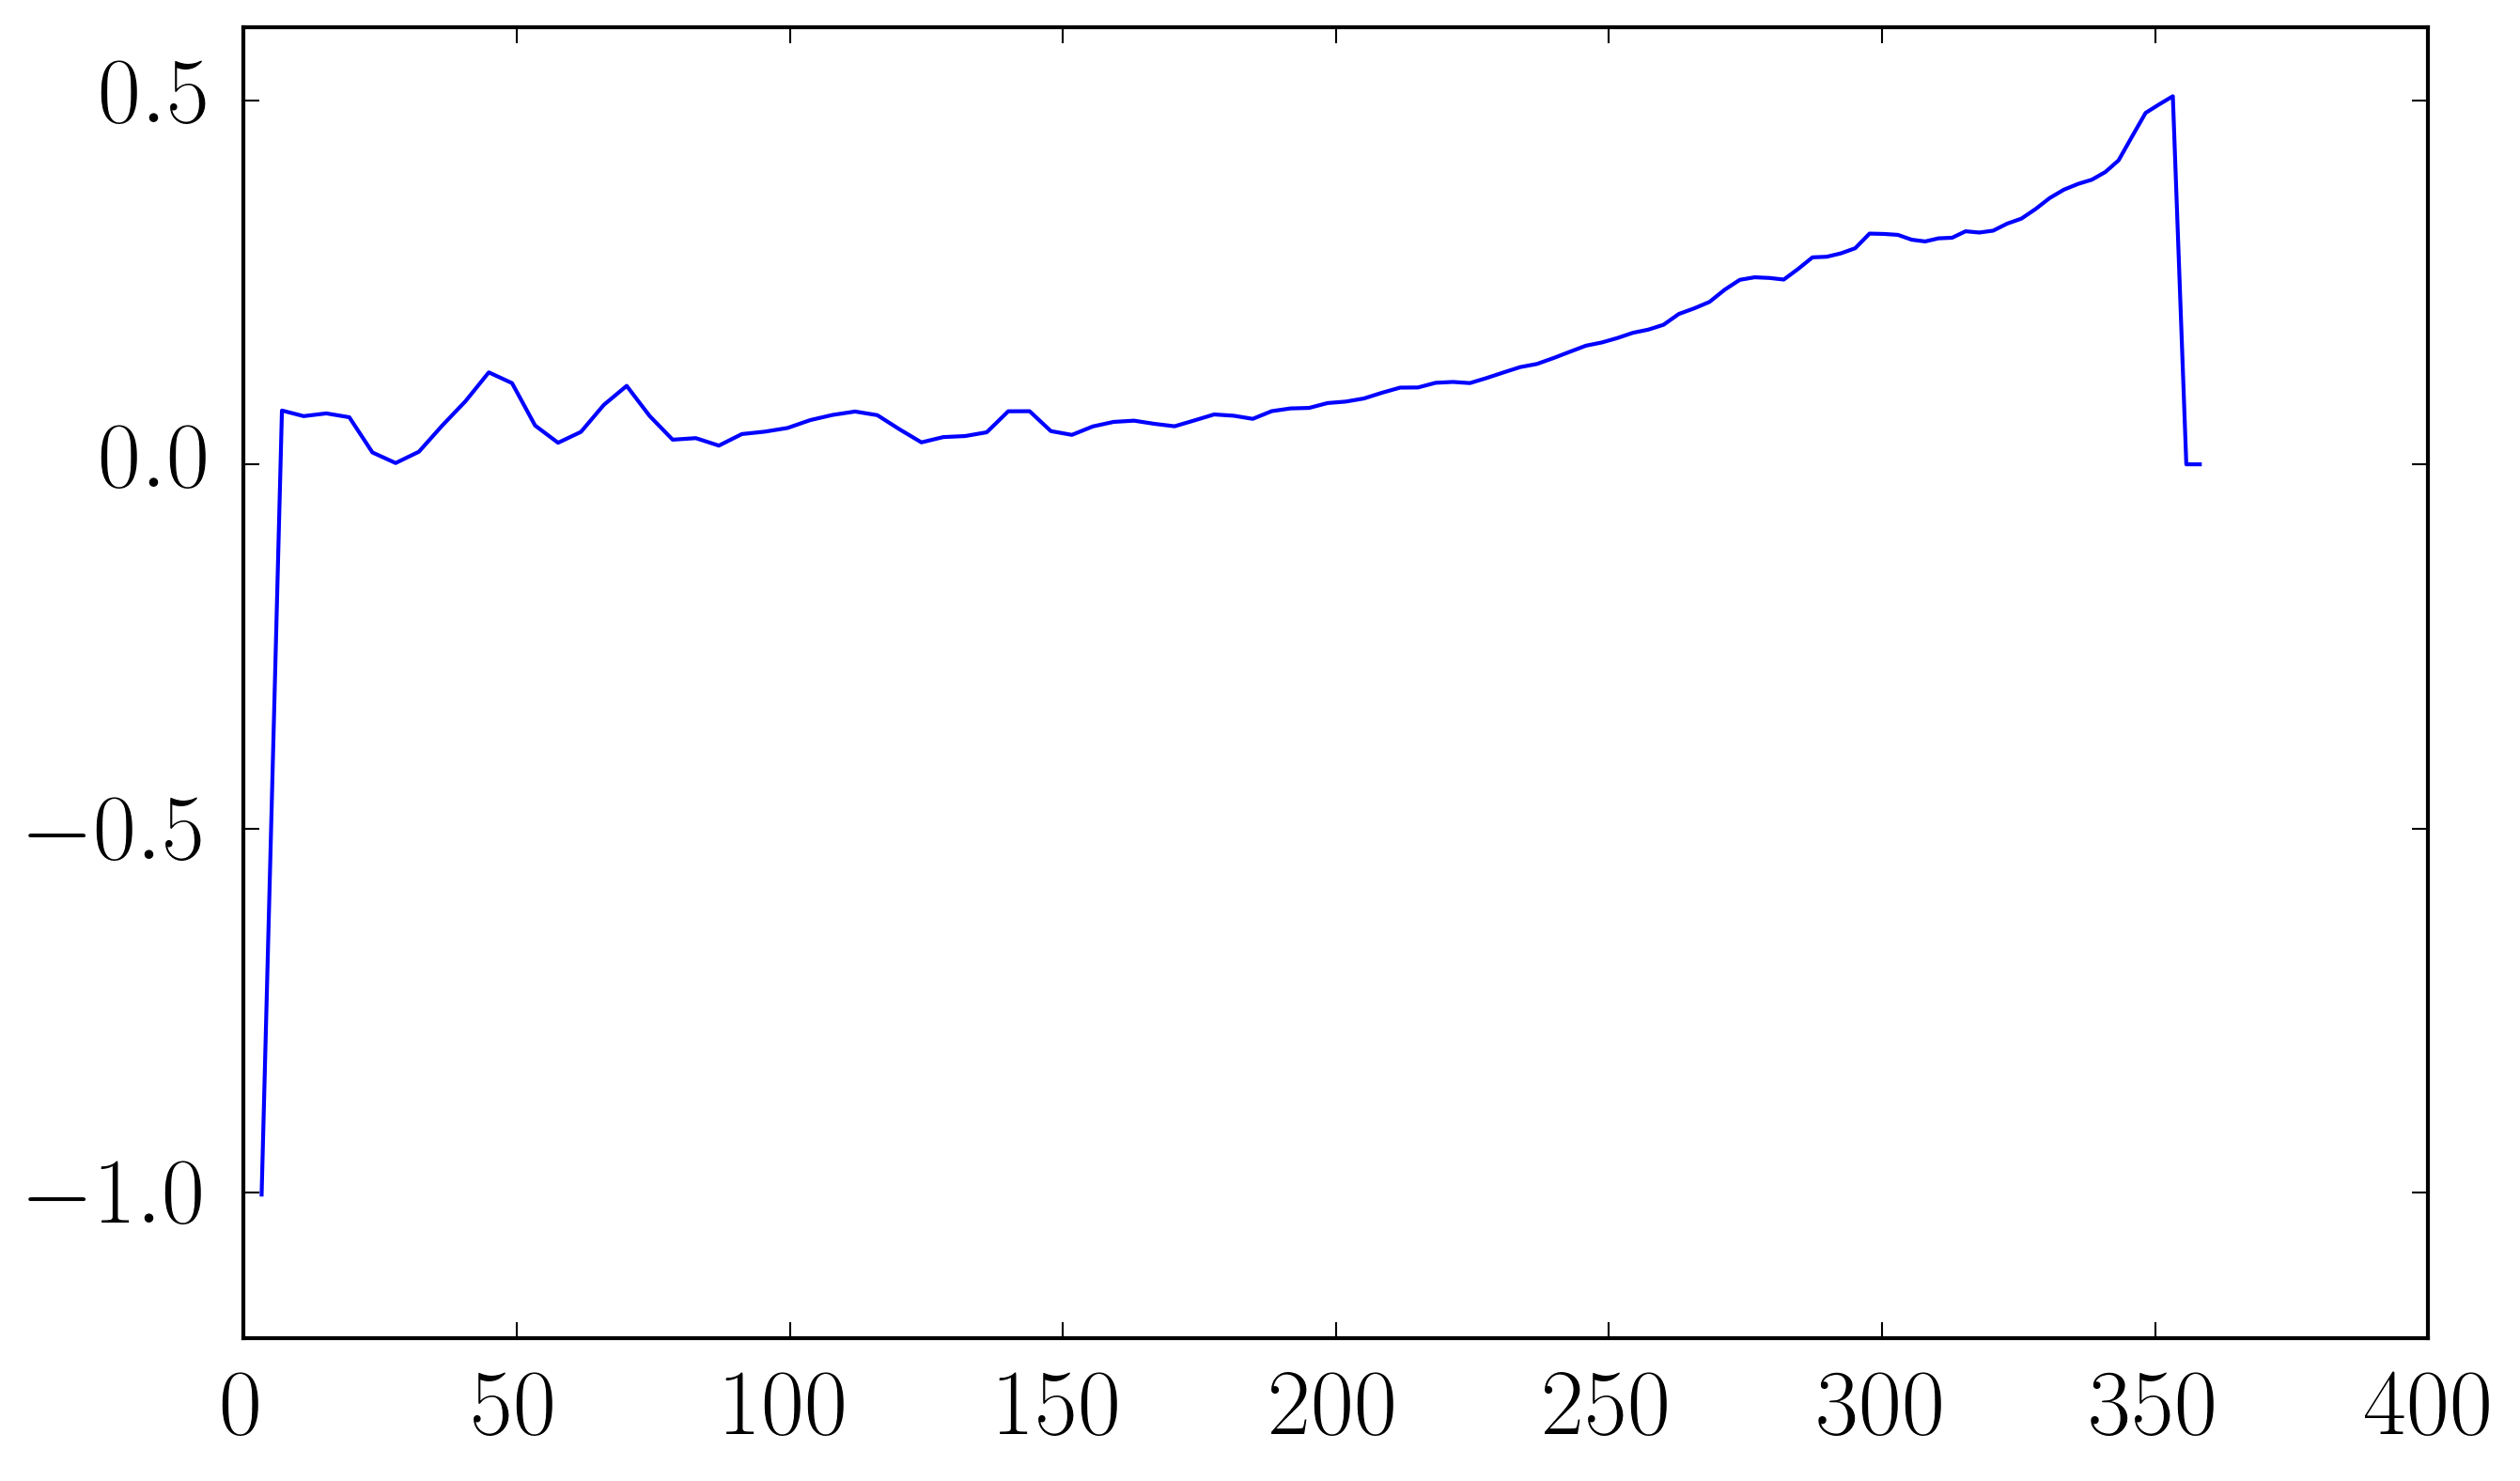

In [133]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
plt.plot(time,vcont)

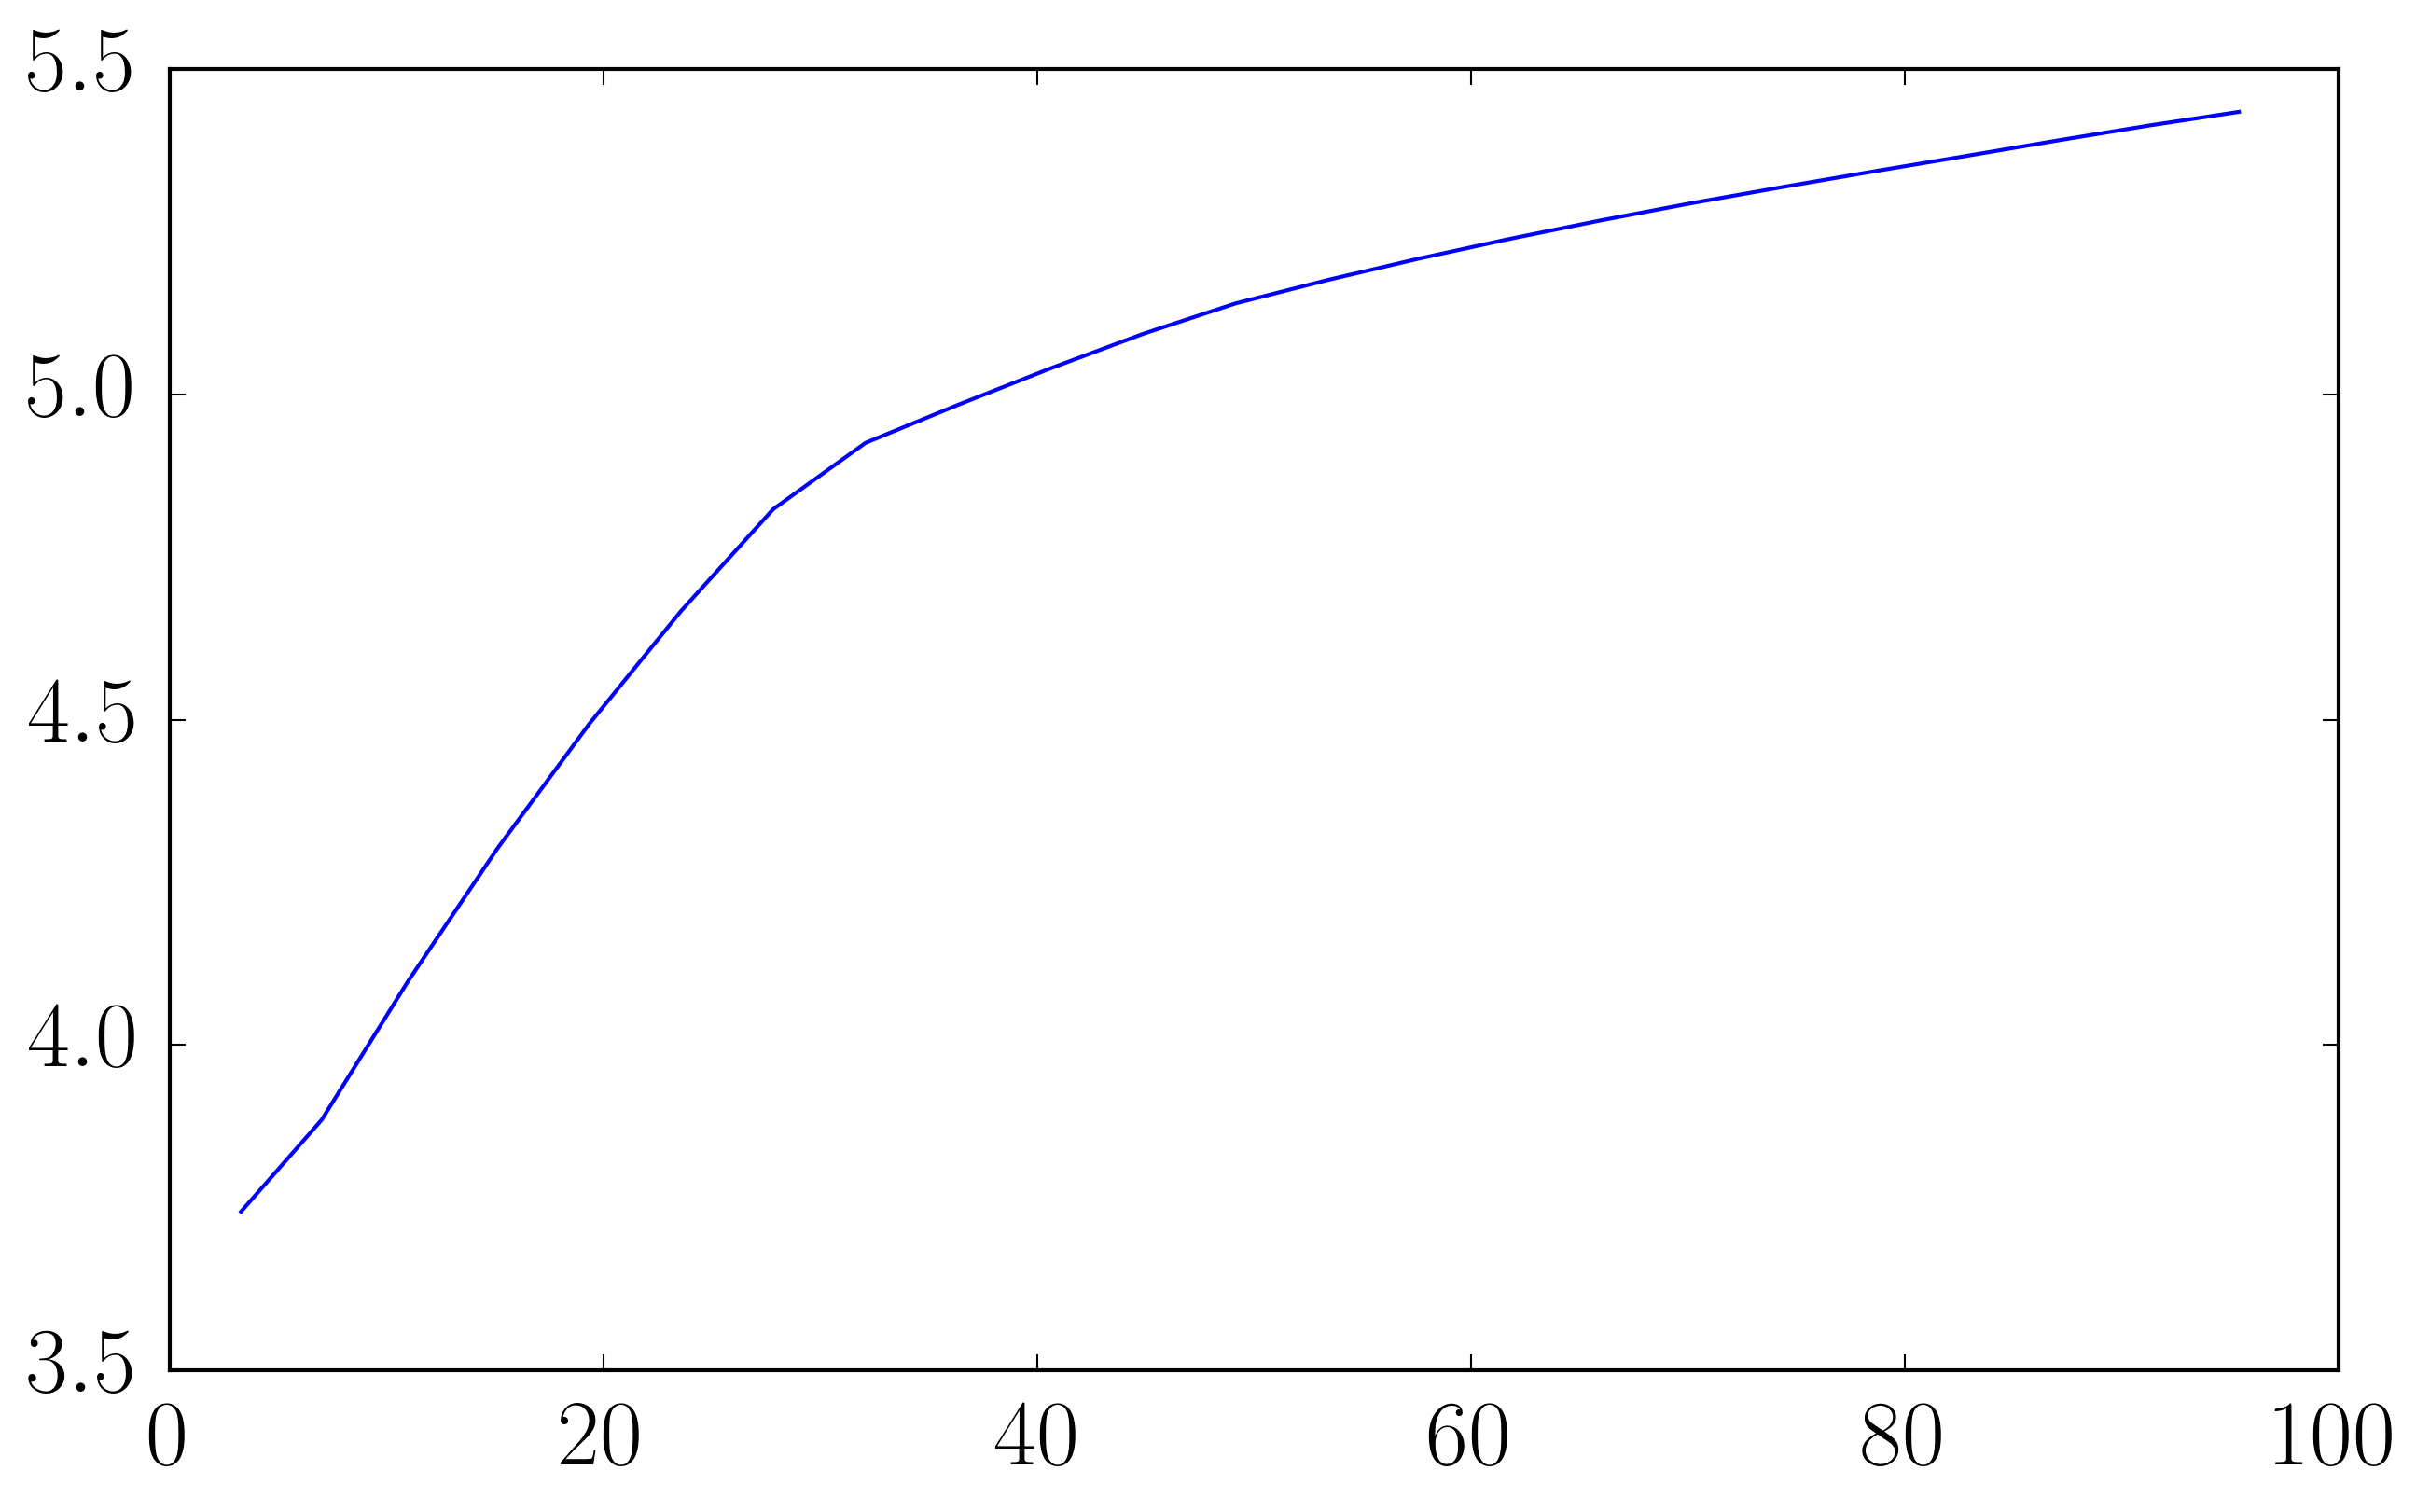

In [128]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
plt.plot(time,dw/dm)

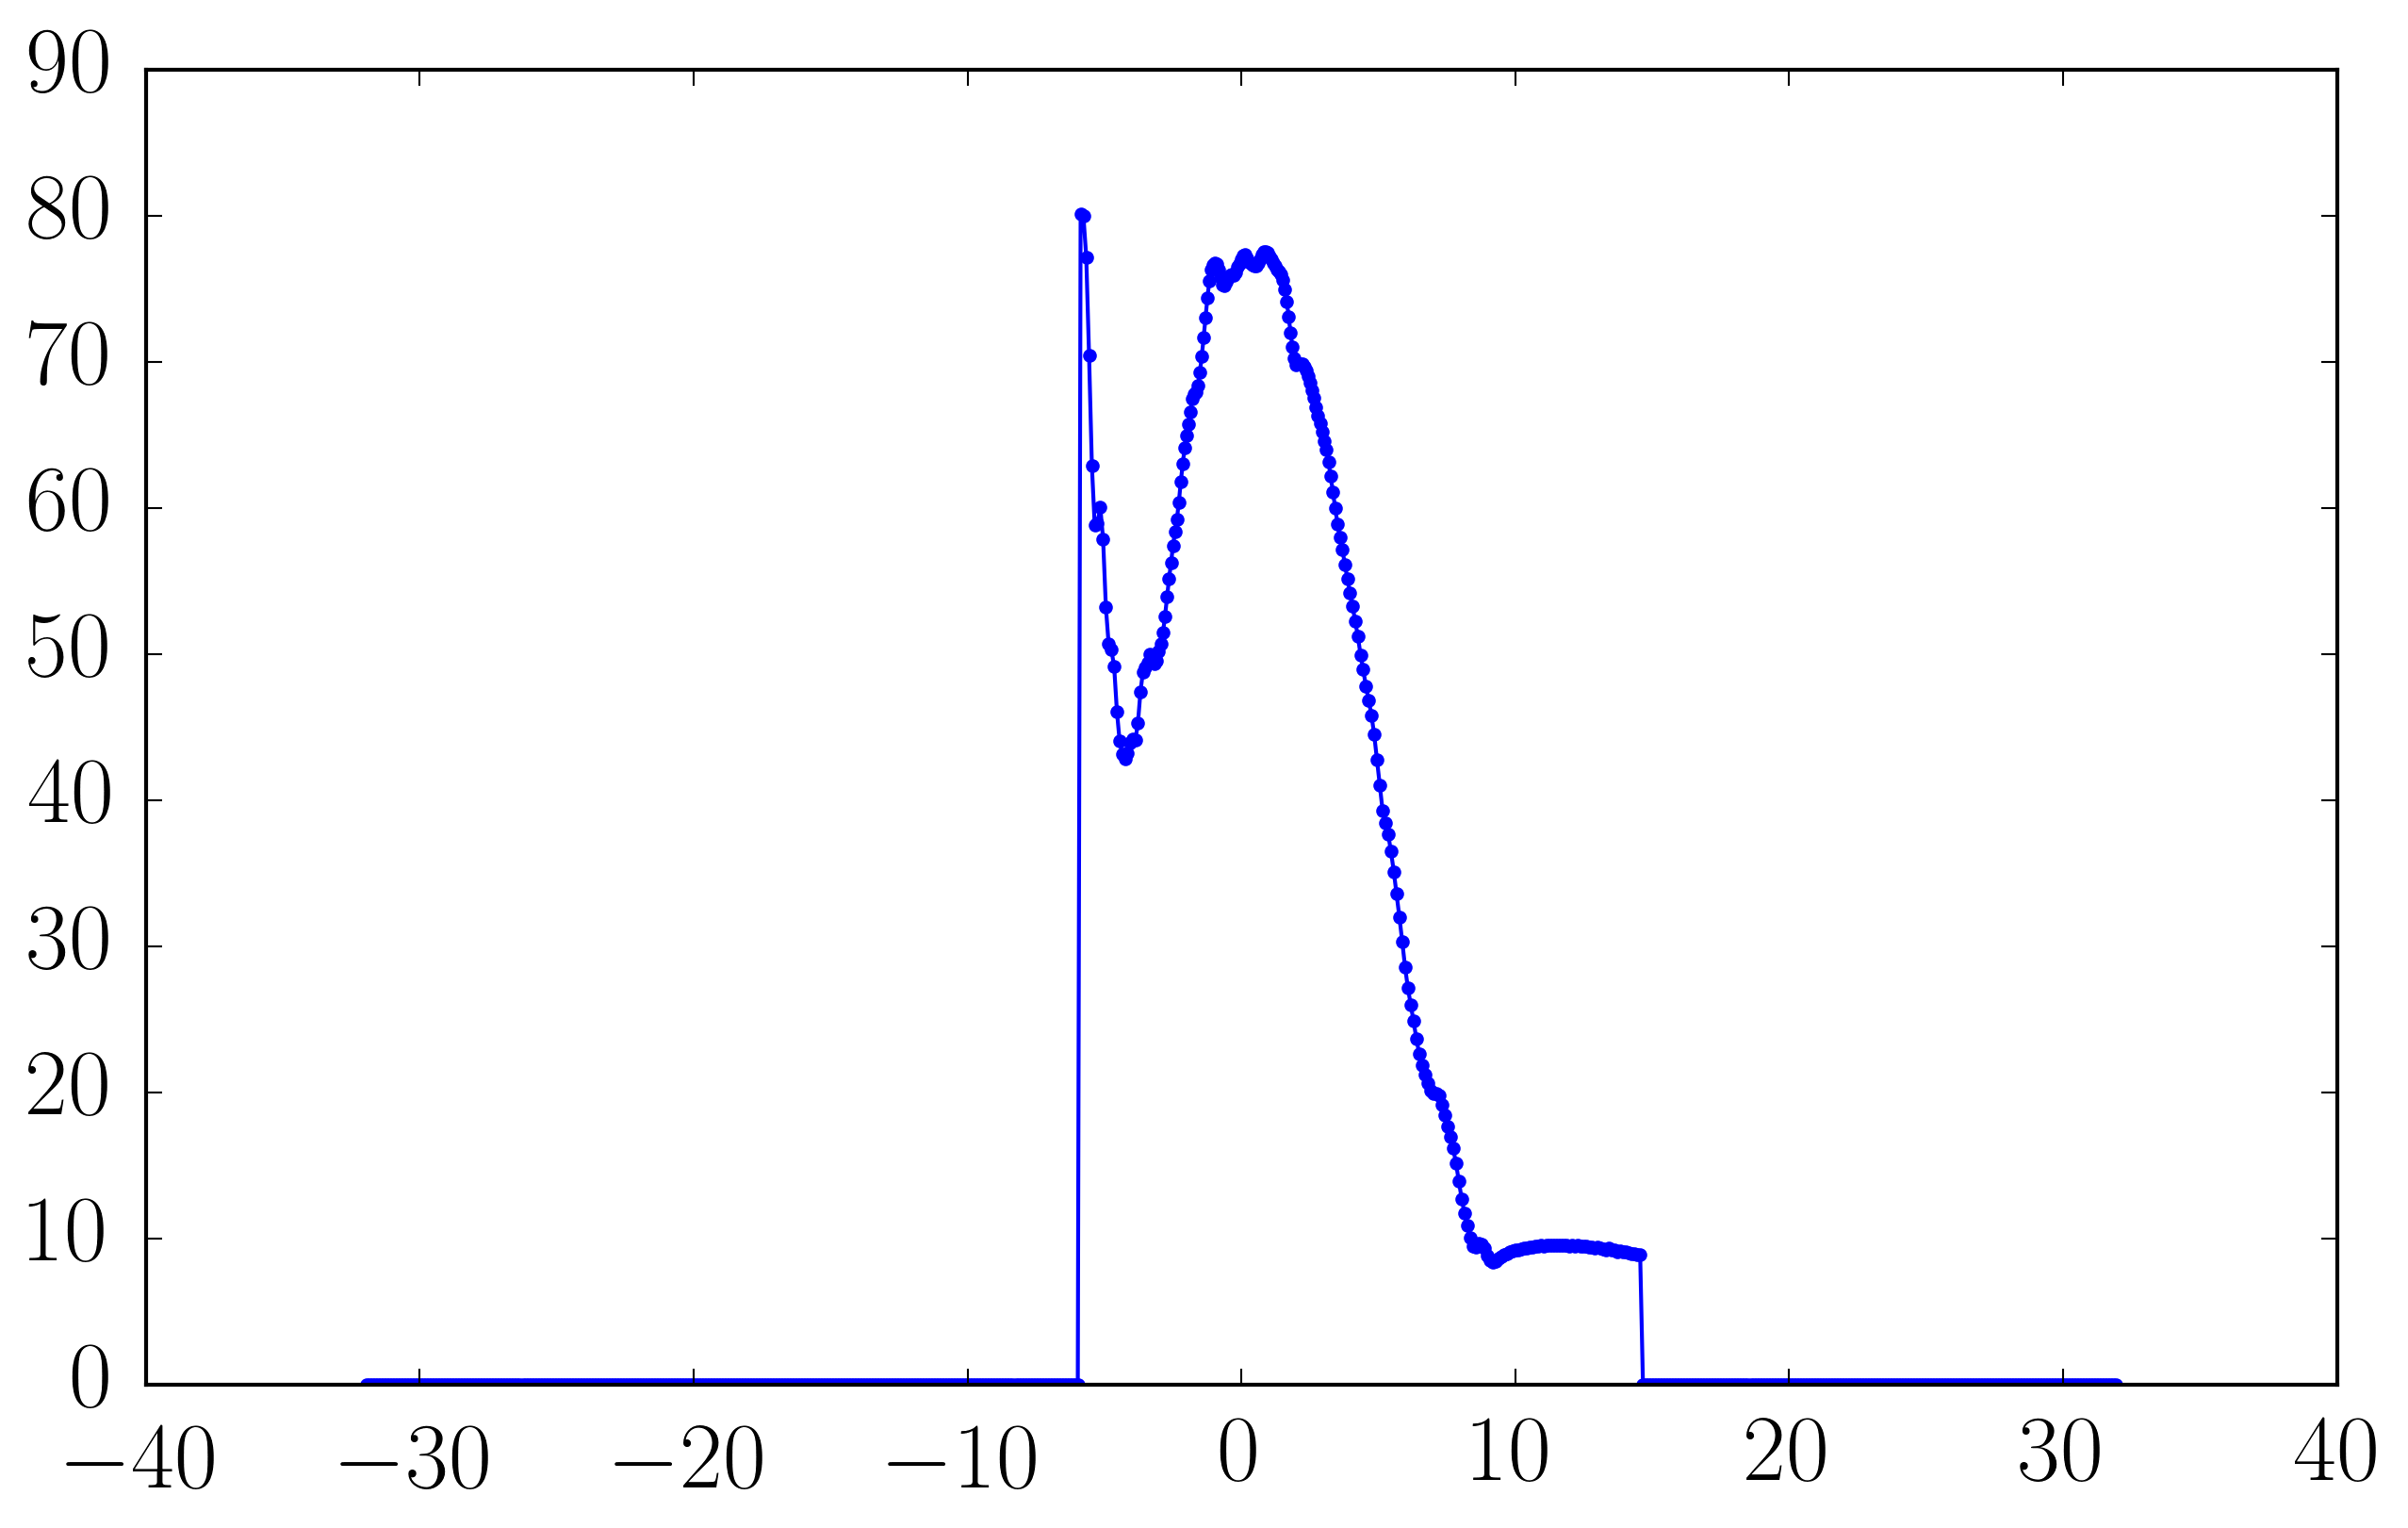

In [19]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
path = '/share/drive/toni/VDML/s80/test/05/01/h5.stats'
path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
path = '/share/drive/toni/VDML/s80/test/05/h5.stats'
path = '/share/drive/toni/VDML/s80/test/05/tanhLy250/h5.stats'
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dmpoint= np.array(f['dmpoint'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    rhom = np.array(f['rhom'])
    vm = np.array(f['vm'])
    Trms = np.array(f['Trms'])
    epR = np.array(f['epR'])
    EPS = np.array(f['EPS'])
    Relambda = np.array(f['Relambday'])
    dyeta = np.array(f['dyeta'])
    eta  = np.array(f['eta'])
    R12 = np.array(f['R12'])
    R11 = np.array(f['R11'])
#plt.plot(time,dw)
kk=-1
plt.plot(yf/dm[kk],Relambda[:,kk],'.-')
#plt.plot(yb,epRB,'.')
#print time[kk]
#plt.plot(time,EPS)
#plt.plot(yf[1:],np.diff(yf),'--')
#plt.xlim([-20,50])
#print np.min(eta[:,-20])
#plt.ylim([0,2])

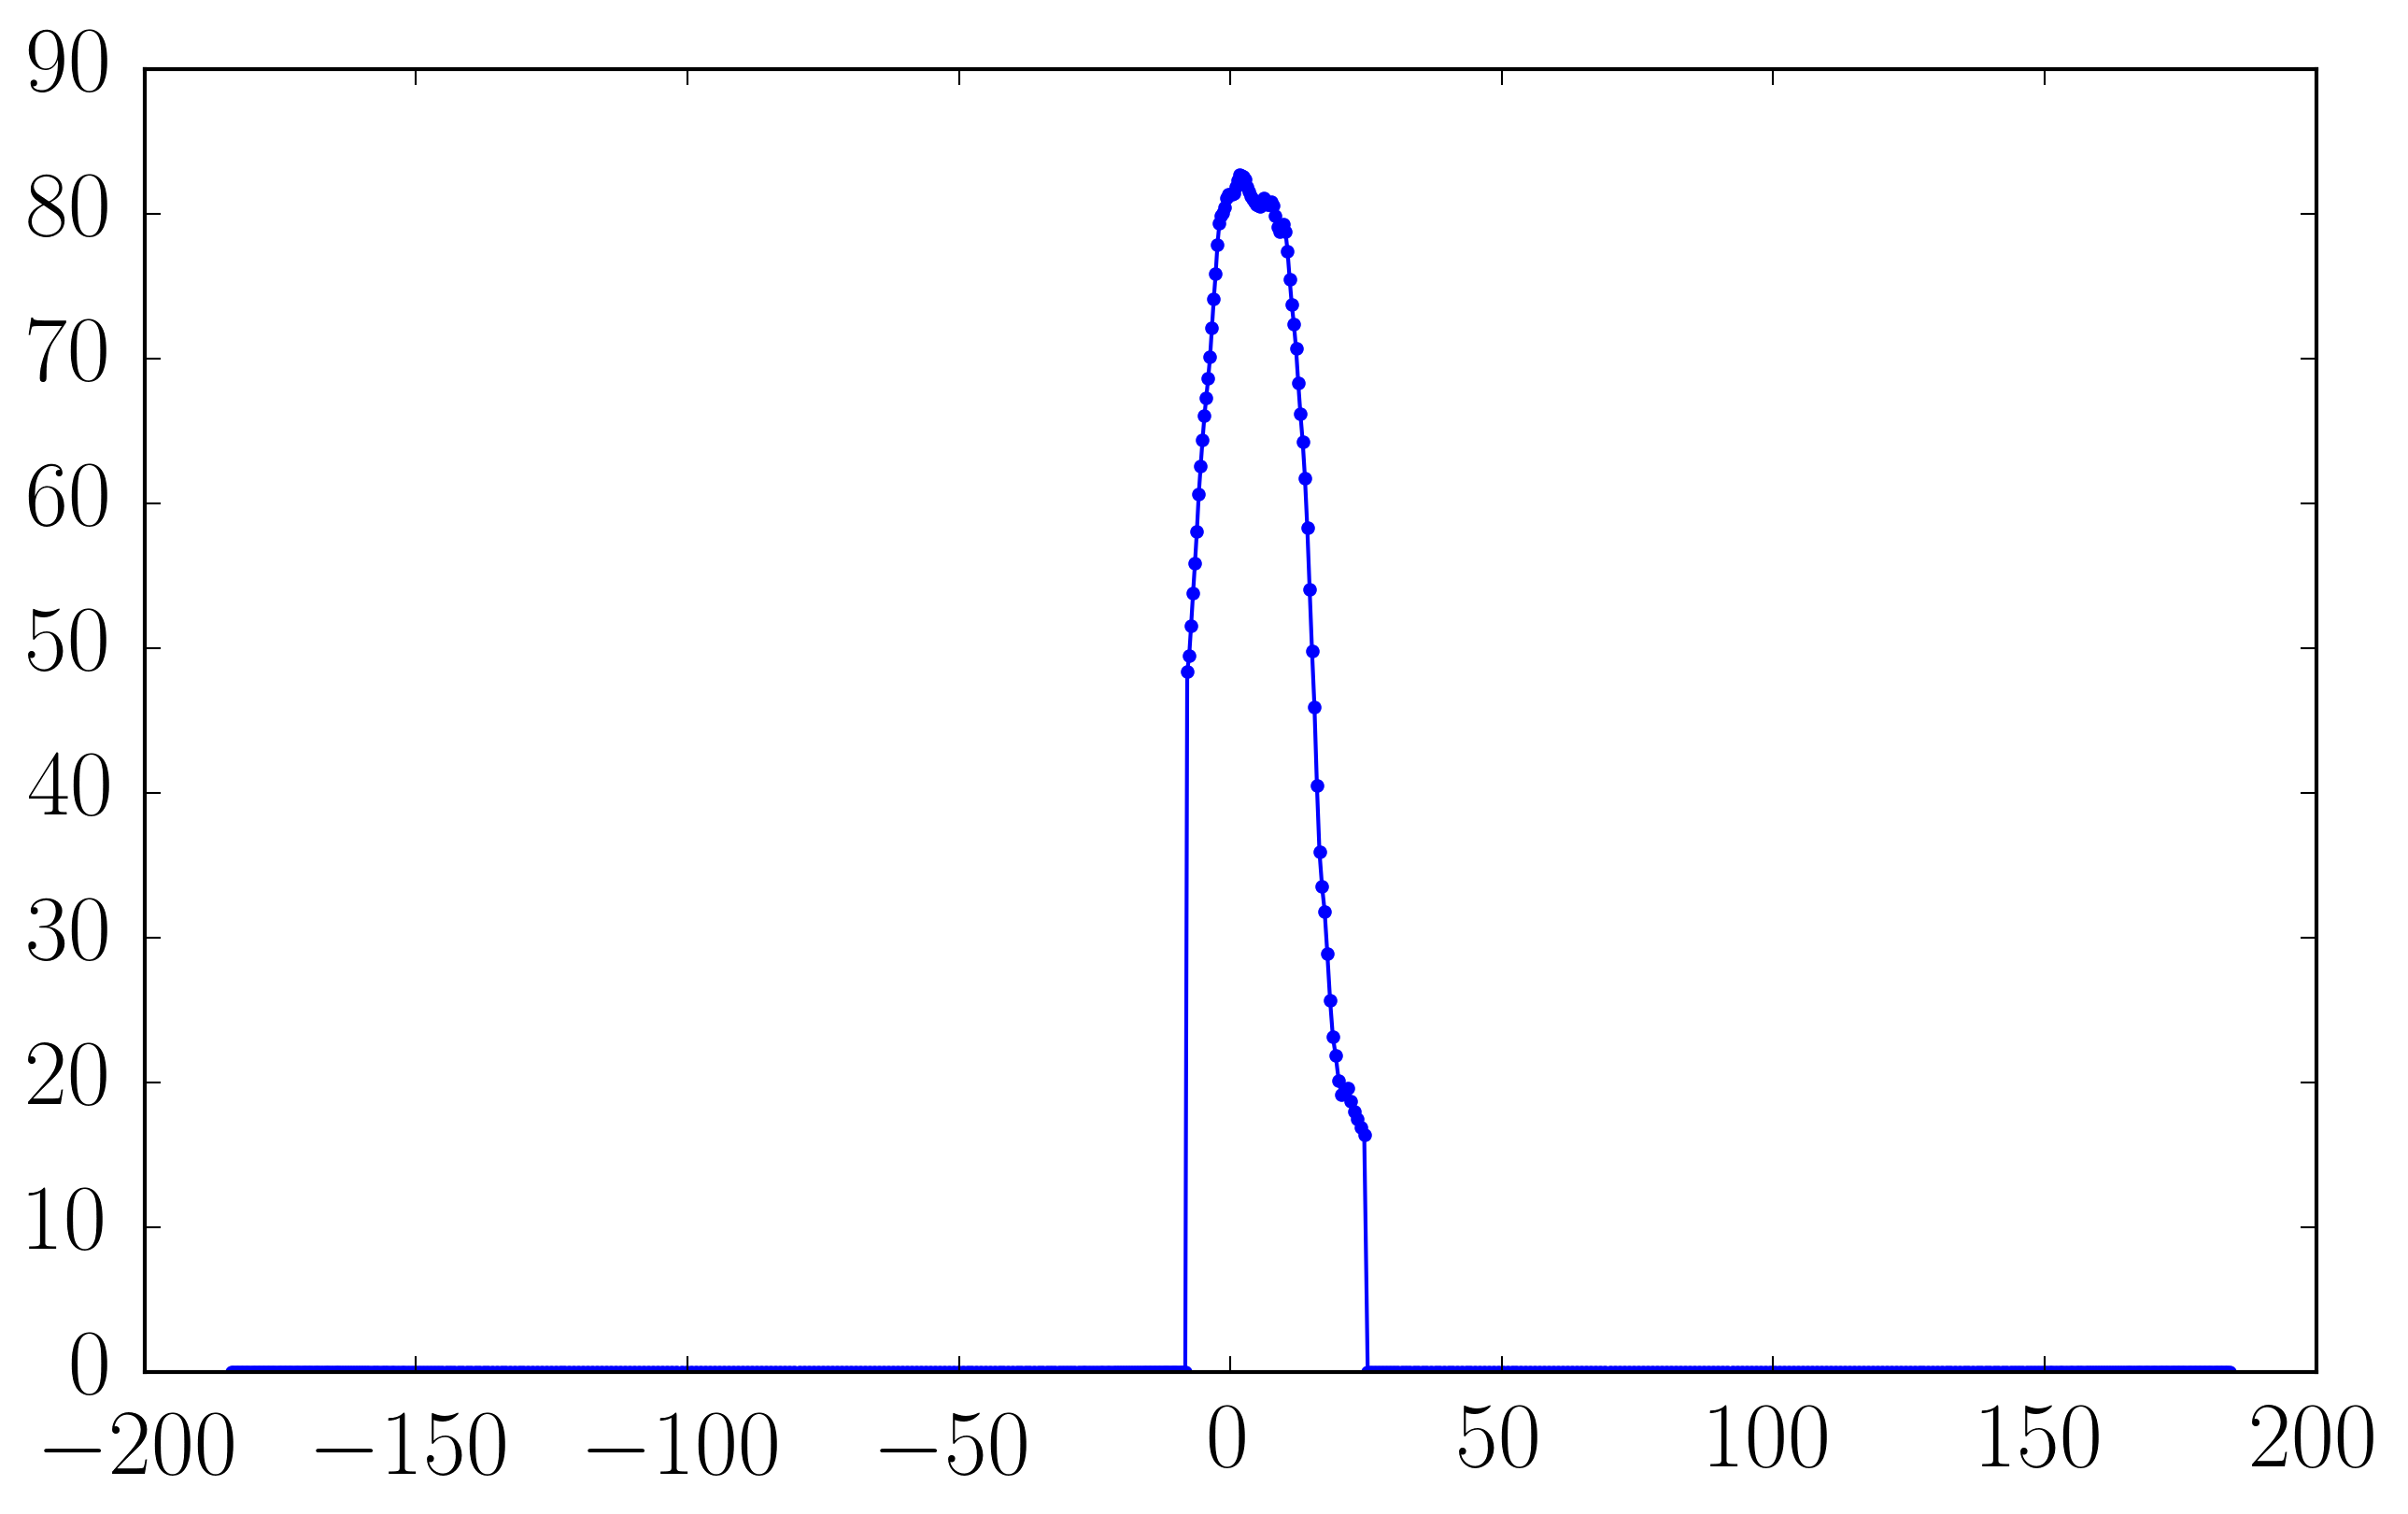

In [120]:
fig = plt.figure(figsize=(xlen,ylen)) #Define figure with size
ax=fig.add_subplot(1,1,1)
path = '/share/drive/toni/VDML/s80/test/05/01/h5.stats'
path = '/share/drive/toni/Re160s80/case1/y2/h5.stats'
path = '/share/drive/toni/VDML/s80/test/05/01/h5.stats'
#path = '/share/drive/toni/VDML/s80/test/05/tanhLy250/h5.stats'
with h5py.File(path,"r") as f:
    time=np.array(f['time'])
    dm= np.array(f['dm'])
    dmpoint= np.array(f['dmpoint'])
    dw= np.array(f['dw'])
    yf = np.array(f['y'])
    rvm = np.array(f['rvm'])
    rhom = np.array(f['rhom'])
    vm = np.array(f['vm'])
    Trms = np.array(f['Trms'])
    epR = np.array(f['epR'])
    EPS = np.array(f['EPS'])
    Relambda = np.array(f['Relambday'])
    dyeta = np.array(f['dyeta'])
    eta  = np.array(f['eta'])
    R12 = np.array(f['R12'])
    R11 = np.array(f['R11'])
#plt.plot(time,dw)
kk=-6
plt.plot(yf,Relambda[:,kk],'.-')
#plt.plot(yb,epRB,'.')
#print time[kk]
#plt.plot(time,EPS)
#plt.plot(yf[1:],np.diff(yf),'--')
#plt.xlim([-20,50])
#print np.min(eta[:,-20])
#plt.ylim([0,2])

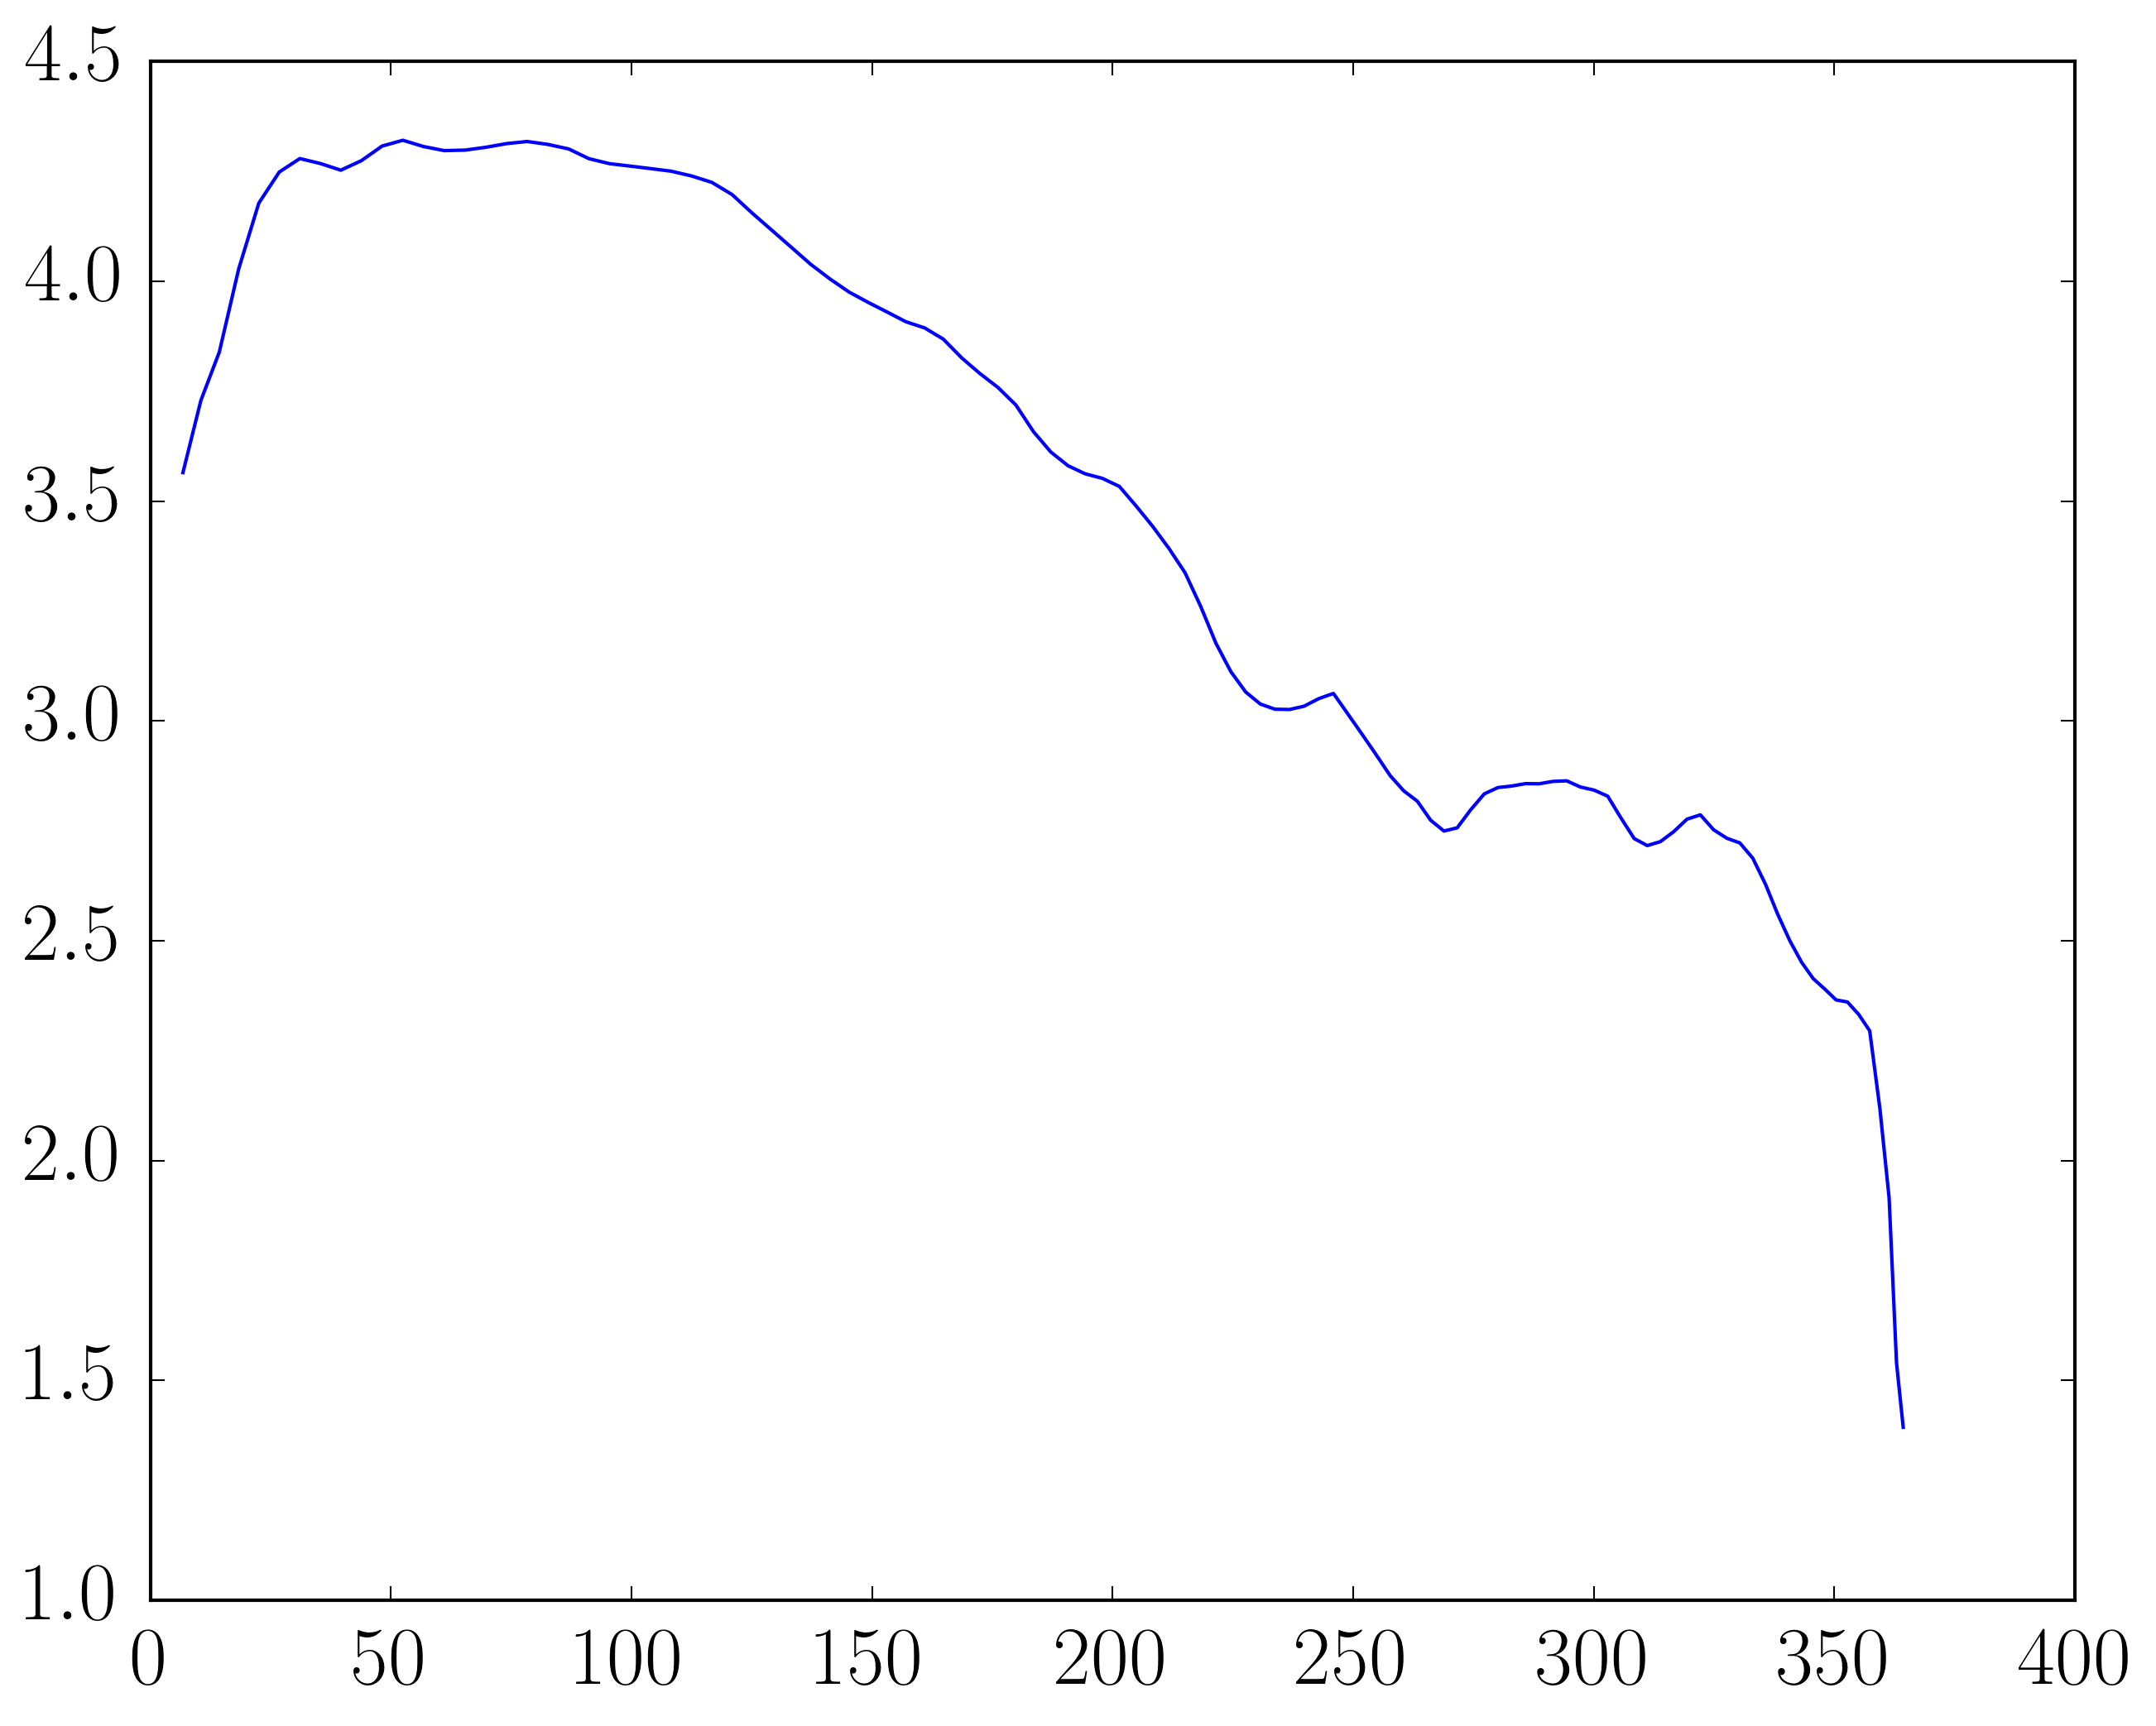

In [121]:
EPSold = EPS;
yfold = yf;
timeold=time;
plt.plot(time[1:],np.diff(time))

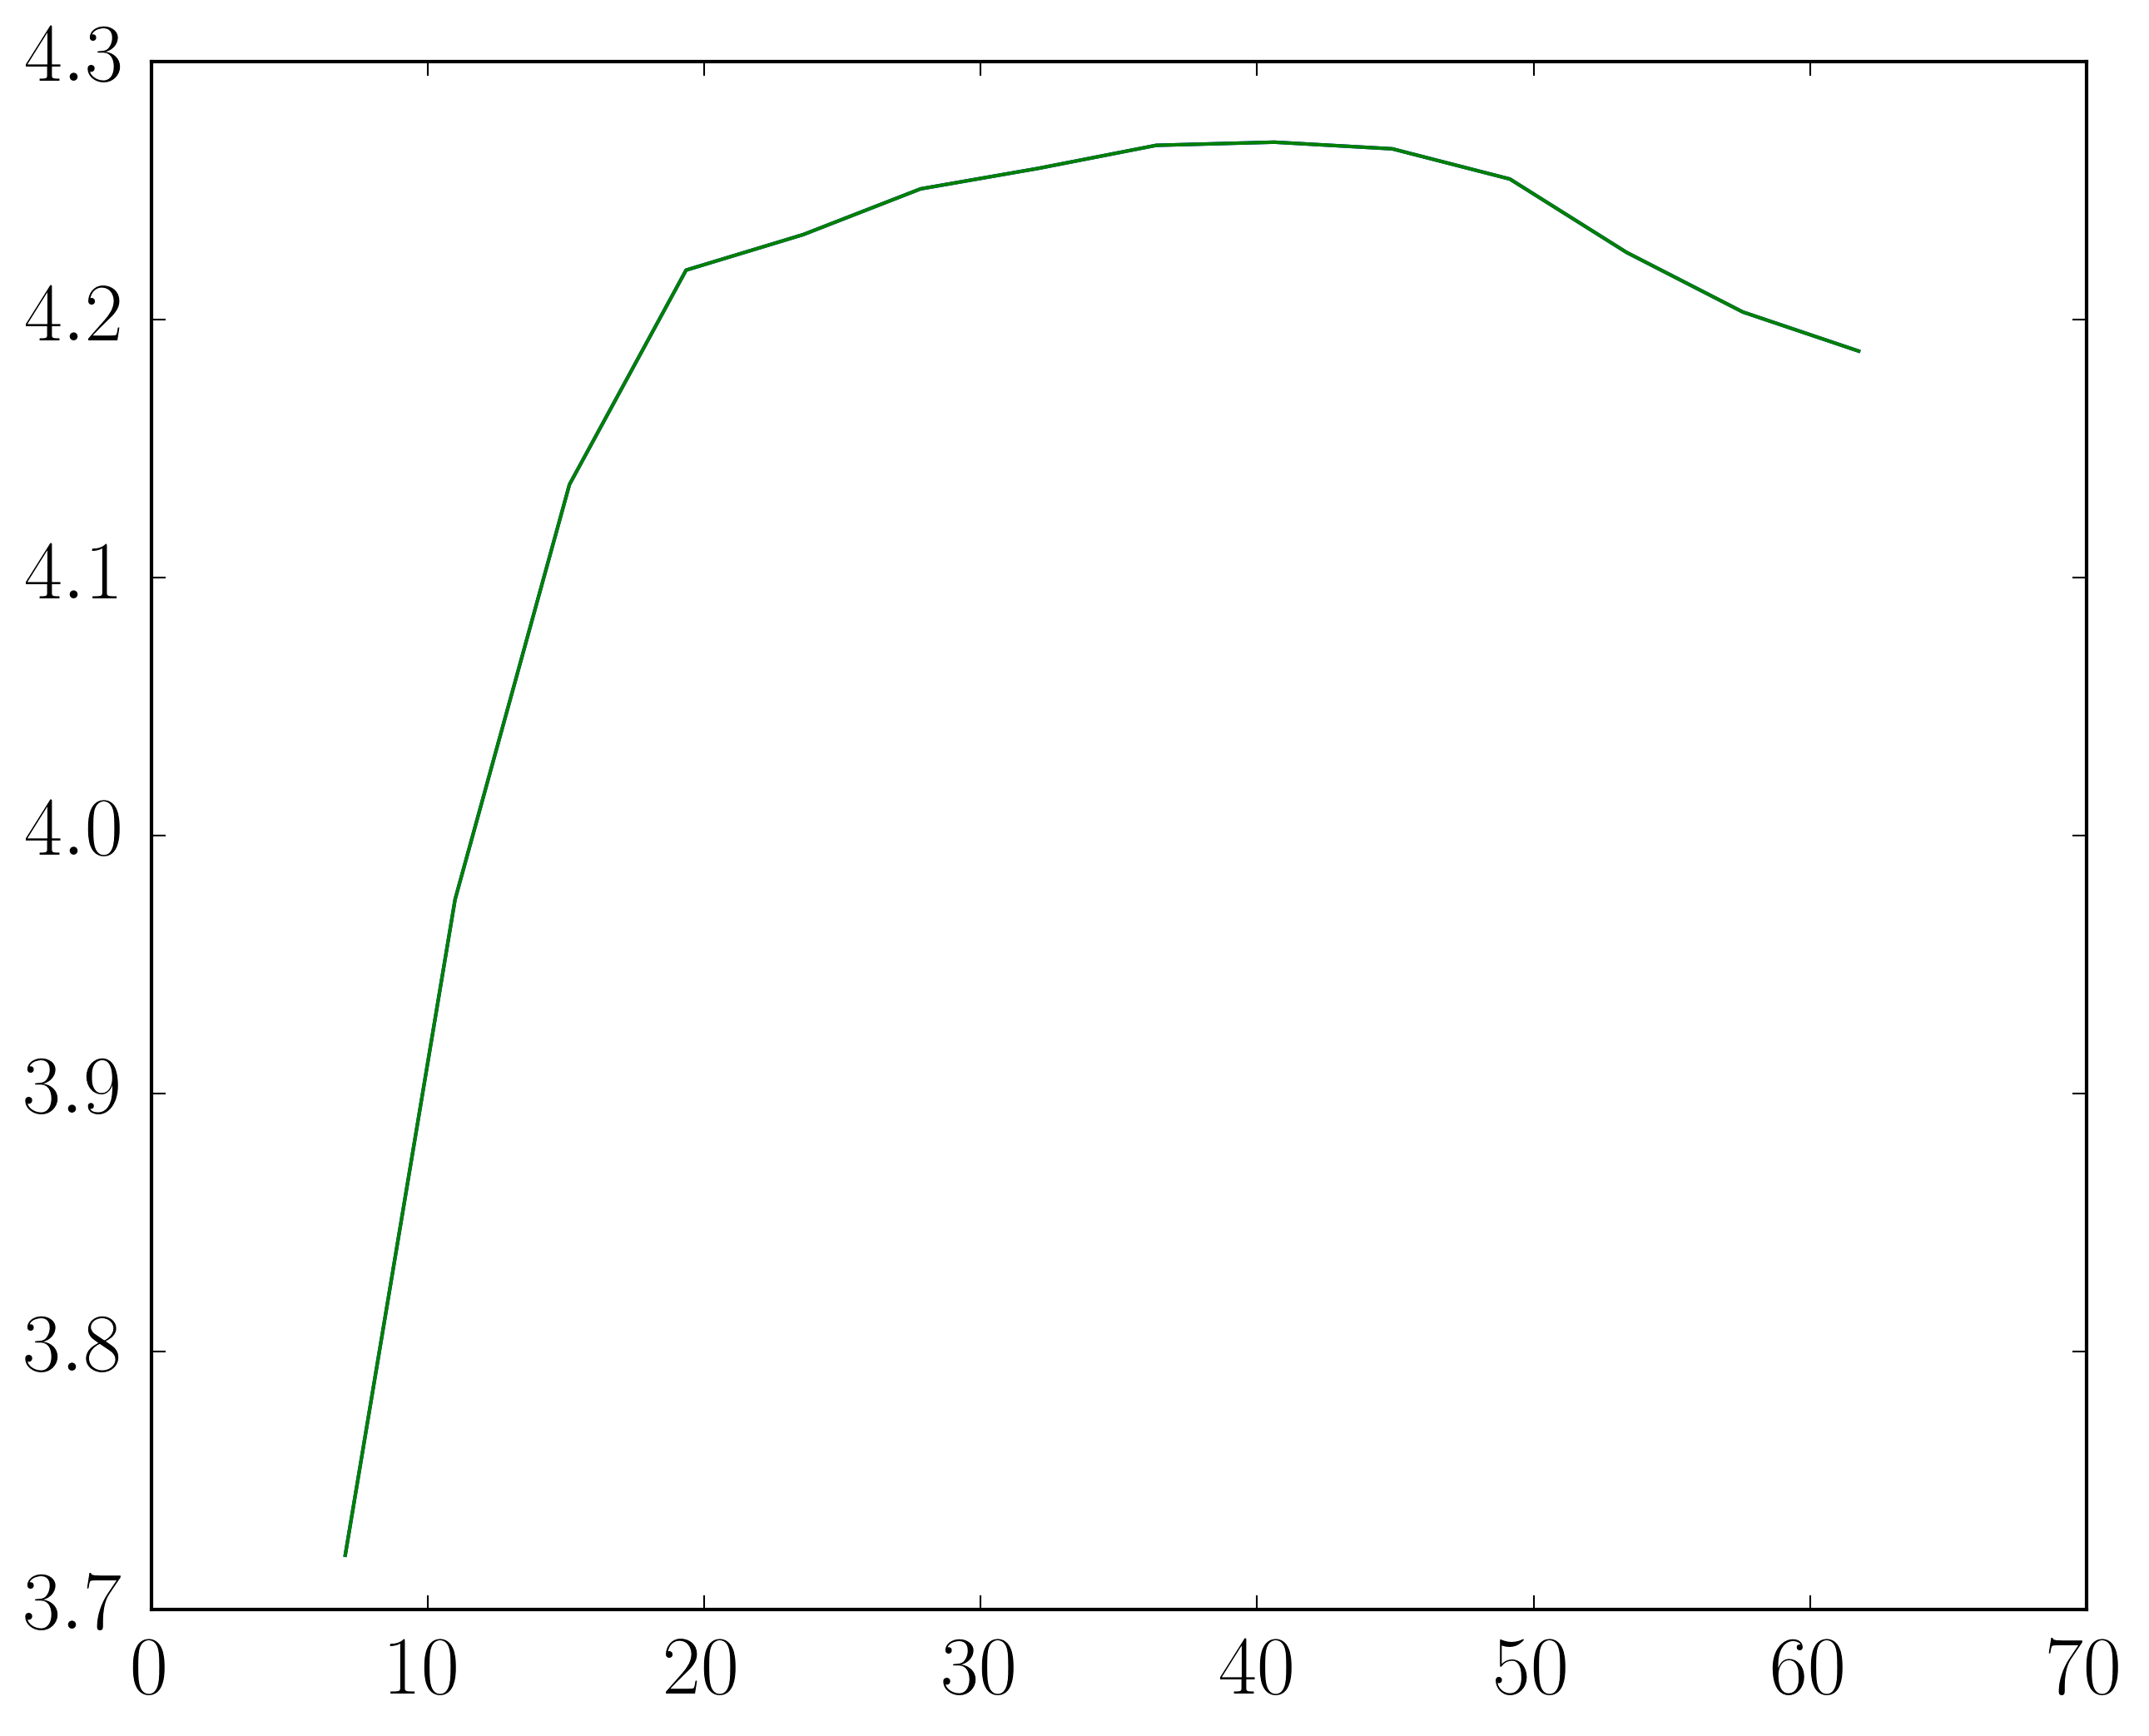

In [114]:
plt.plot(timeold[1:],np.diff(timeold))
plt.plot(time[1:],np.diff(time))


(0, 0.0050000000000000001)

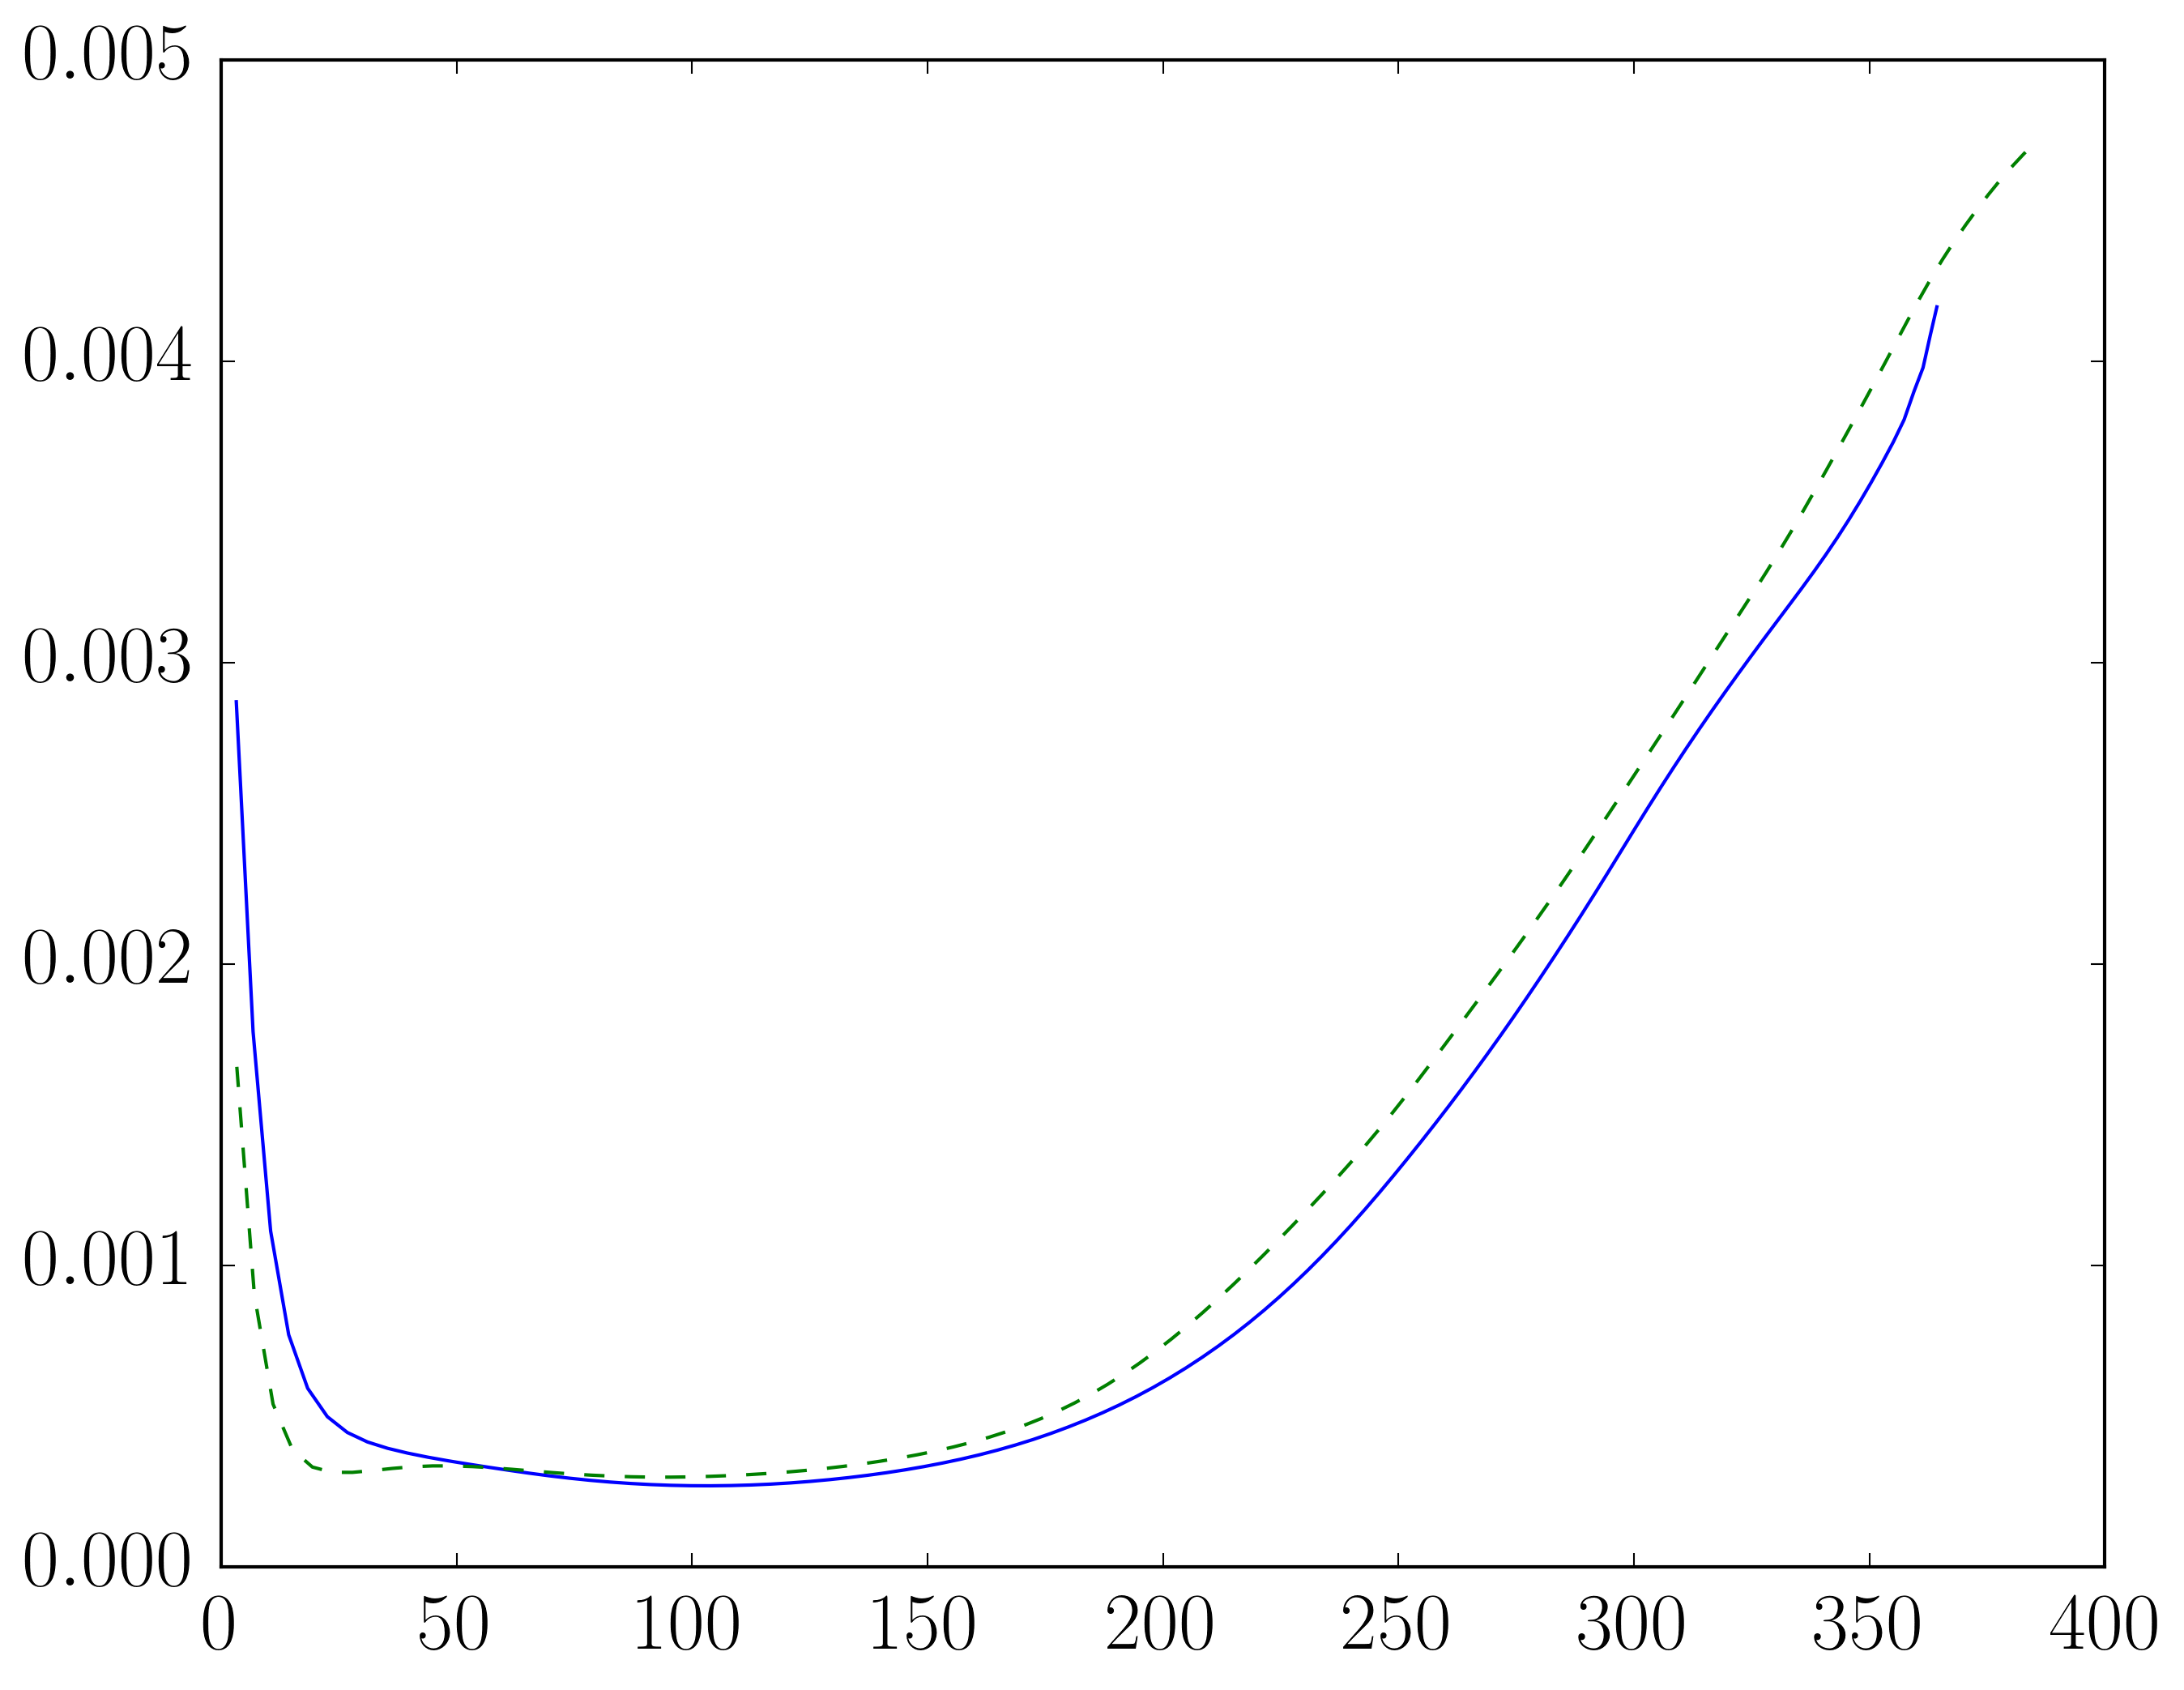

In [158]:
plt.plot(timeold,EPSold)
plt.plot(time,EPS,'--')
plt.ylim(bottom=0)

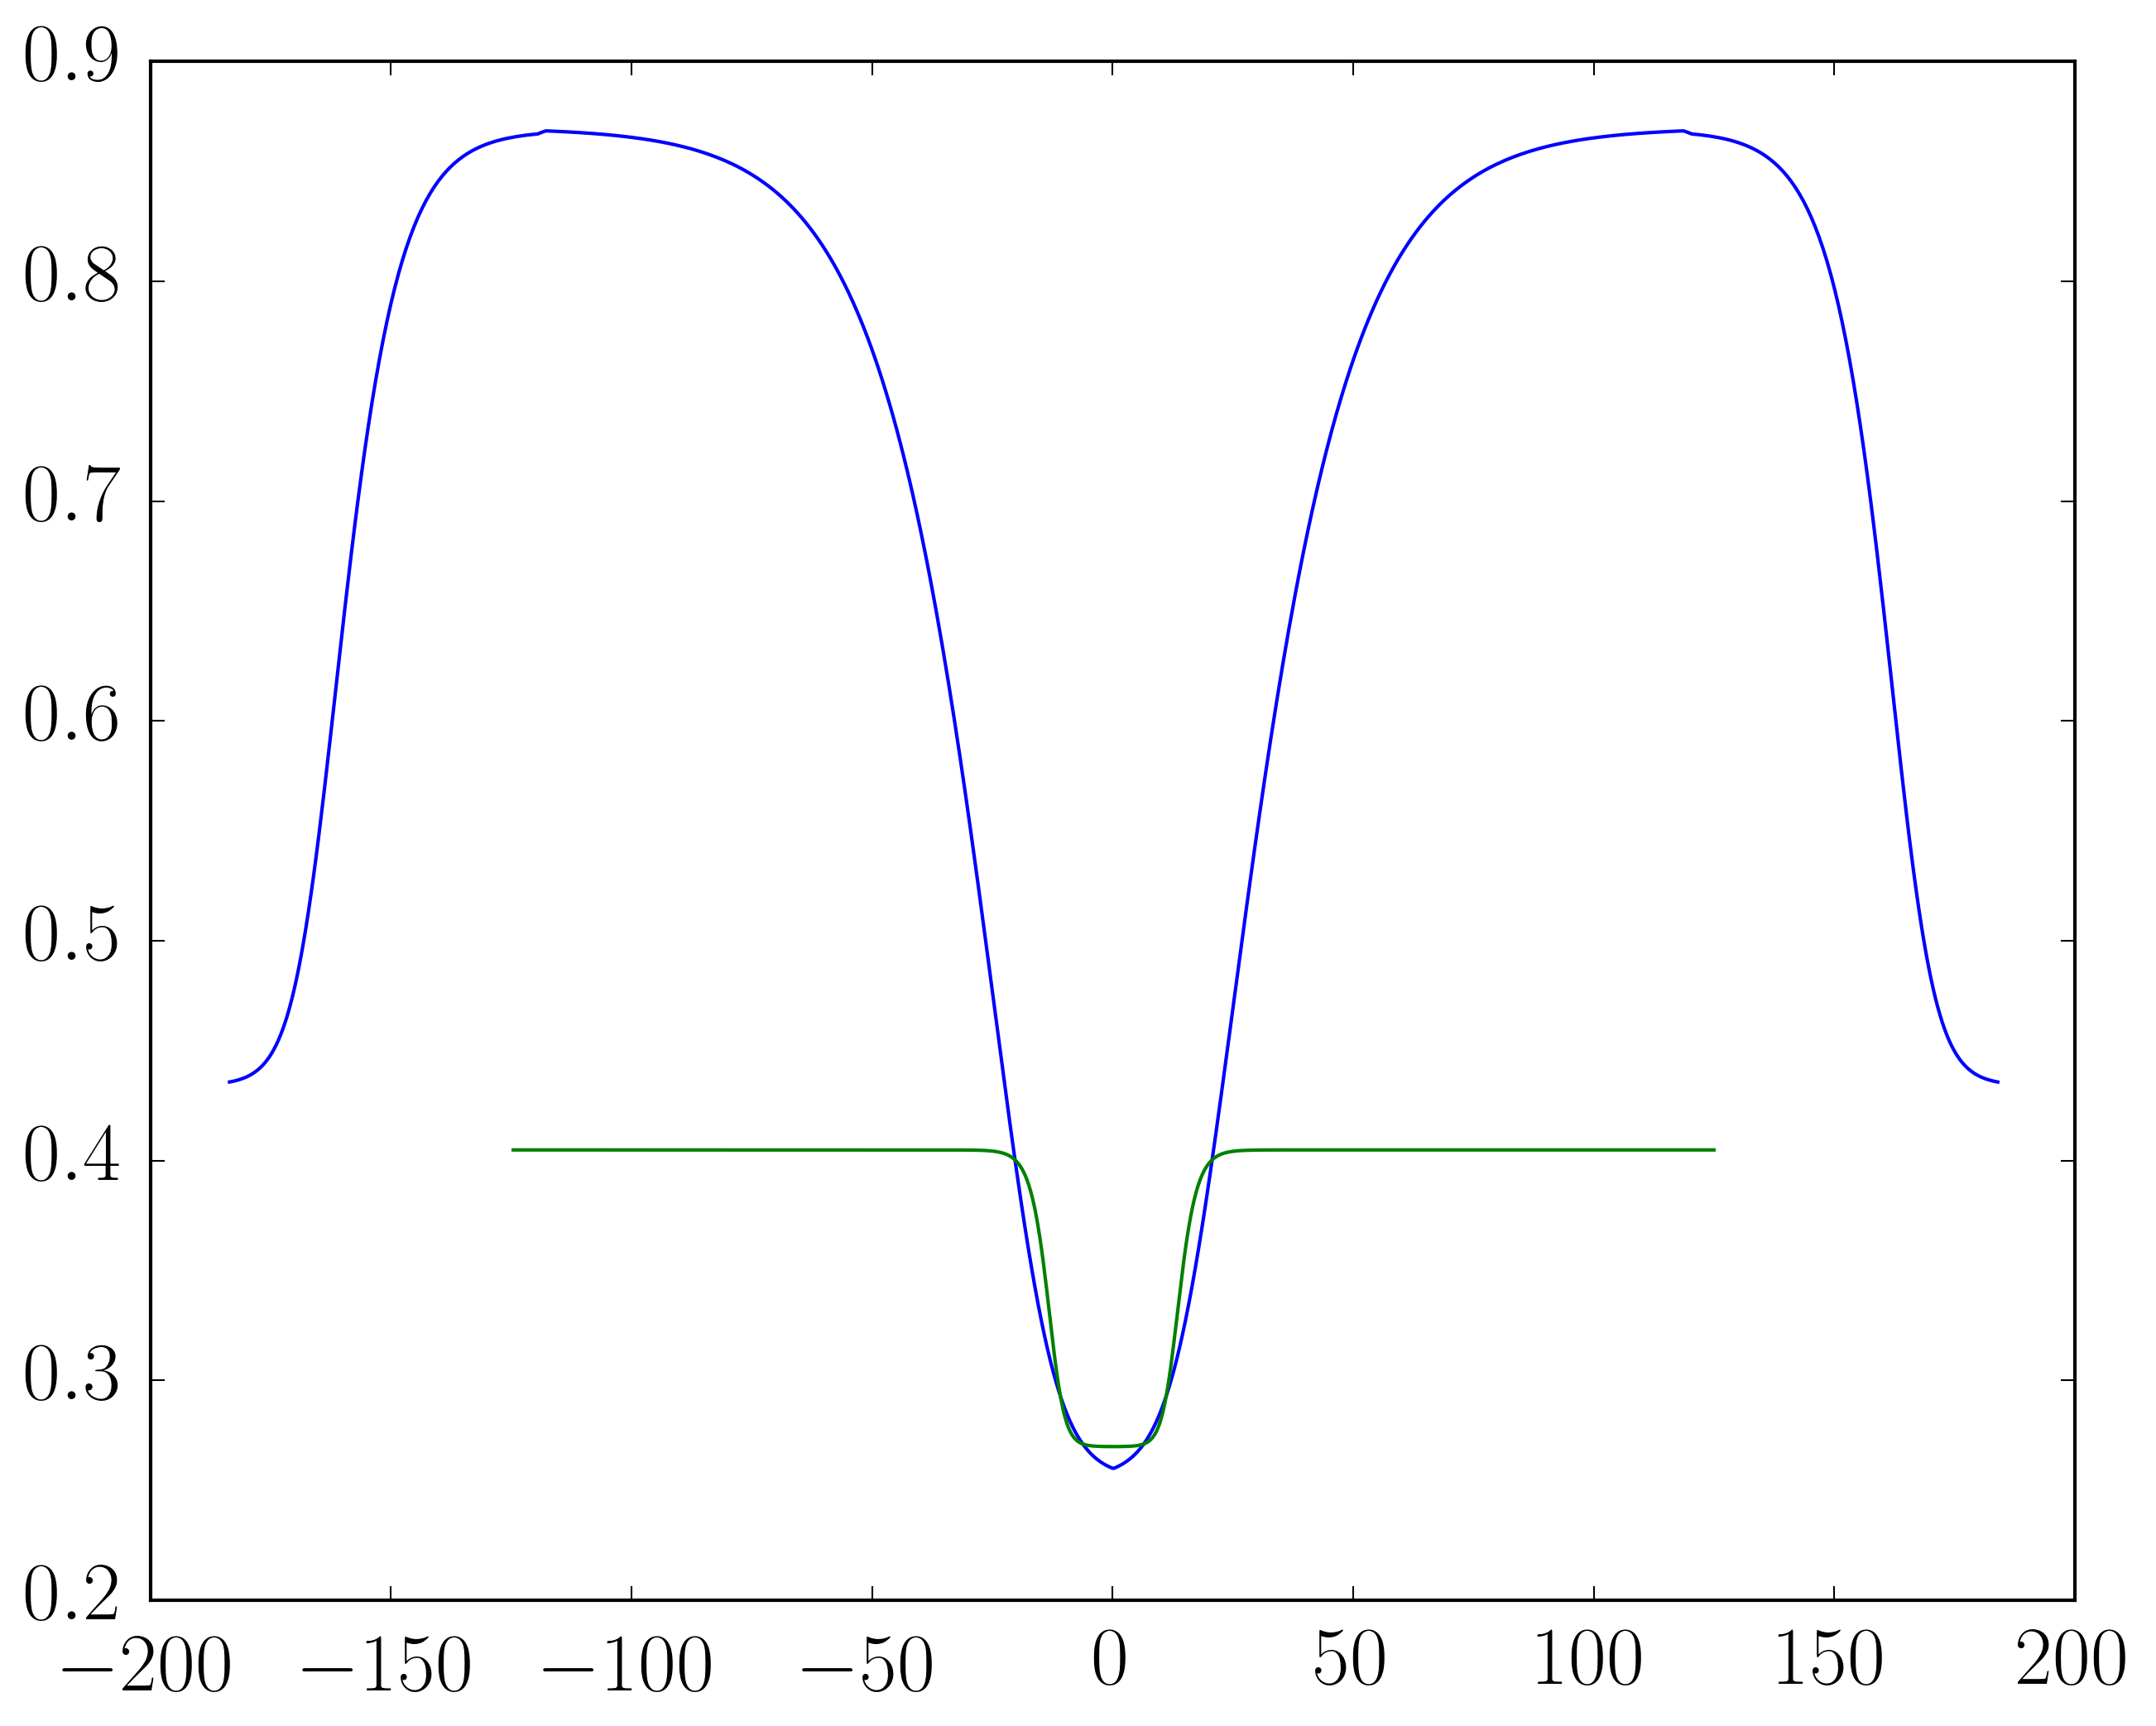

In [221]:
plt.plot(yfold[1:],np.diff(yfold))
plt.plot(yf[1:],np.diff(yf))

19.3490332336
[ 3.72107244  3.97530937  4.13608742  4.21920395  4.23295593  4.25069809
  4.25864983  4.26757812  4.26879883  4.26622009  4.25450897  4.2260437
  4.20295715  4.18782043  4.18386078  4.19020081  4.20217896  4.21968079
  4.23303223  4.22506714  4.21217346  4.18675232  4.18121338  4.15319824
  4.12171936  4.09397888  4.06948853  4.04574585  4.02261353  4.00587463
  3.98822021  3.96780396  3.94125366  3.91073608  3.88278198  3.85629272
  3.82830811  3.79431152  3.76177979  3.72921753  3.6842041   3.6477356
  3.60162354  3.55419922  3.51348877  3.47784424  3.44525146  3.40249634
  3.36743164  3.34237671  3.32818604  3.31756592  3.30892944  3.27270508
  3.22418213  3.16223145  3.11340332  3.08465576  3.07009888  3.05218506
  3.0447998   3.03482056  2.9914856   2.95785522  2.90823364  2.8598938
  2.82659912  2.81352234  2.80706787  2.81152344  2.80657959  2.79614258
  2.79168701  2.76702881  2.72869873  2.67840576  2.64526367  2.62408447
  2.62701416  2.62219238  2.60644531  2.

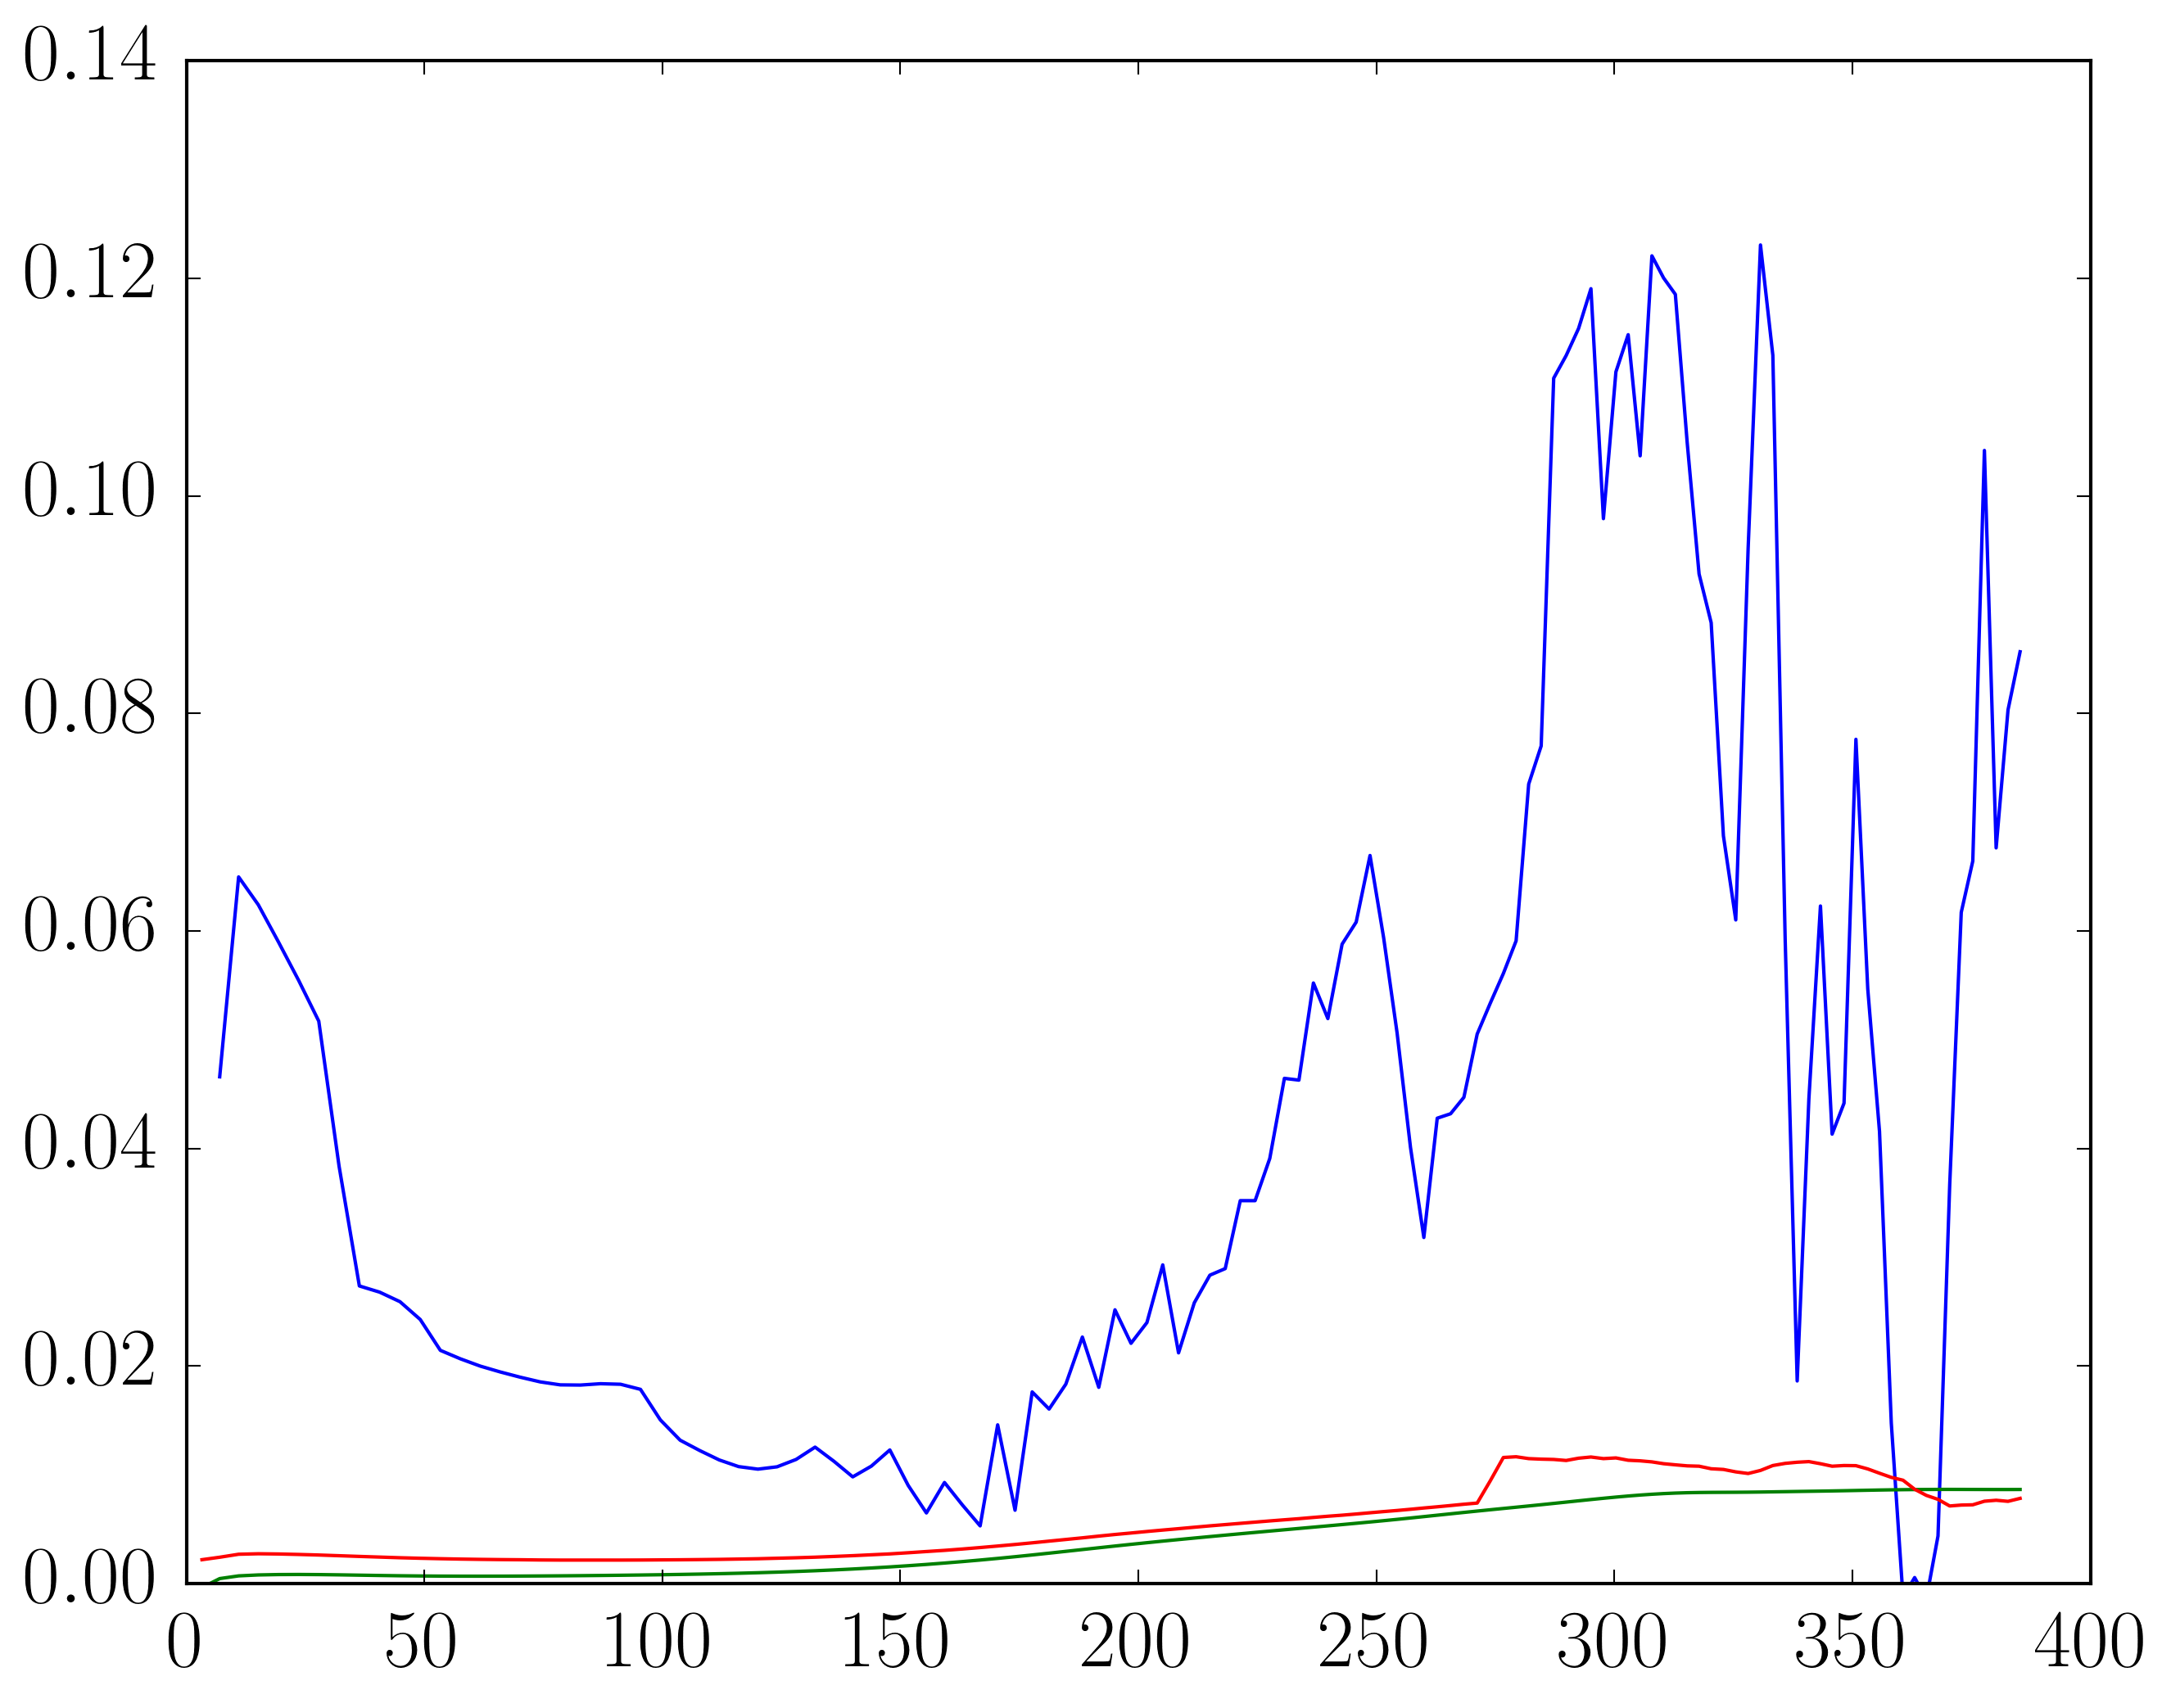

In [161]:
#plt.plot(time[1:],np.diff(dm)/np.diff(time));
#for ii in range(-3,0):
#    dmint=rhom[:,ii]*(0.5-rum[:,ii]/rhom[:,ii])*(0.5+rum[:,ii]/rhom[:,ii])
#    plt.plot(yf,dmint)
#    print np.trapz(dmint,yf)
#    print time[ii]-time[ii-1]
#plt.plot(time,dw/dm)
plt.plot(time[1:],np.diff(dw)/np.diff(time))
plt.plot(time,dmpoint)
print dw[-1]
plt.plot(time,der1(time,dm))
plt.ylim(bottom=0)
print np.diff(time)

(0.0, 6.5)

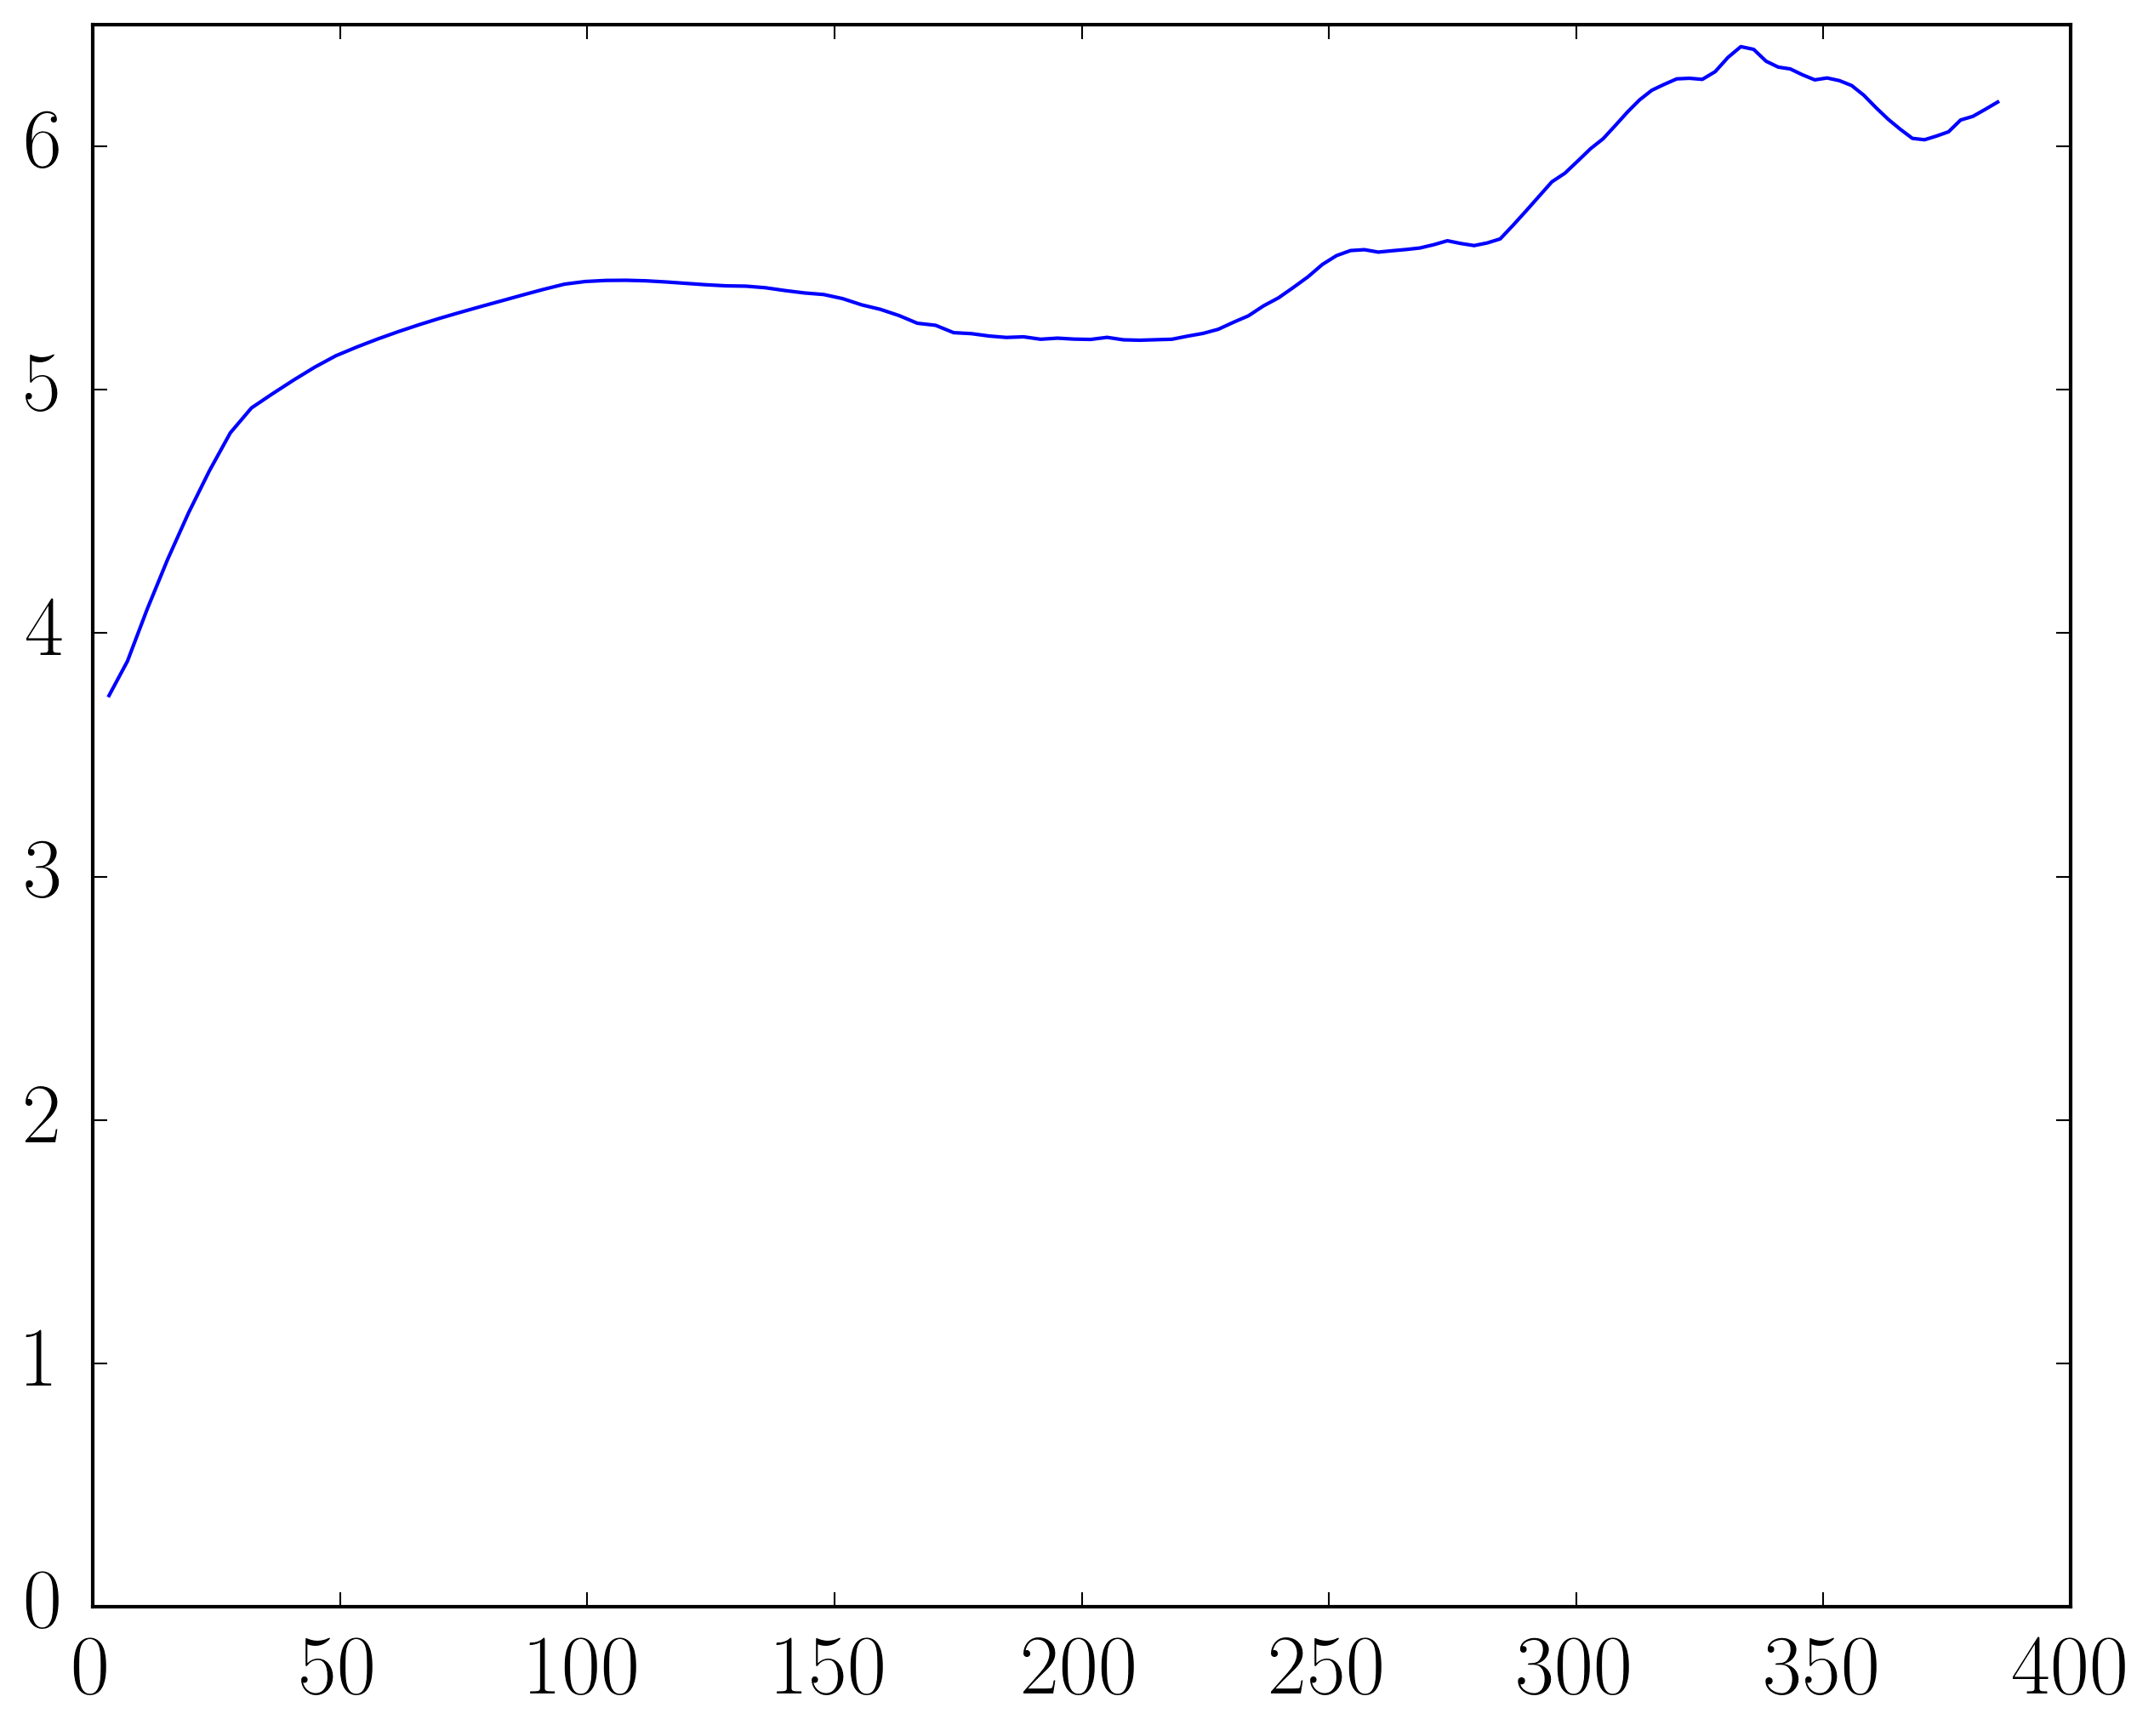

In [162]:
plt.plot(time,dw/dm)
plt.ylim(bottom=0.0)